Arieldhipta Tarliman - 2702234636

Sebagai seorang data scientist, pada kuartal ini Anda ditugaskan untuk menyelesaikan sebuah proyek terkait permasalahan multivariable time series. Fokus utama dari proyek ini adalah memprediksi kondisi kualitas udara (Air Quality atau disingkat AT) di suatu wilayah. Untuk keperluan ini, Anda akan menggunakan data yang tersedia pada tautan berikut: Google Drive Dataset.

Jenis data yang akan Anda gunakan bergantung pada NIM Anda. Apabila NIM Anda berakhiran angka genap, gunakan dataset A_1. Sebaliknya, jika NIM Anda berakhiran angka ganjil, gunakan dataset B_1. Dataset ini berisi sejumlah variabel yang mewakili berbagai faktor lingkungan dan parameter yang mempengaruhi kualitas udara suatu wilayah secara periodik. Tugas Anda adalah memanfaatkan data ini untuk membangun model prediksi yang mampu mengestimasi nilai kualitas udara (AT) berdasarkan dinamika variabel-variabel tersebut dalam dimensi waktu.

File & Video: https://binusianorg-my.sharepoint.com/personal/arieldhipta_tarliman_binus_ac_id/_layouts/15/guestaccess.aspx?share=EgaLHPkcpI5KhStNqZp5BMEBaqvdVDNIPlfhgKYTbVOmMg&e=fyqc2c

- From Date : Starting date of data collection (-)
- To Date : Ending date of data collection (-)
- PM10 : Particulate Matter 10 (ug/m3)
- PM2.5 : Particulate Matter 2.5 (ug/m3)
- CO : Carbon Monoxide (mg/Nm3, mg/m3, ng/m3, ug/m3)
- CO2 : Carbon Dioxide (mg/m3)
- NO : Nitric Oxide (mg/m3, ppb, ppm, ug/m3)
- NO2 : Nitrogen Dioxide (ug/m3)
- NOx : Nitrogen Oxides (ppb, ppm, ug/m3)
- NH3 : Ammonia (ppb, ug/m3)
- SO2 : Sulfur Dioxide (ug/m3)
- Temp : Temperature (degrees Celsius or ug/m3)
- AT : Air Temperature (degrees Celsius or ug/m3)
- BP : Barometric Pressure (W/mt2, mg/m3, mmHg)
- Benzene : Concentration of Benzene in the air (mg/m3 or ug/m3)
- Toluene : Concentration of Toluene in the air (ug/m3)
- VWS : Wind Speed (degree, m/s)
- Variance : Variance (n)
- WD : Wind Direction (deg, degree C, degree)
- WS : Wind Speed (m/s, ug/m3)
- Xylene : Concentration of Xylene in the air (ug/m3)
- CH4 : Methane (ug/m3)
- Eth-Benzene : Concentration of Ethylbenzene in the air (ug/m3)
- Gust : Wind Gust (kl/h, km/hr, m/s)
- HCHO : Formaldehyde (ug/m3)
- Hg : Mercury (ug/m3)
- MH : Mixing Height (meters (m))
- MP-Xylene : Concentration of Meta-Para Xylene in the air (ug/m3)
- NMHC : Non-Methane Hydrocarbons (ug/m3)
- O Xylene : Concentration of Ortho-Xylene in the air (ug/m3)
- Ozone : Ozone Concentration (ppb, ug/m3)
- Power : Power Consumption (Watts (W))
- RF : Rainfall (m/s, mm)
- RH : Relative Humidity (%, W/mt2, degree)
- SPM : Suspended Particulate Matter (ug/m3)
- SR : Solar Radiation (W/mt2, ug/m3)
- THC : Total Hydrocarbons (ug/m3)

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests

from keras.models import Sequential
from keras import backend as K
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
df = pd.read_csv('AP003.csv')

# Basic EDA

In [3]:
df.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2017-07-01 00:00:00  2017-07-01 01:00:00          50.00         91.75   
1  2017-07-01 01:00:00  2017-07-01 02:00:00          30.75         59.25   
2  2017-07-01 02:00:00  2017-07-01 03:00:00            NaN           NaN   
3  2017-07-01 03:00:00  2017-07-01 04:00:00           8.00           NaN   
4  2017-07-01 04:00:00  2017-07-01 05:00:00          33.25           NaN   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0        3.33        27.70      17.48          NaN        24.35        1.33   
1        1.20        20.78      11.40         0.03         8.23        1.77   
2        1.17         4.07       2.73         0.10        10.77        1.20   
3        2.58         6.38       5.30          NaN        19.78        1.58   
4        5.30        21.03      15.47         0.15        22.40        2.25   

   ...  Temp (degree C)  RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
0  ...            55.22   83.25      1.67       285.50        6.75      737.0   
1  ...            57.48   84.50      2.50       299.50        6.75      736.0   
2  ...            58.67   86.00      0.77       285.67        6.67      736.0   
3  ...            58.93   86.00      1.55       302.50        6.00      735.0   
4  ...            59.88   86.00      2.30       297.25        6.00      735.0   

   VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
0       0.03          26.30     0.00            0.65  
1       0.05          25.00     1.50            0.50  
2       0.03          24.17     0.33            0.43  
3       0.08          24.10     0.00            0.63  
4       0.08          24.90     0.00            0.67  

[5 rows x 23 columns]

We can se that our time interval is by hourly

In [4]:
df.describe()

PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   44691.000000  45018.000000  46252.000000  45705.000000  47040.000000   
mean       46.869591    111.938589     14.817678     34.921808     29.857413   
std        35.201161     74.285923     22.372042     23.912796     27.042412   
min         0.250000      1.000000      0.030000      0.030000      0.000000   
25%        23.415000     63.330000      2.915000     18.400000     12.670000   
50%        38.750000     97.750000      6.600000     30.300000     22.910000   
75%        62.330000    137.500000     17.300000     43.900000     36.930000   
max       840.000000    904.000000    419.780000    420.200000    408.250000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Ozone (ug/m3)  \
count  45756.000000  43604.000000  46993.000000   45309.000000   
mean      13.813287     12.323789      0.666865      29.118732   
std       14.685377     10.266289      0.550187      29.388645   
min        0.020000      0.030000      0.000000       0.100000   
25%        7.050000      6.350000      0.330000       9.930000   
50%       11.600000     10.680000      0.590000      17.570000   
75%       16.770000     15.520000      0.890000      37.680000   
max      454.900000    194.250000     11.280000     199.300000   

       Benzene (ug/m3)  ...  Temp (degree C)        RH (%)      WS (m/s)  \
count     46678.000000  ...     46335.000000  46520.000000  46522.000000   
mean          3.309707  ...        29.408316     73.166650      1.895205   
std           2.926522  ...         3.228845      8.592562      1.199727   
min           0.000000  ...         6.700000     15.750000      0.100000   
25%           1.500000  ...        27.900000     68.000000      0.880000   
50%           2.700000  ...        28.850000     74.330000      1.800000   
75%           4.380000  ...        30.180000     79.670000      2.730000   
max          91.000000  ...        59.880000     92.000000      7.970000   

        WD (degree)    SR (W/mt2)     BP (mmHg)     VWS (m/s)  AT (degree C)  \
count  44710.000000  47045.000000  43680.000000  47043.000000   46370.000000   
mean     209.078558    127.619004    746.903387      0.017120      27.591552   
std       67.168061    175.790733      7.656193      0.071902       4.426638   
min        7.000000      0.000000    700.000000     -0.550000       5.180000   
25%      157.250000      6.250000    743.000000      0.000000      24.830000   
50%      220.000000      8.250000    747.500000      0.000000      27.650000   
75%      262.670000    227.500000    751.000000      0.050000      30.400000   
max      360.000000    730.000000    770.000000      1.680000      48.500000   

            RF (mm)  Xylene (ug/m3)  
count  47148.000000    46658.000000  
mean       0.022934        2.649006  
std        0.282441        8.785483  
min        0.000000        0.000000  
25%        0.000000        0.570000  
50%        0.000000        1.300000  
75%        0.000000        2.770000  
max       12.500000      410.850000  

[8 rows x 21 columns]

The mean value of PM10 is around 111 and CO aroung 0.67 this a big diffrence scale, this means we need to do a normalization data.

Next, on the PM2.5 column, 75% of the data below the value of 62 but the maximum values untiull 840. This also occurs on Xylene that 75% of the data is below 2.77 but the maximum value is 410.85. This extreme outliers can affect the model performance

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

The total missing values are significant, the total fo the data is 50400 rows but none of the column besides that have the same rows as the date range, everything has a non-null that is lower than the date column. For example column SO2 & BP has the most missing values.

# Check Duplicated Values

In [6]:
print(df.duplicated().sum())

0


# Change the Datatype

In [7]:
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])

df = df.sort_values(by='From Date', ascending=True)


# Check Unique Values

In [8]:
for i in df.columns:
    a = df[i].value_counts()
    print(f'{a}\n')

From Date
2017-07-01 00:00:00    1
2021-04-30 16:00:00    1
2021-04-30 18:00:00    1
2021-04-30 19:00:00    1
2021-04-30 20:00:00    1
                      ..
2019-06-01 02:00:00    1
2019-06-01 03:00:00    1
2019-06-01 04:00:00    1
2019-06-01 05:00:00    1
2023-03-31 23:00:00    1
Name: count, Length: 50400, dtype: int64

To Date
2017-07-01 01:00:00    1
2021-04-30 17:00:00    1
2021-04-30 19:00:00    1
2021-04-30 20:00:00    1
2021-04-30 21:00:00    1
                      ..
2019-06-01 03:00:00    1
2019-06-01 04:00:00    1
2019-06-01 05:00:00    1
2019-06-01 06:00:00    1
2023-04-01 00:00:00    1
Name: count, Length: 50400, dtype: int64

PM2.5 (ug/m3)
24.00     304
27.00     303
28.00     292
31.00     291
19.00     288
         ... 
127.67      1
622.50      1
173.33      1
225.50      1
152.25      1
Name: count, Length: 1182, dtype: int64

PM10 (ug/m3)
99.00     153
61.00     143
69.00     143
94.00     140
68.00     138
         ... 
362.33      1
375.33      1
415.00      1


It seems that we have data from 2017 March untill 2025 July. The interval is 1 and every date has a unique values of 1. 

On the other hand the column RF has 46000 times zero values.
- VWS has 23.599 zero values.
- C0 has 3601 zero values
- BEnzene, Tolune, XYlne, N0x

This conclude that most of the time the condition non active occure. Like its nopt raining, no wind vertical, or teh level pollutan that are to low to detect by the sensor.

The vws column most of the data as negative values this mean not an invalid data but it is a measurement context, this data is most likely from surface weather stations. On the surface, the average vertical wind movement per hour is usually very small, close to zero. Significant downtraft movements (large negative values) are usually associated with specific weather phenomena such as thunderstorm or microburst, which may not occur at any time.

On the SR(W/mt) (Sun radiation) have the low value like 6,7,8 that are very dominant adn the high value are very rare. this means it shwos a afternoon-night cycle. 

For all measurement columns, the amount of unique value (length) is much smaller than the total number of rows. This shows that the reading of the sensor has a certain precision or rounding. The sensor does not produce a unique value at any time, but the recurring discrete values. This is normal for sensor data.

# Plot

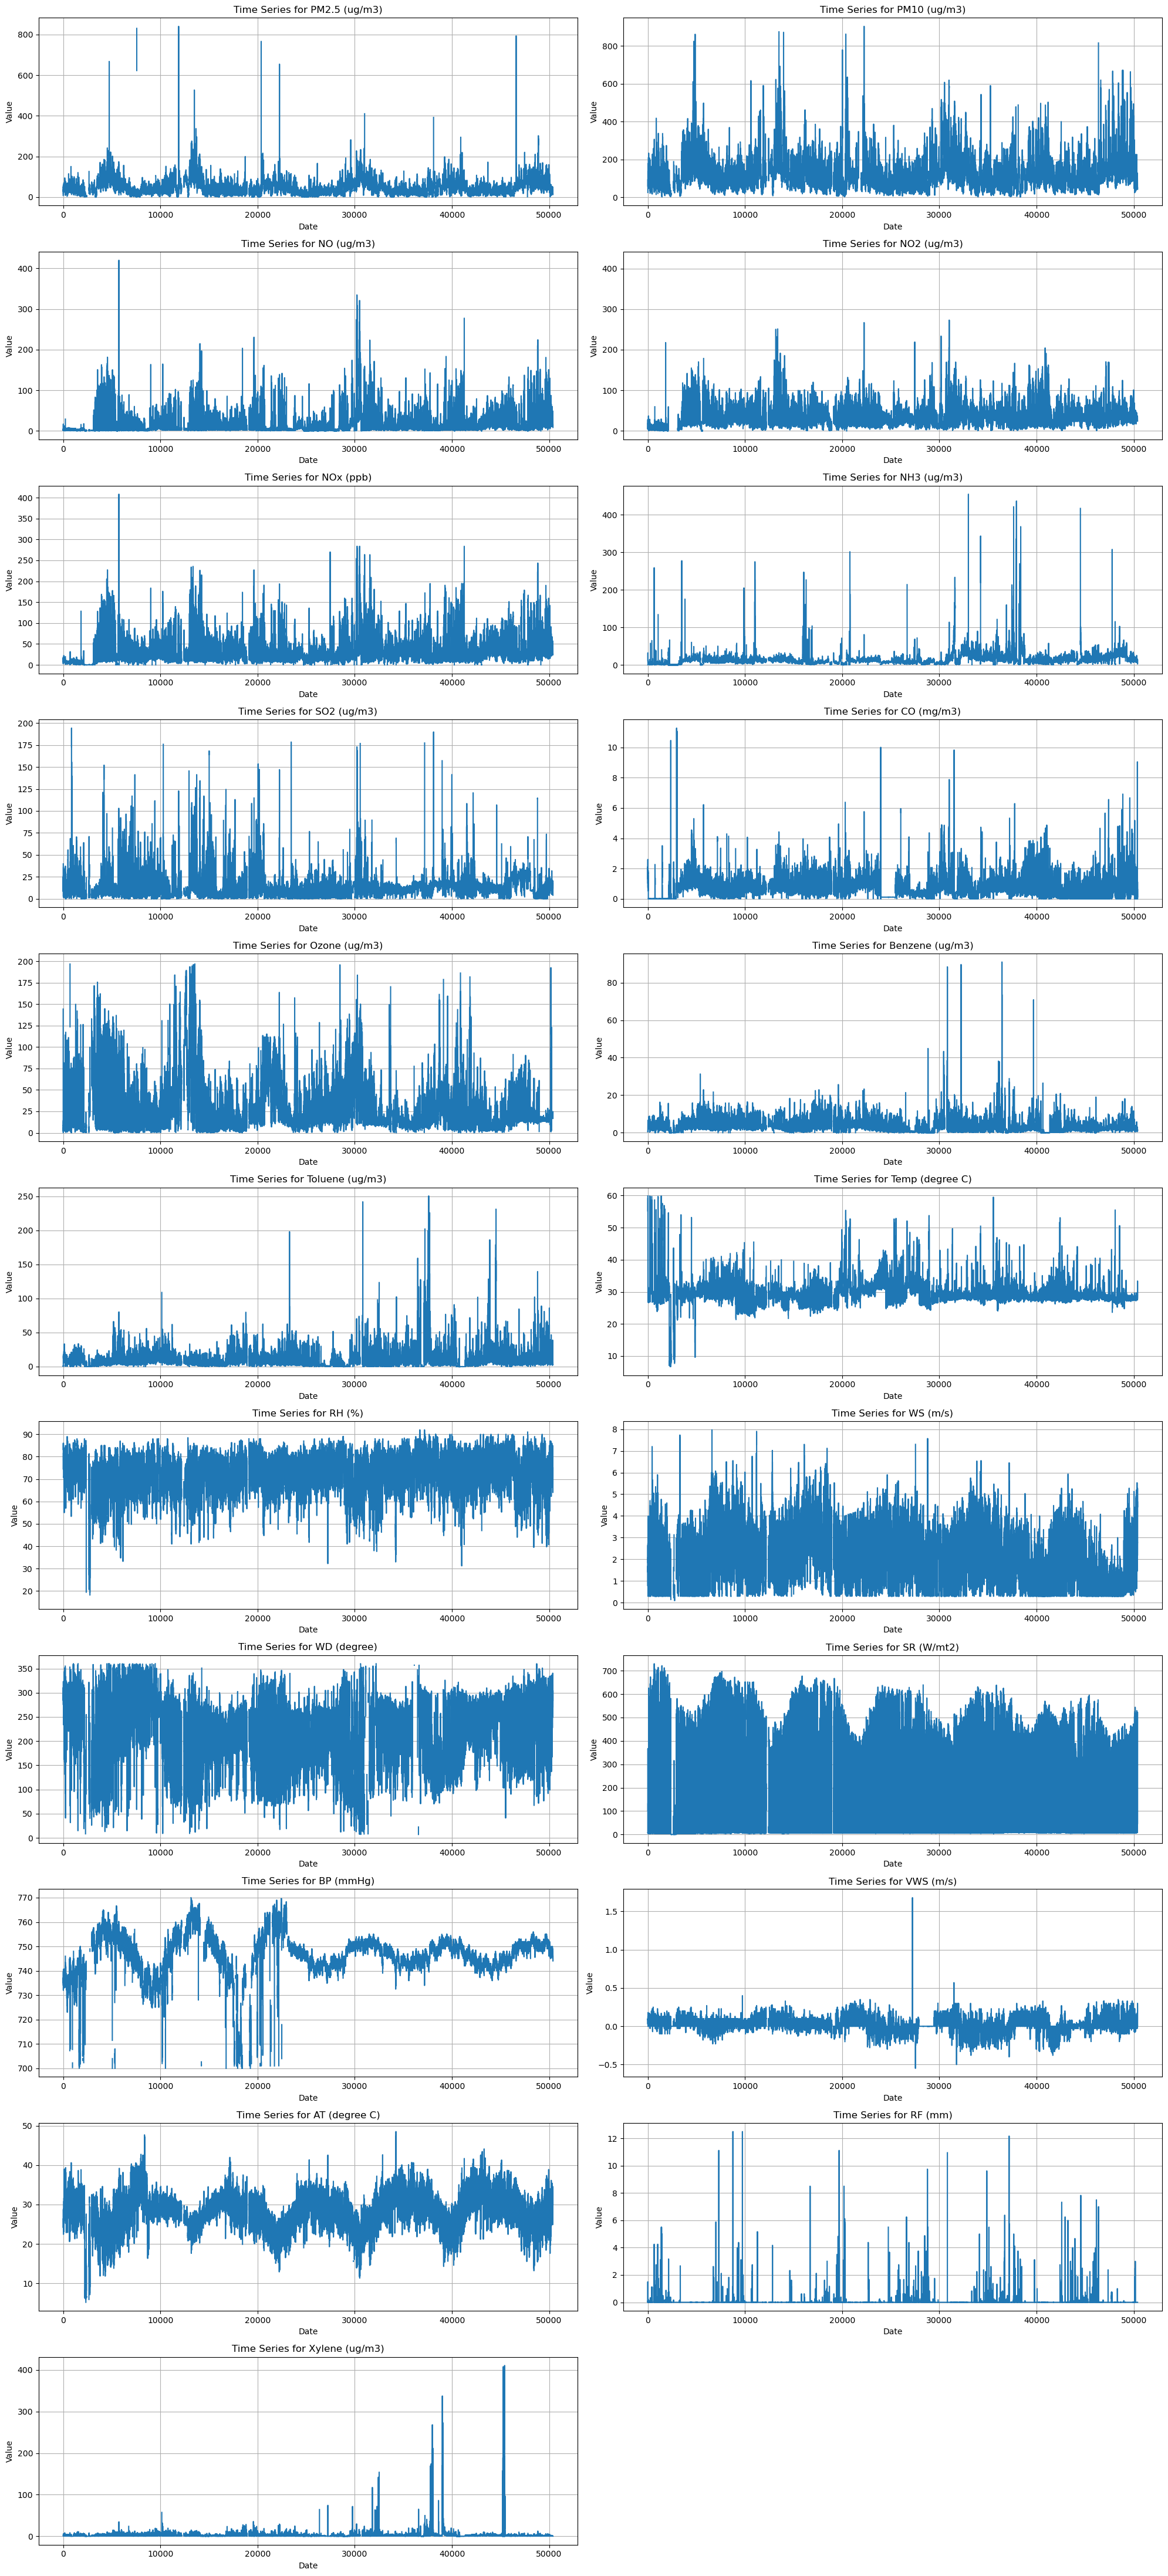

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
n_cols = 2
n_rows = (len(numerical_columns) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten() 
for i, col in enumerate(numerical_columns):
    df[col].plot(ax=axes[i], grid=True, title=f"Time Series for {col}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Value")
for i in range(len(numerical_columns), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.show()


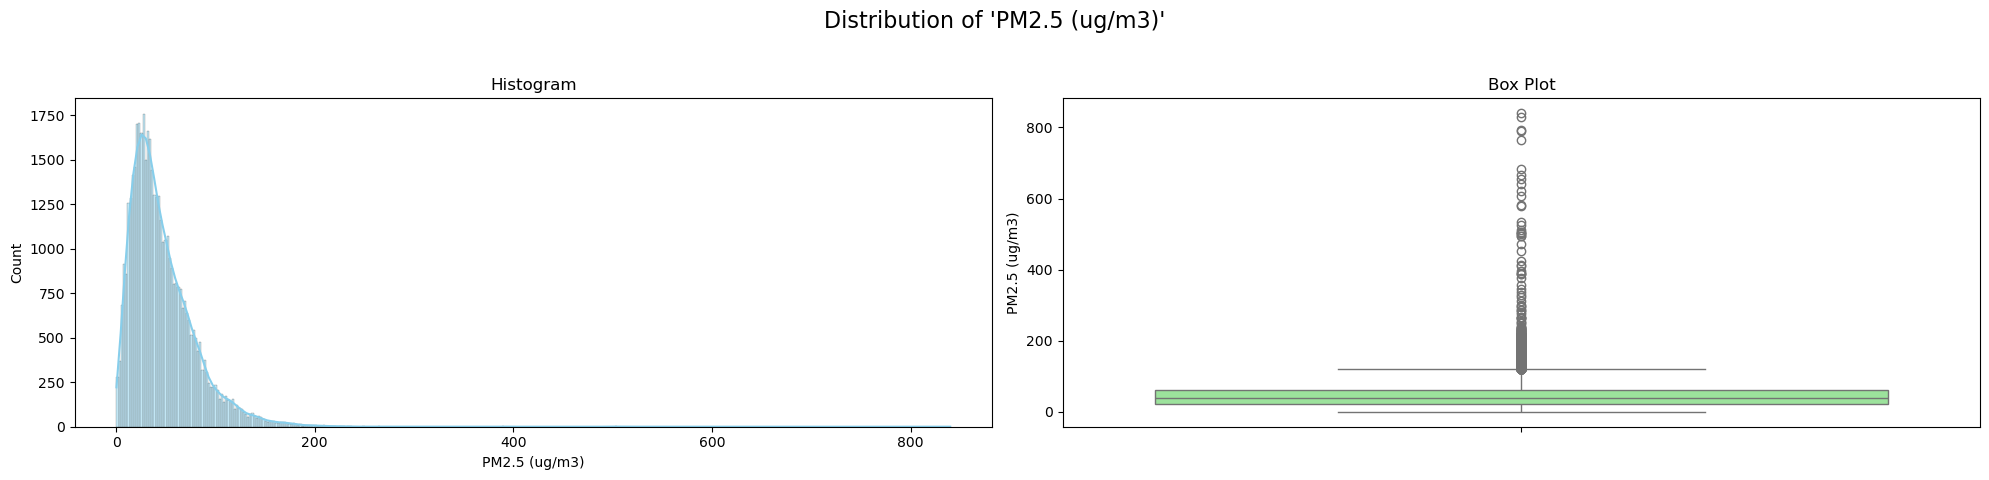

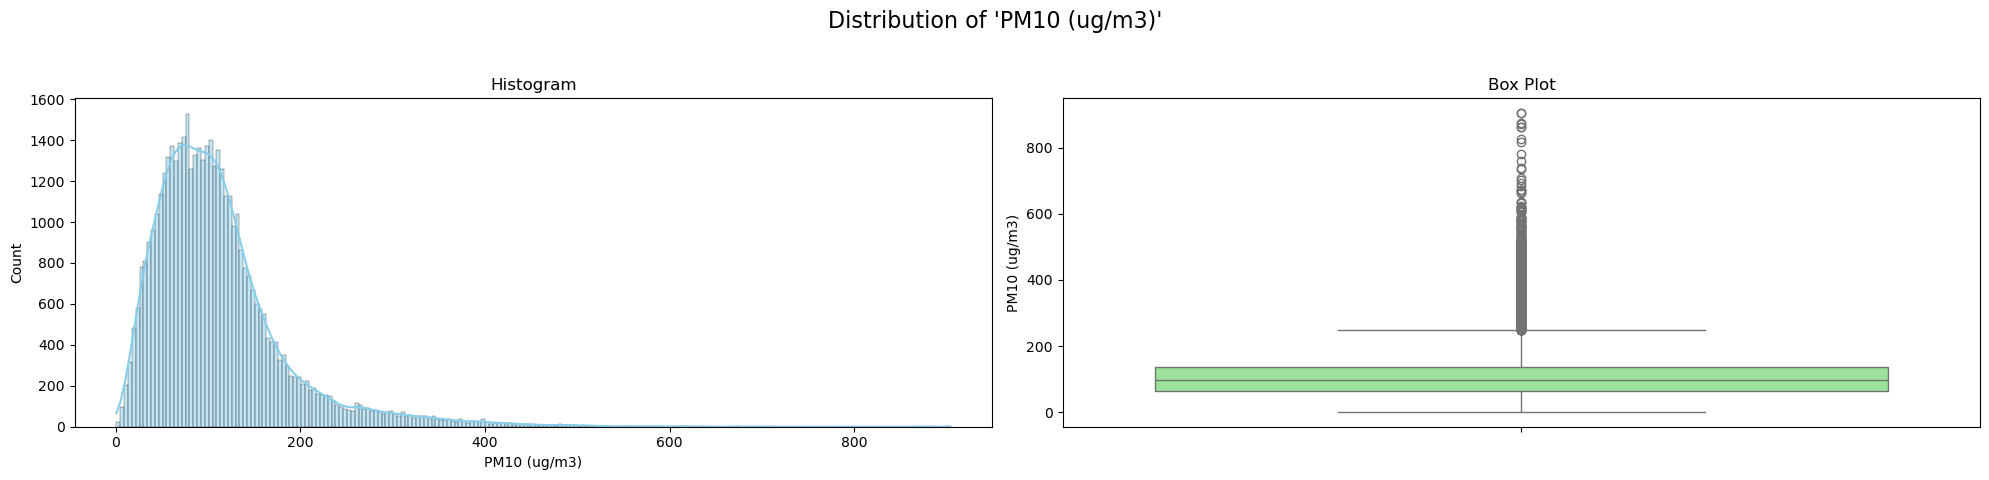

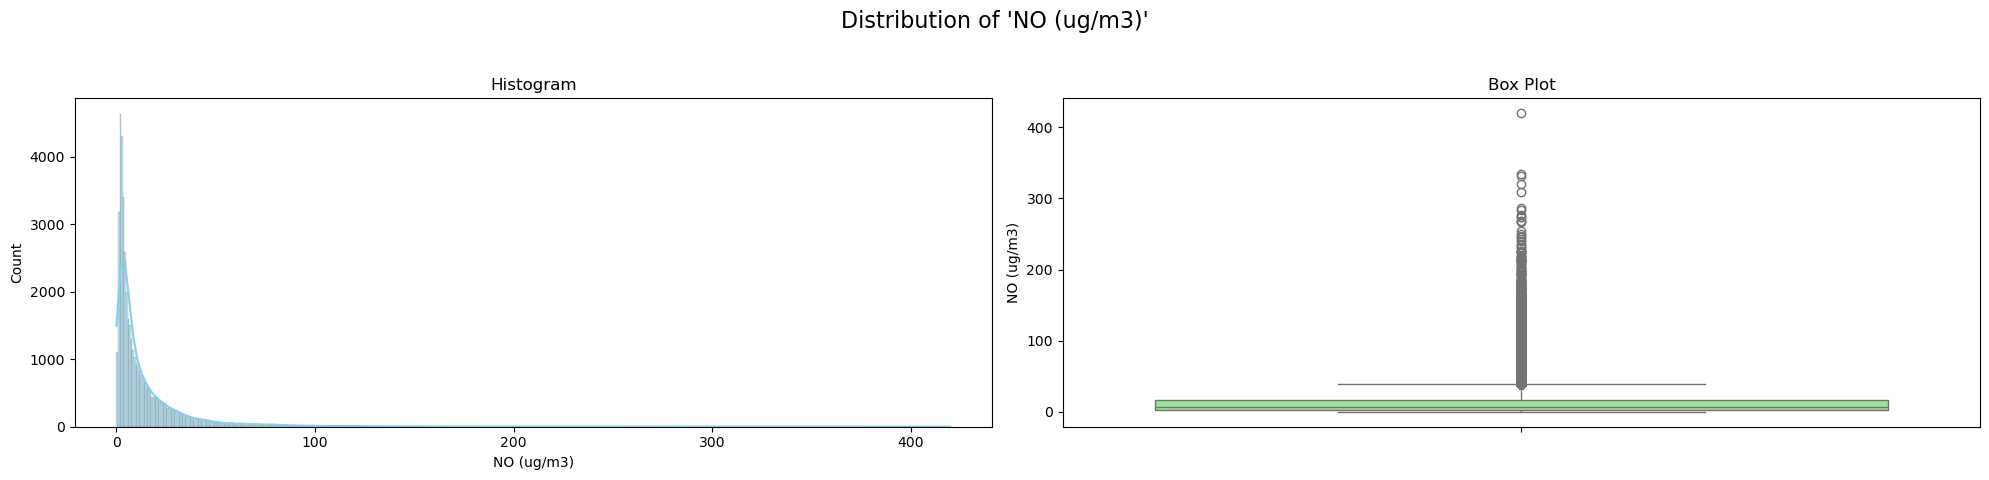

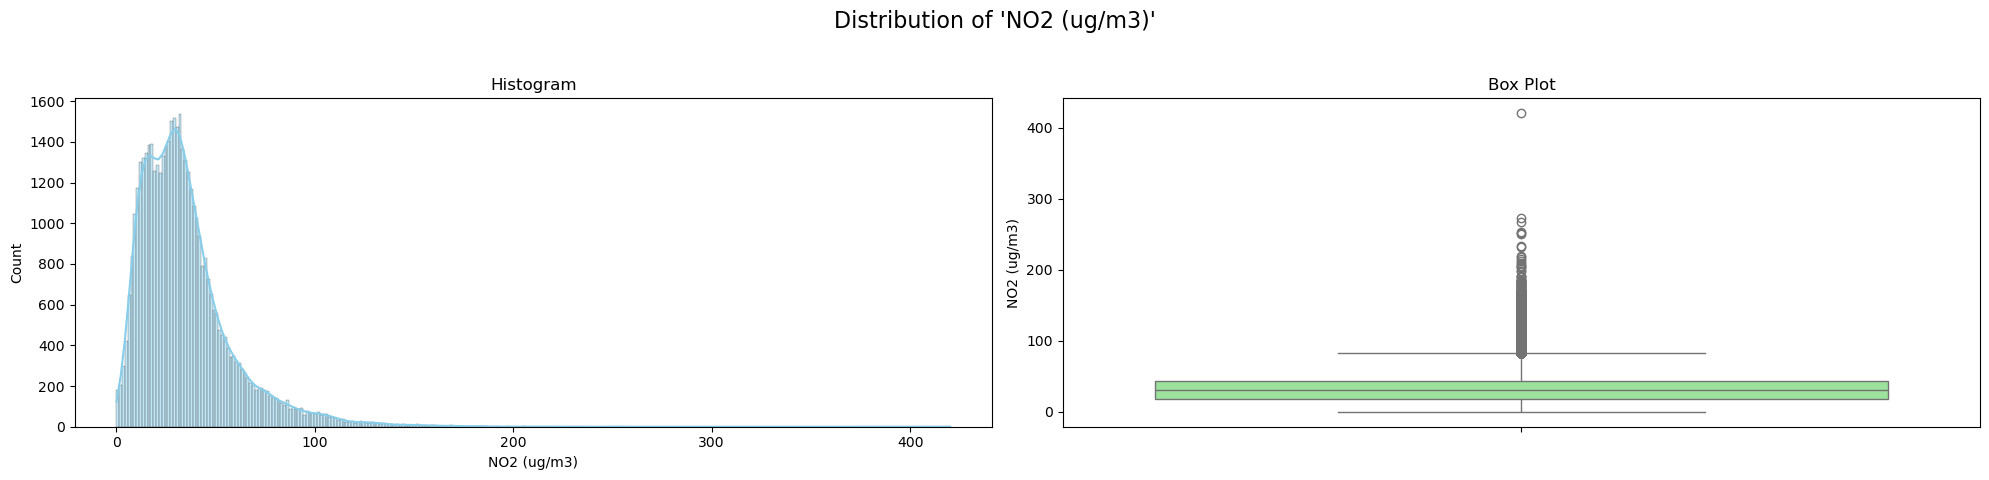

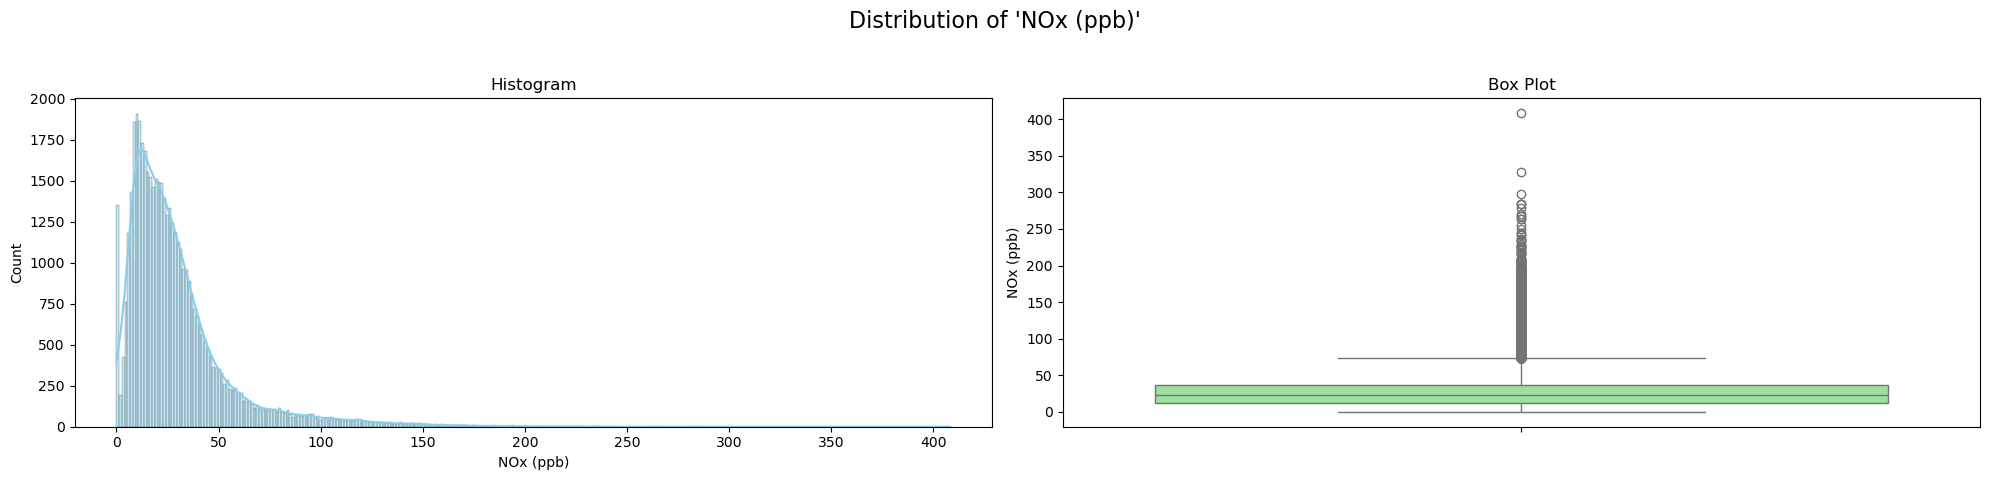

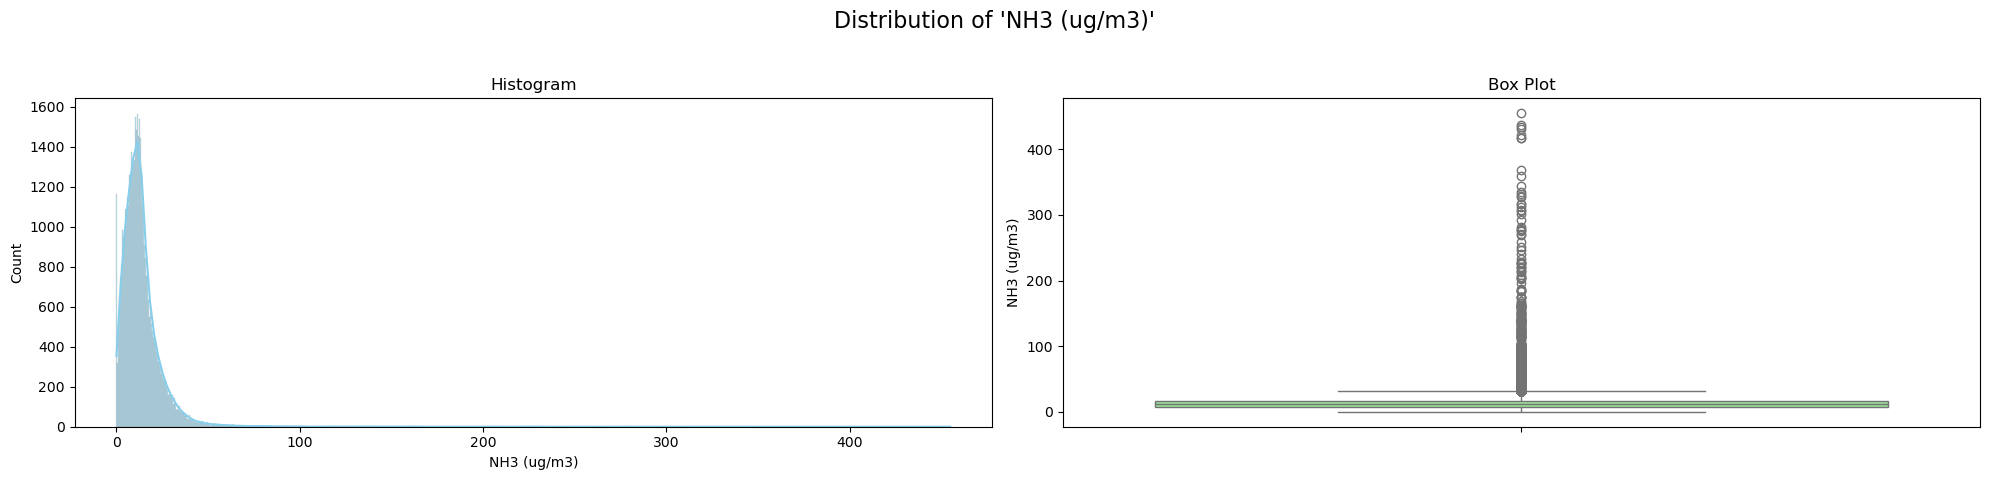

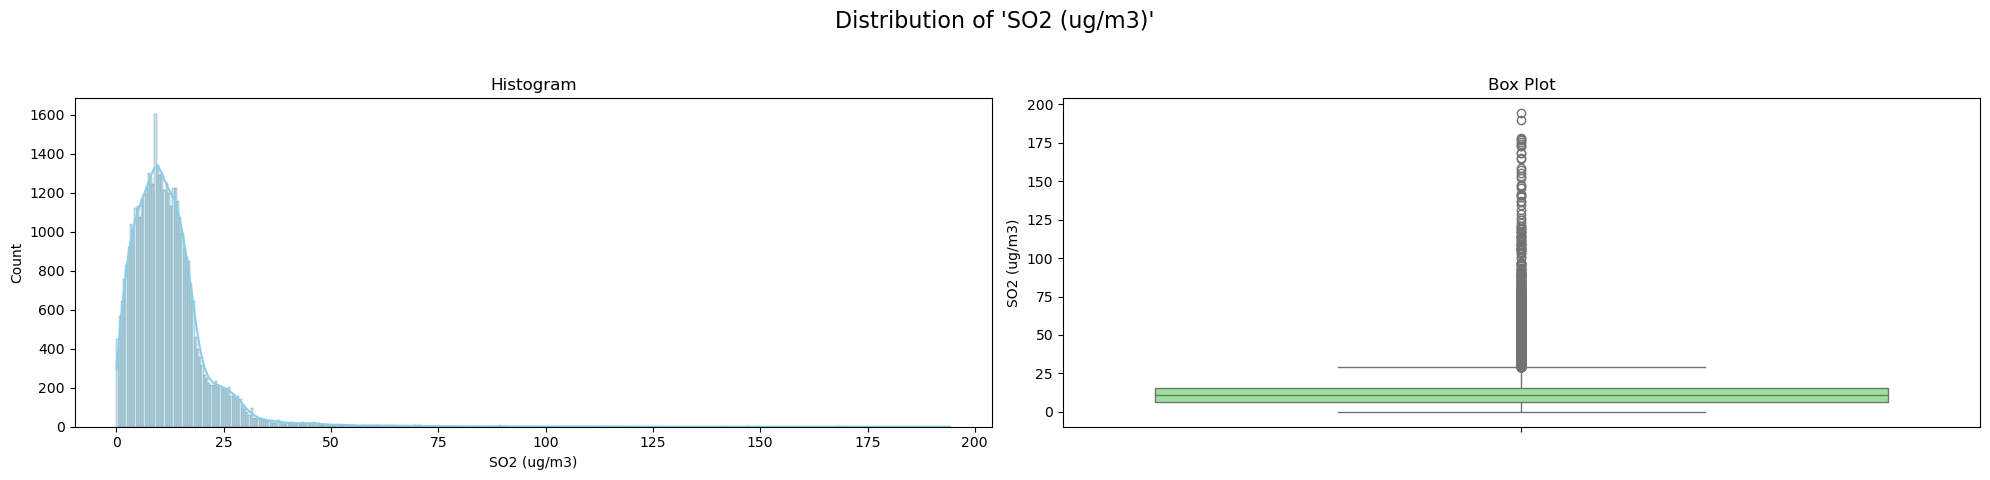

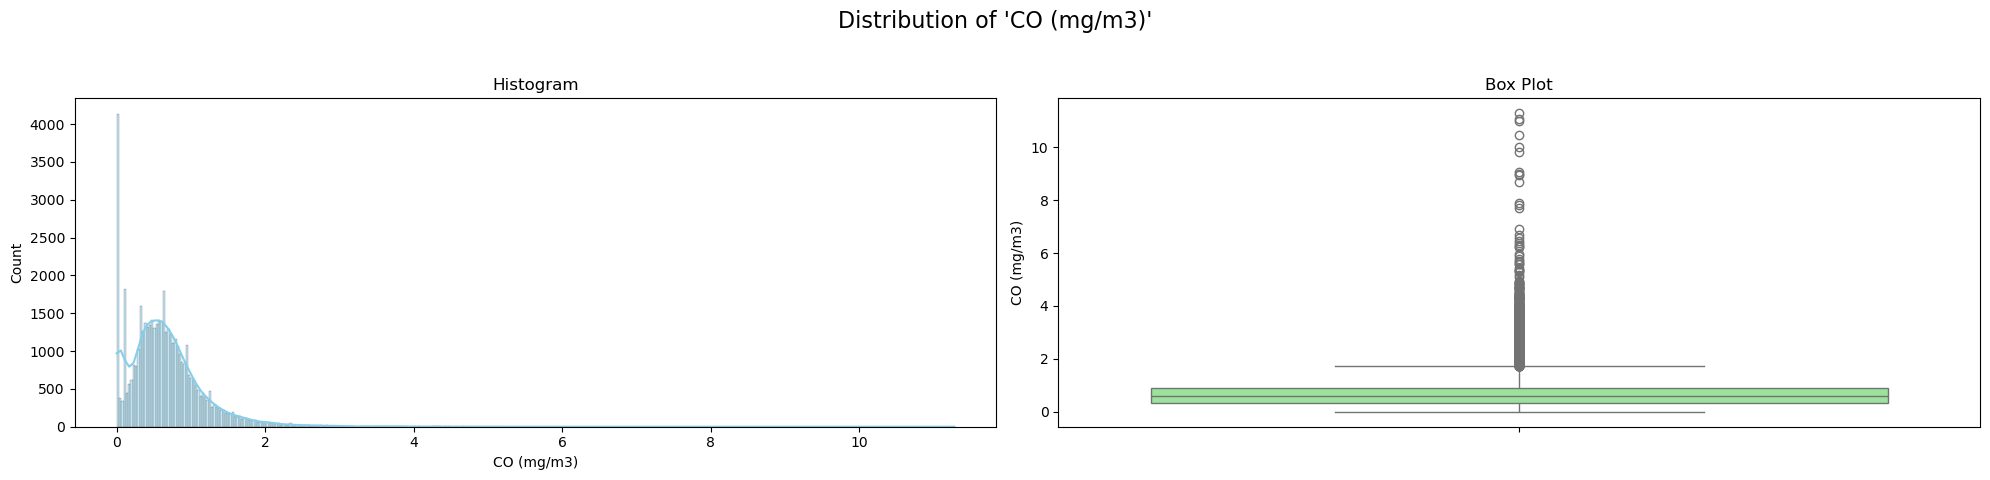

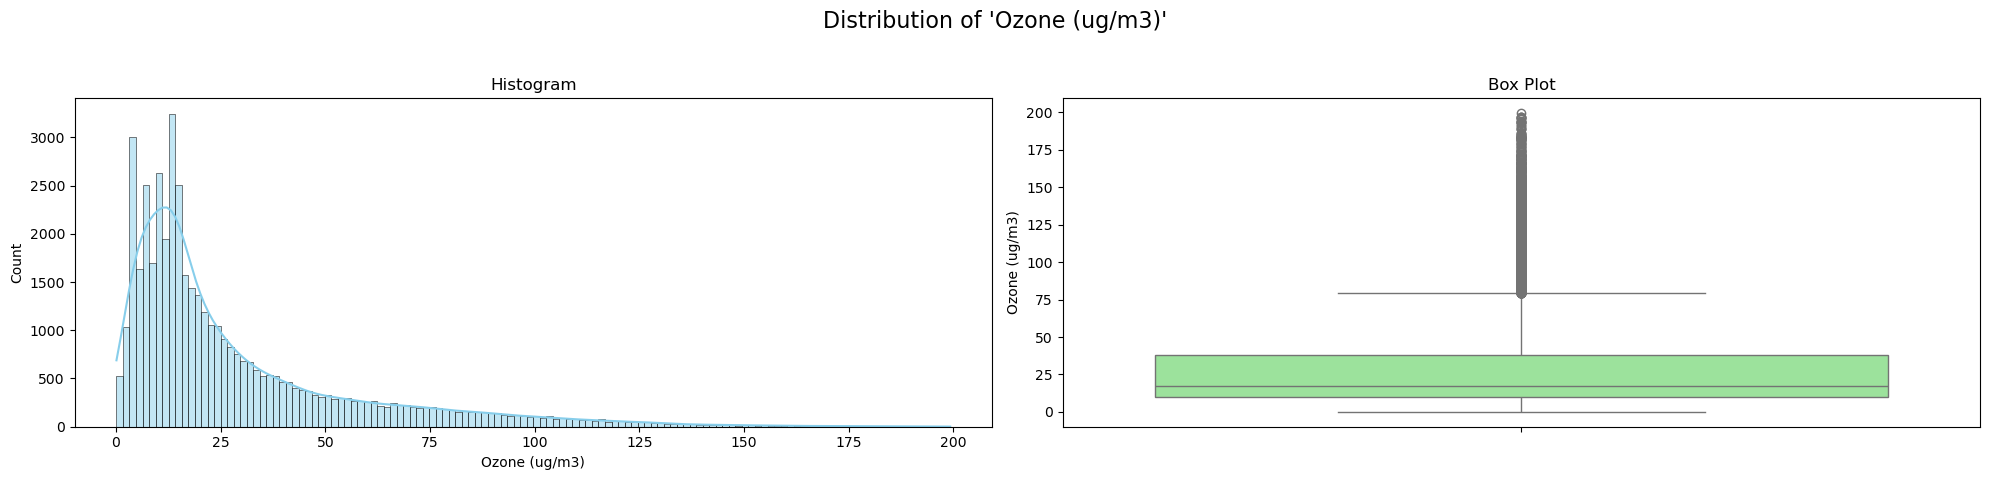

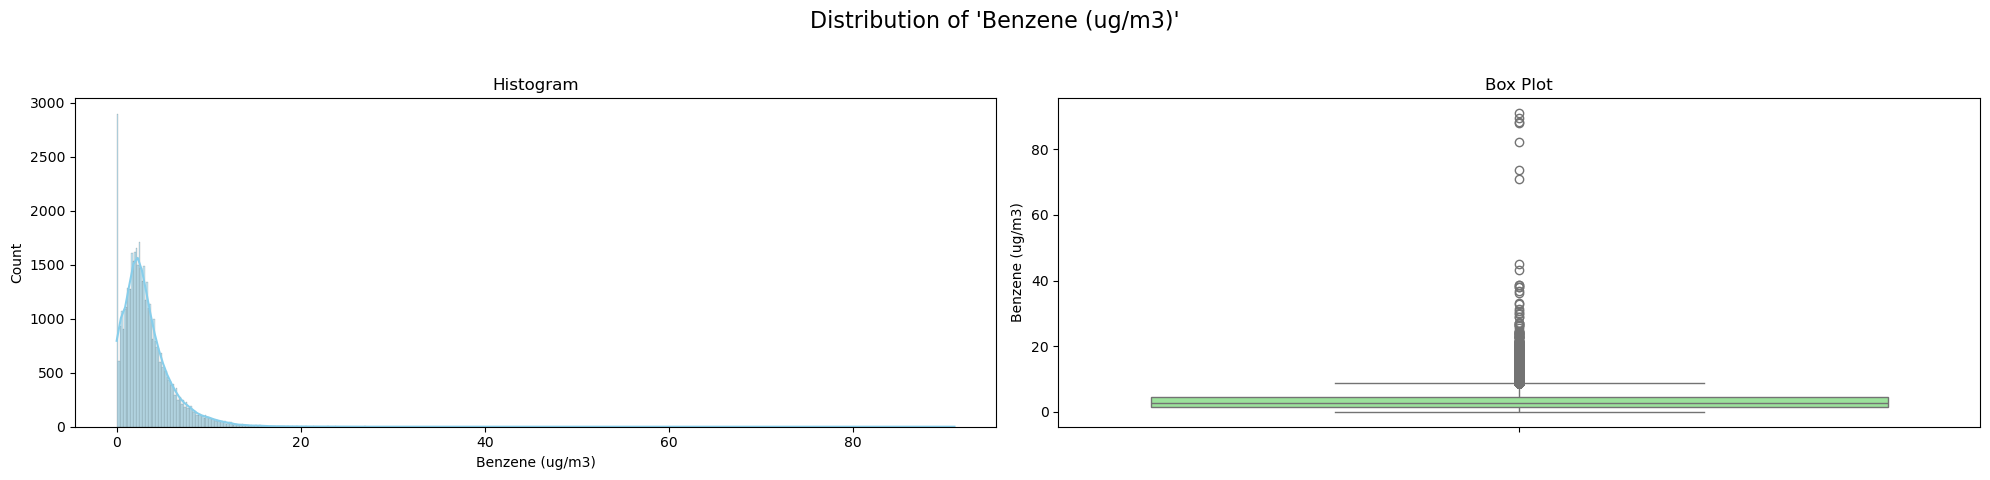

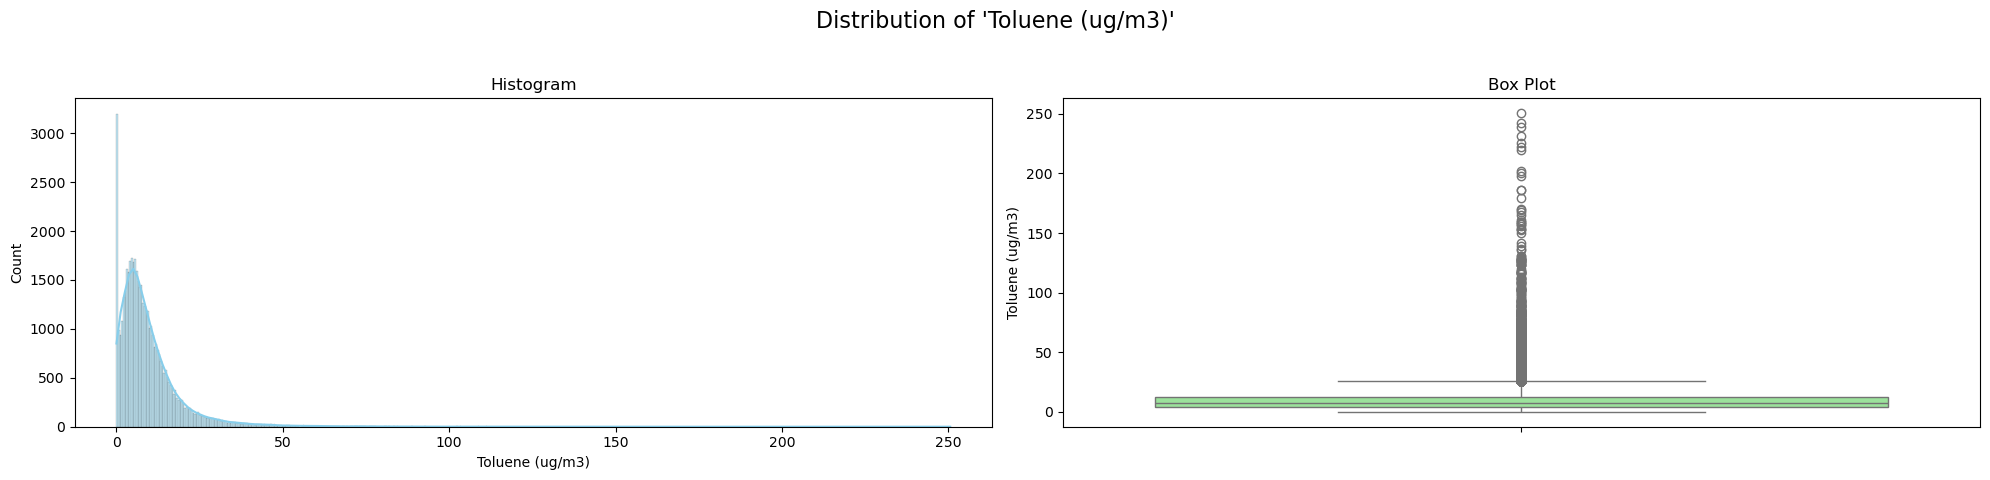

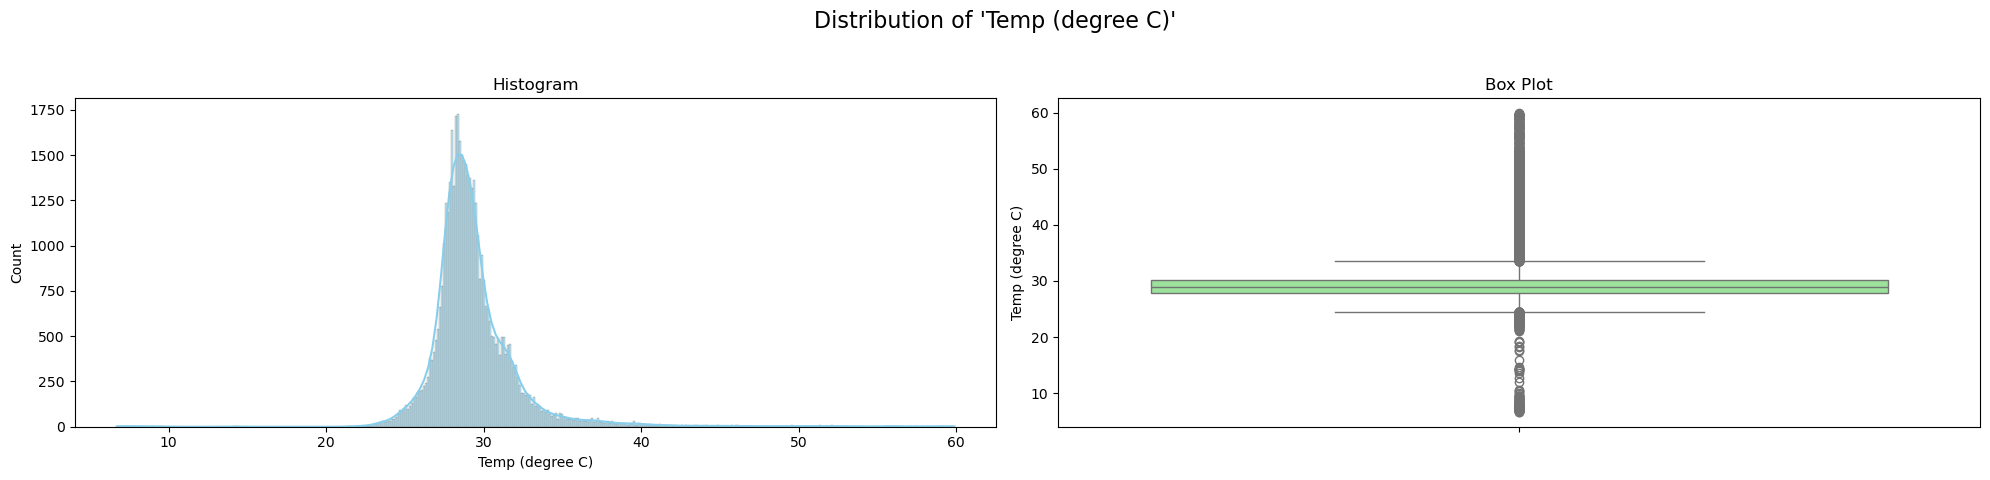

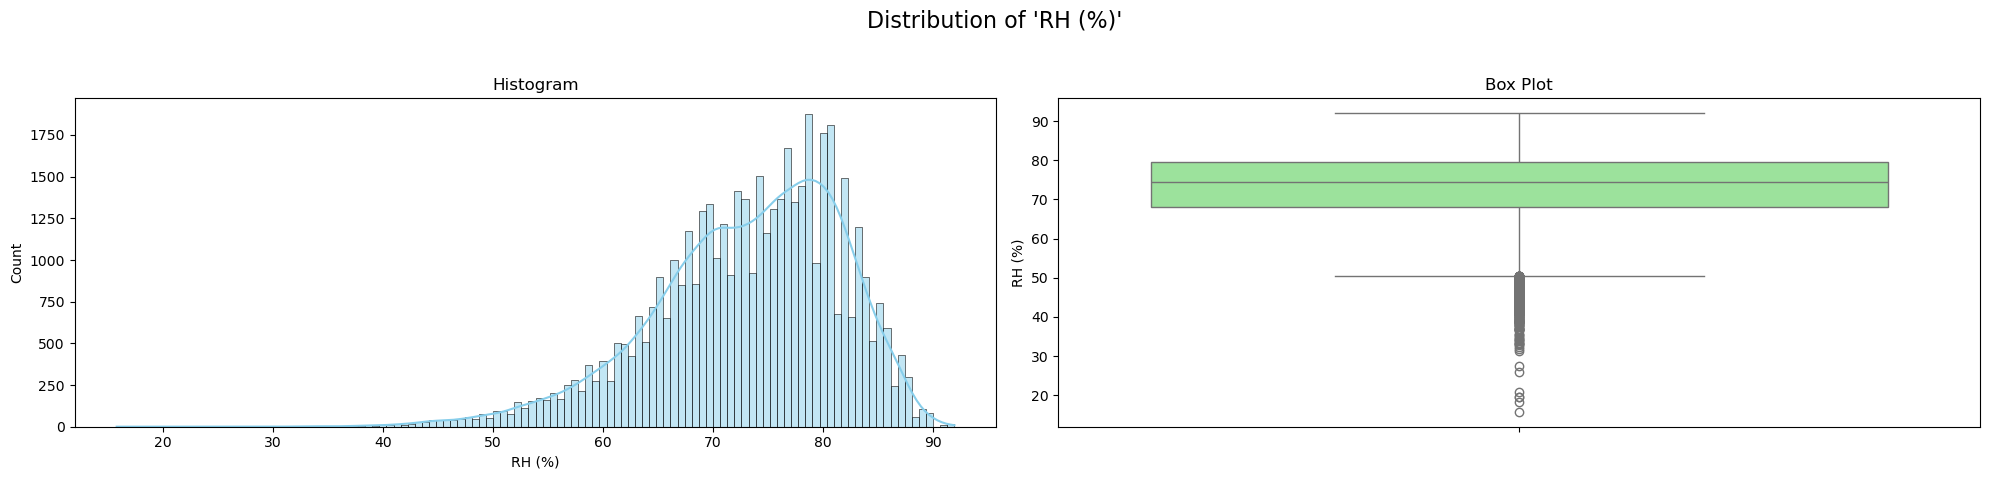

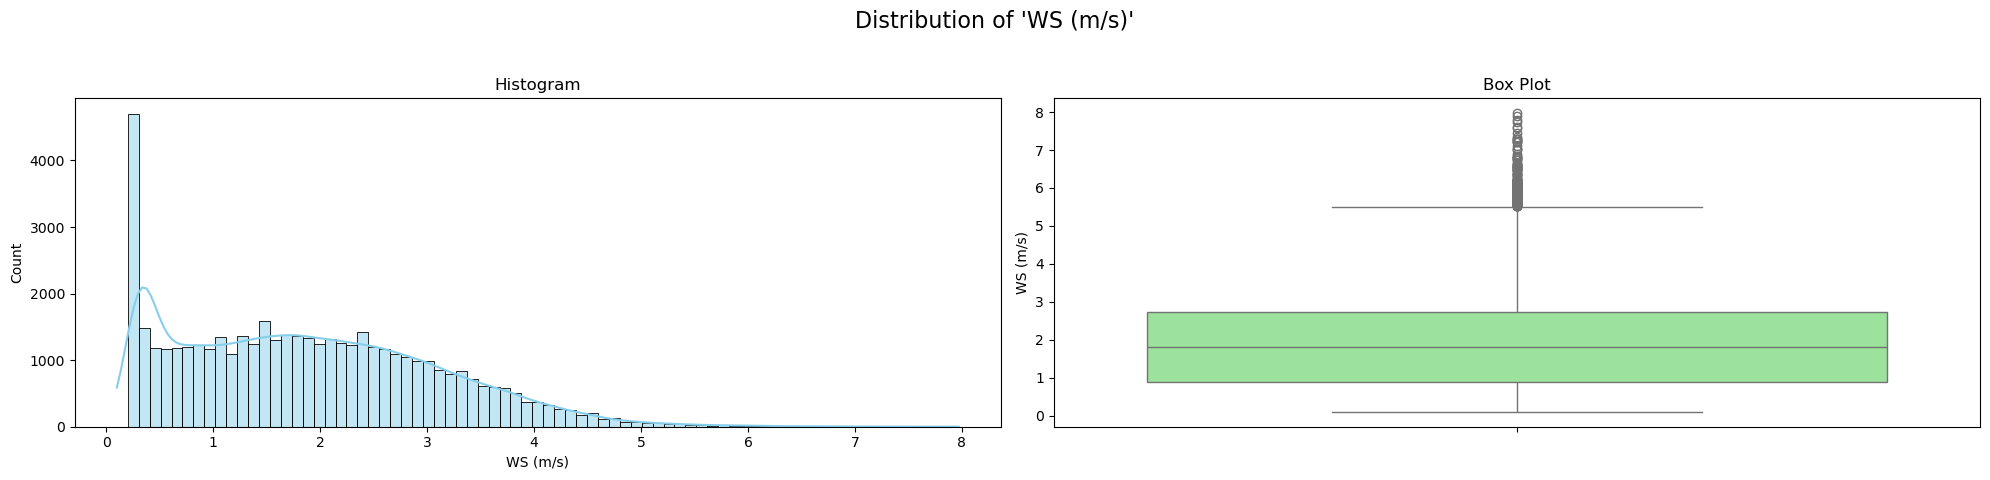

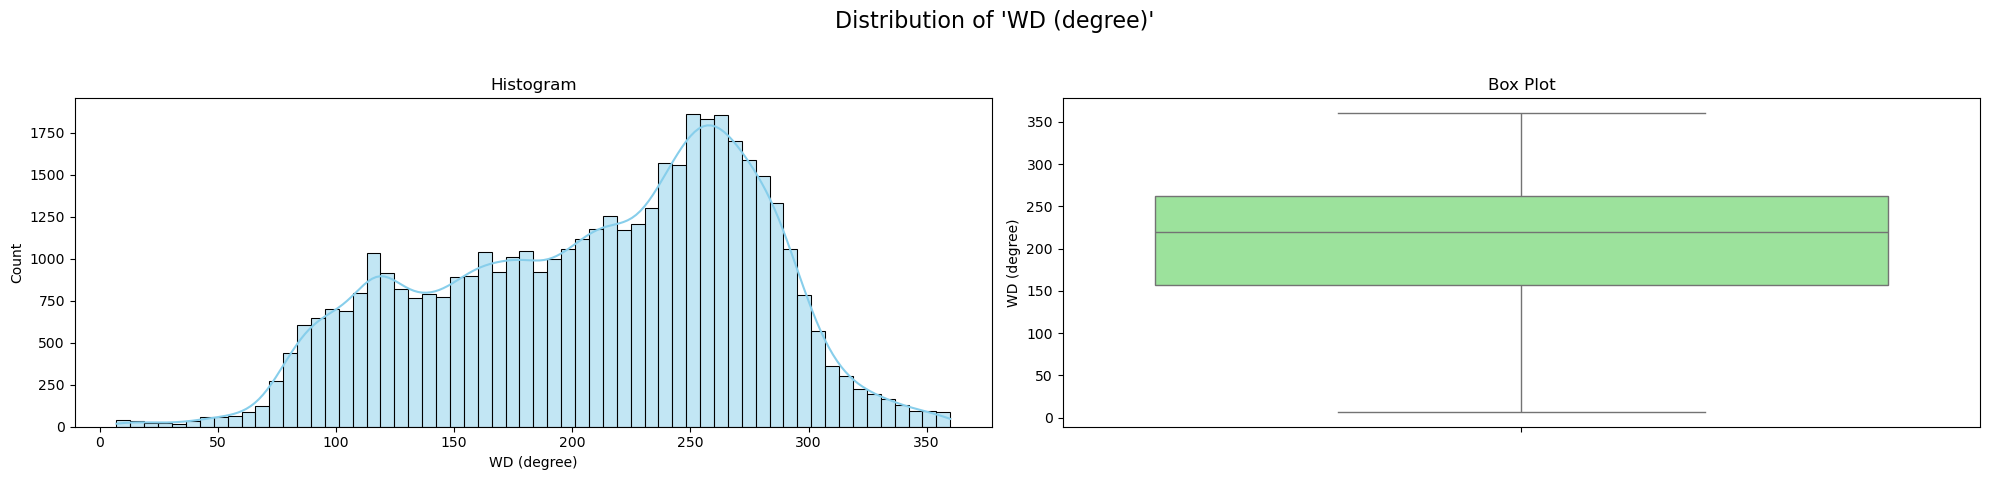

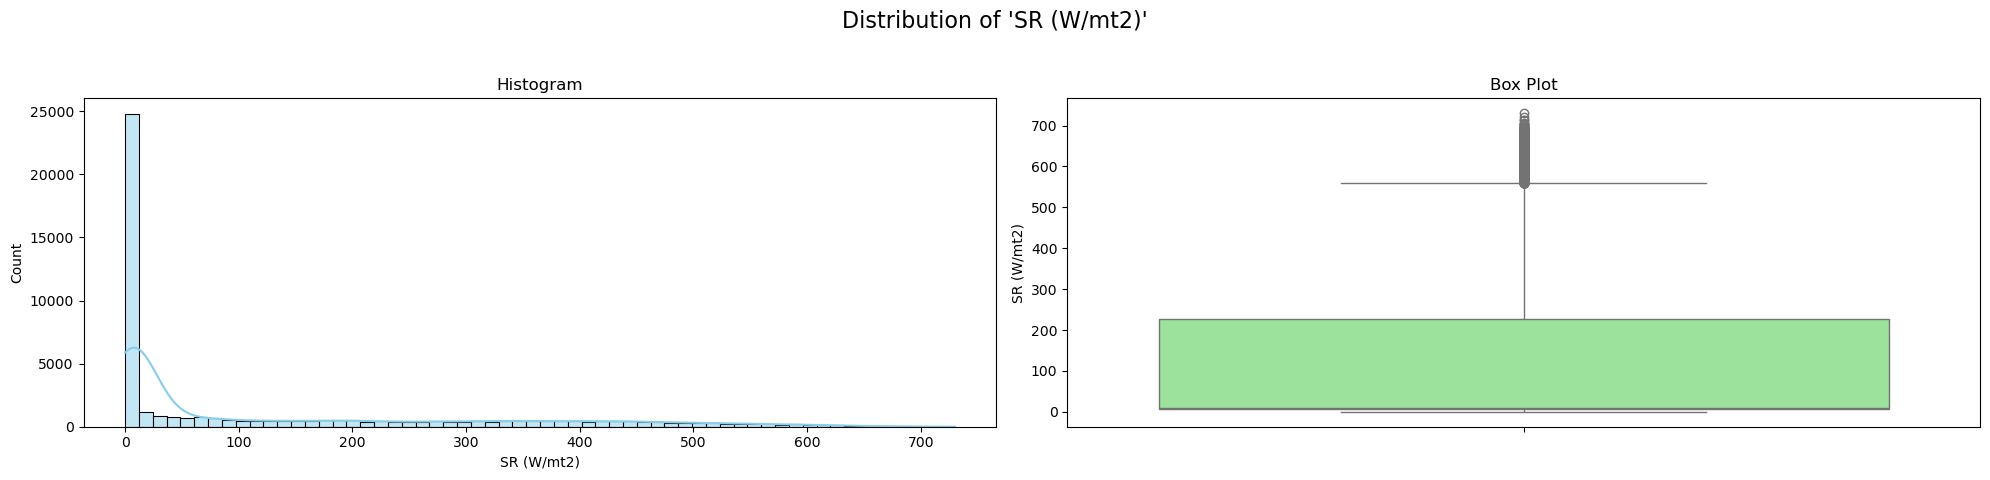

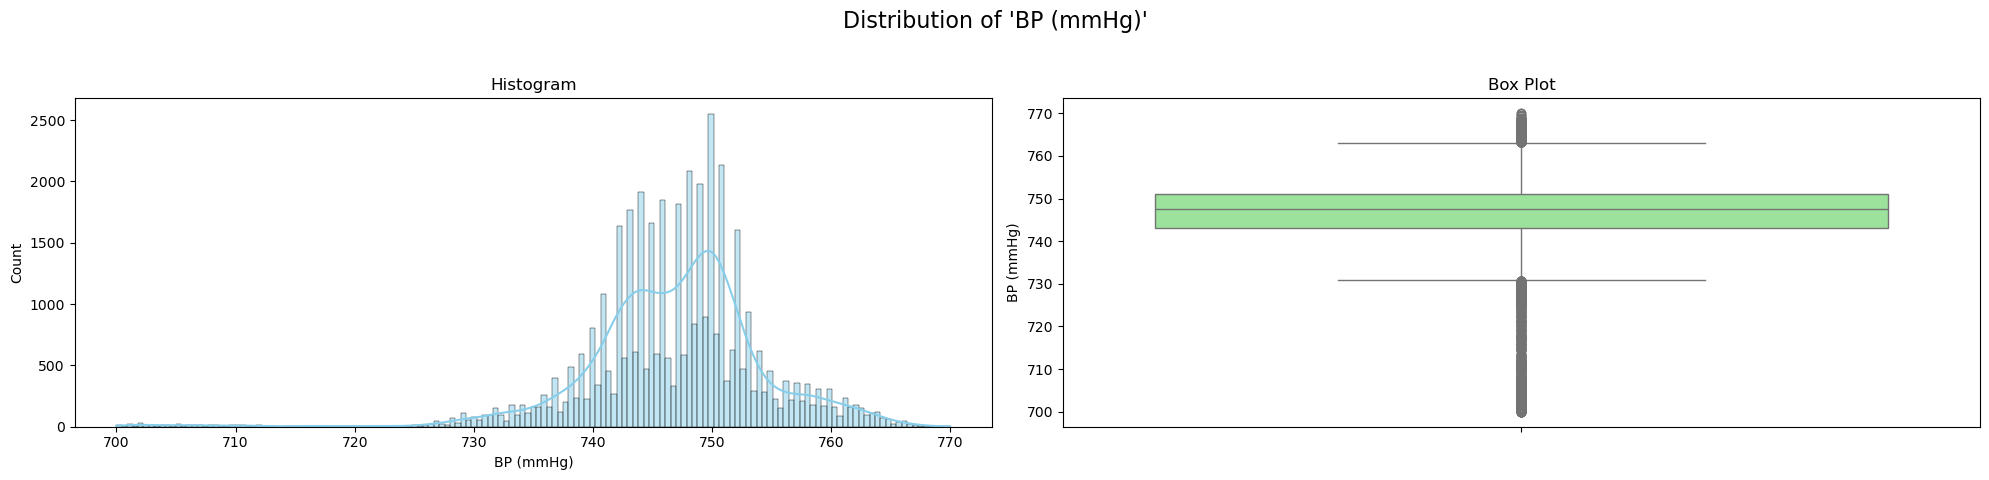

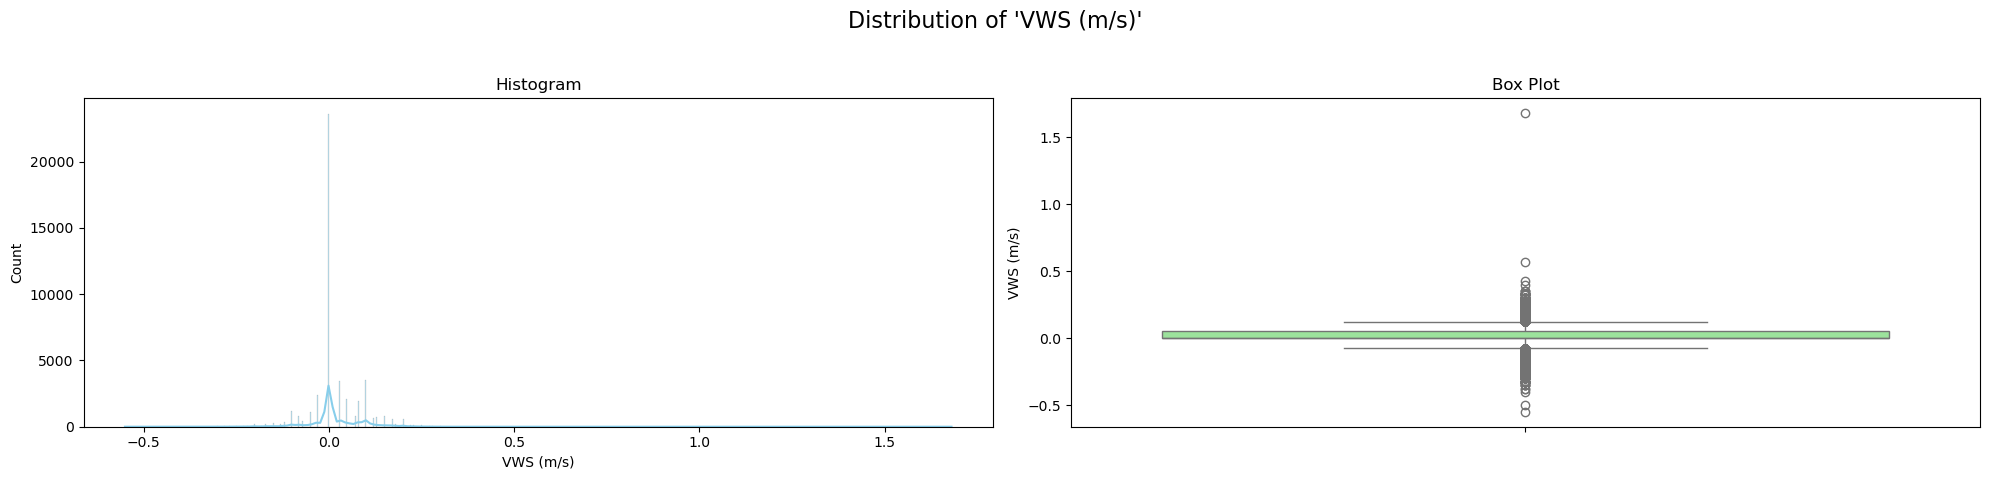

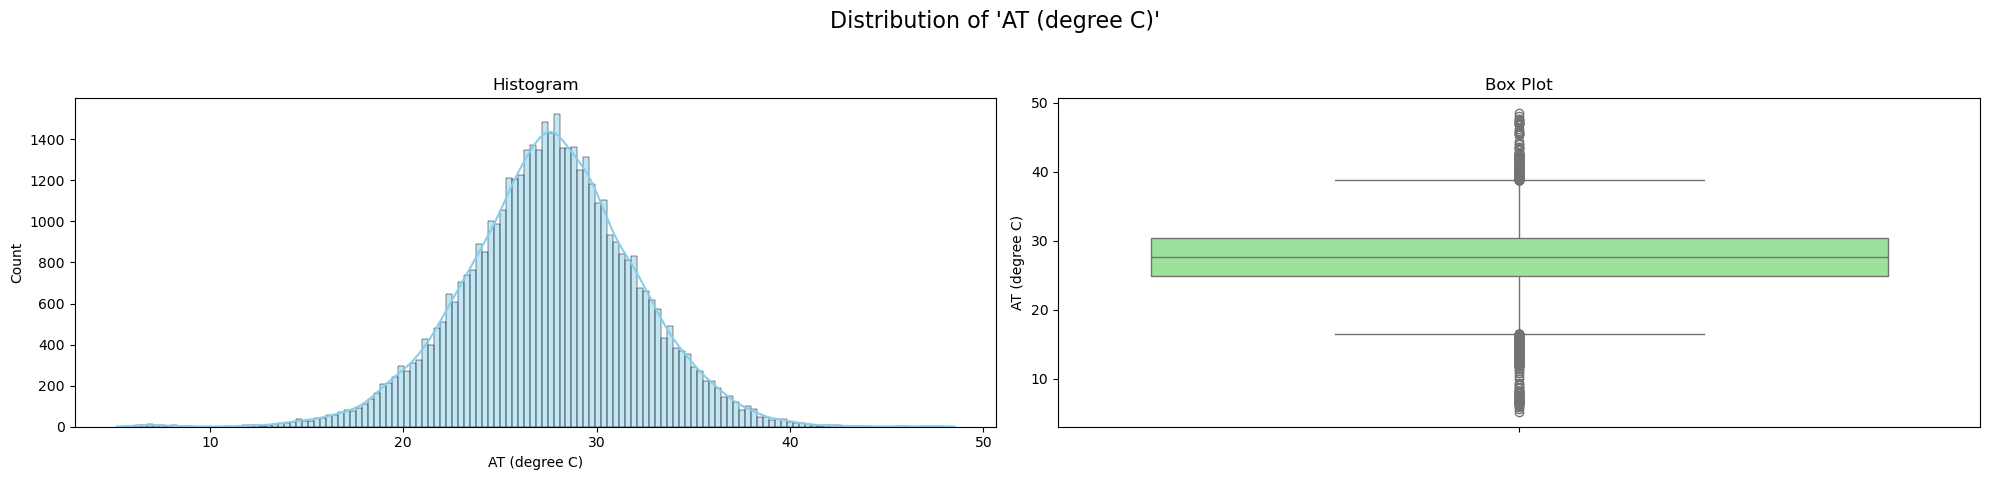

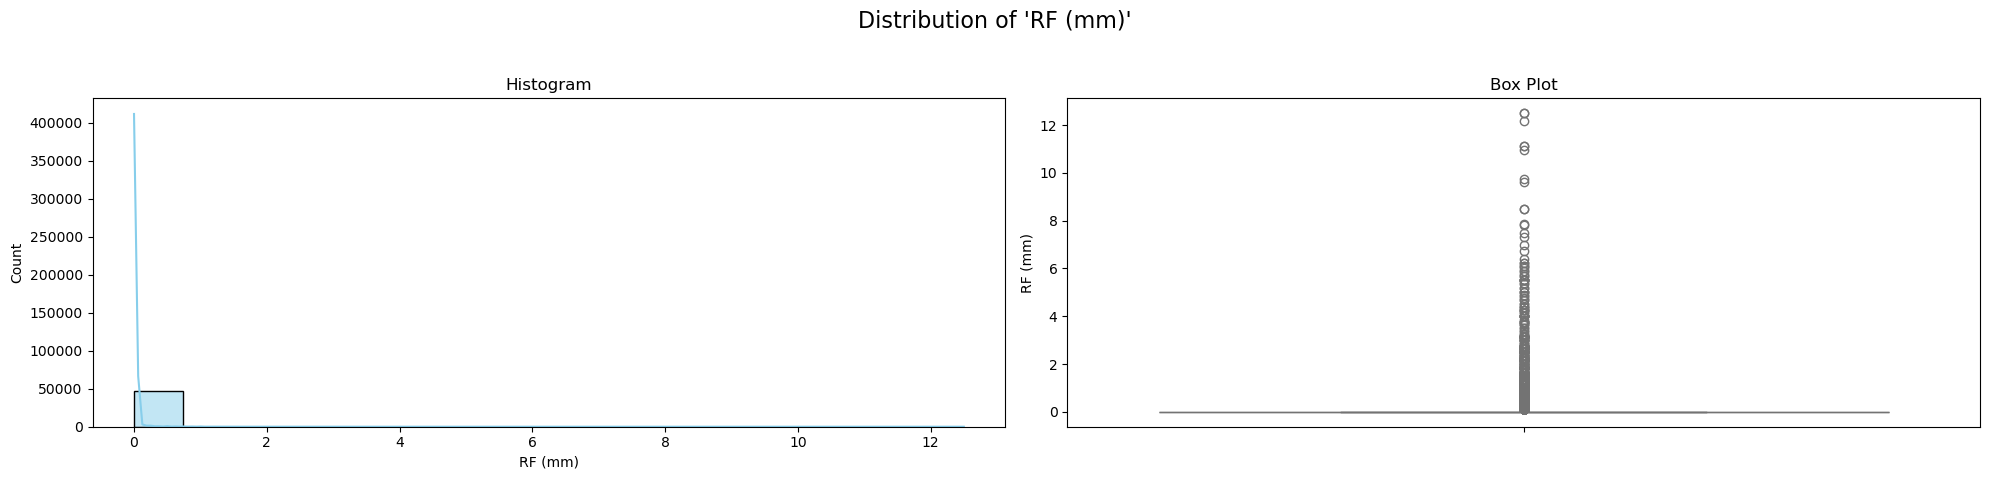

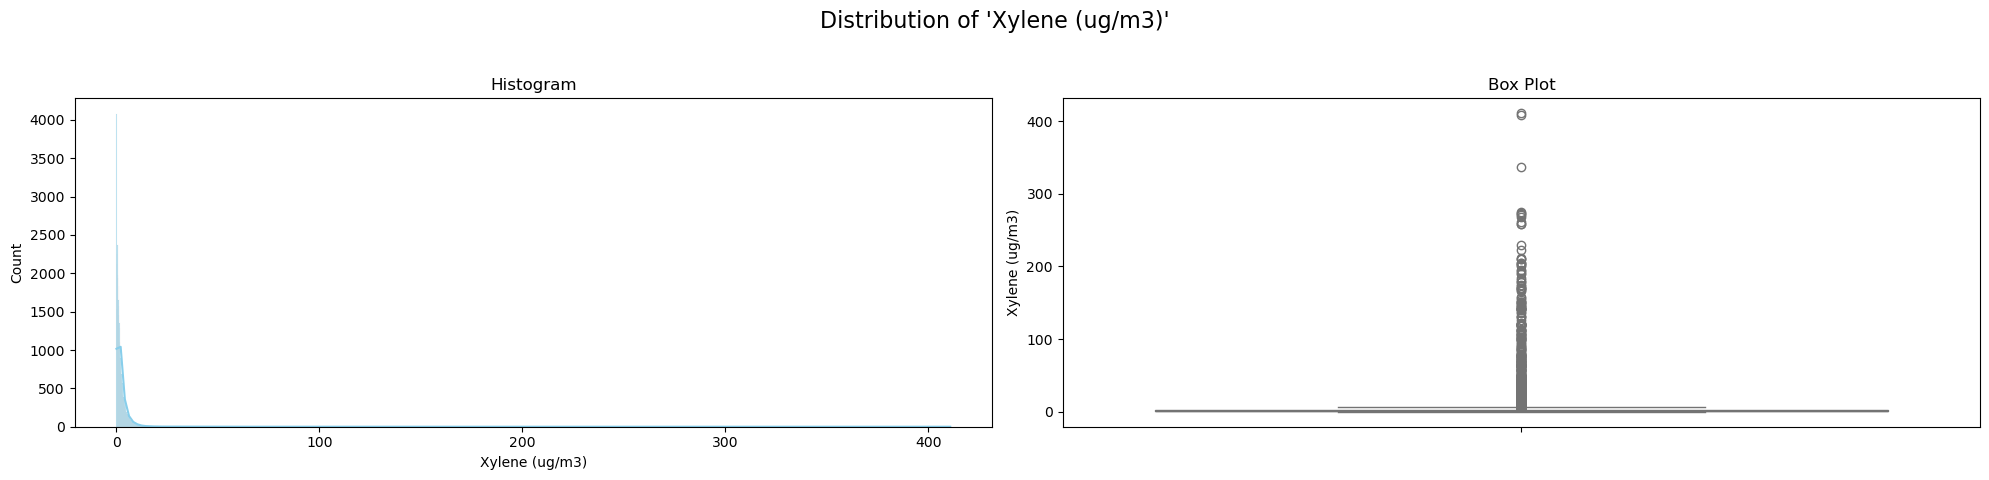

In [ ]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(f"Distribution of '{col}'", fontsize=16)
    
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title("Histogram")
    axes[0].set_xlabel(col)
    
    sns.boxplot(y=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title("Box Plot")
    axes[1].set_ylabel(col)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
stats_list = []

for col in numerical_columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    stats_list.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurtosis})

results_df = pd.DataFrame(stats_list)

print("Skewness and Kurtosis for each column:")
print(results_df.to_string())

Skewness and Kurtosis for each column:
             Column   Skewness    Kurtosis
0     PM2.5 (ug/m3)   3.812031   48.483400
1      PM10 (ug/m3)   2.148677    8.227010
2        NO (ug/m3)   4.012153   25.318125
3       NO2 (ug/m3)   1.927266    7.248969
4         NOx (ppb)   2.590884   10.443010
5       NH3 (ug/m3)  10.591016  208.479706
6       SO2 (ug/m3)   4.648163   45.213892
7        CO (mg/m3)   3.086232   28.728344
8     Ozone (ug/m3)   1.882401    3.743338
9   Benzene (ug/m3)   5.031571   97.297713
10  Toluene (ug/m3)   5.322850   59.384152
11  Temp (degree C)   2.867425   22.397830
12           RH (%)  -0.767569    0.752451
13         WS (m/s)   0.557040   -0.136842
14      WD (degree)  -0.349119   -0.748064
15       SR (W/mt2)   1.265855    0.300040
16        BP (mmHg)  -1.240761    6.119678
17        VWS (m/s)   0.365169    8.734655
18    AT (degree C)  -0.149909    0.756505
19          RF (mm)  22.378910  662.515650
20   Xylene (ug/m3)  20.243138  563.492816


All pollutant columns (from PM2.5 to Xylene) have high positive skewness (all> 1.8, some even reach 10 and 20). This is definitively telling us that air pollution is a phenomenon that is driven by events (event-driven). That is, the normal condition is a low to moderate pollution level, but periodically there is an episode of extreme pollution surge. No pollutants are symmetrical distribution. All pollutant columns also have very high positive curtosis (mostly far above 3, even NH3, Benzene, RF, and Xylene reach hundreds). This means that the surge in pollution is not only high, but very extreme and different from its normal value. High curtosis is a numerical sign from the existence of a significant outlier. Your model must be able to handle this sharp surge.

On the plot itself, it shows that some of the data show some seasonality but this is a probelm because it still have a missing values so its better to do inputation on the missing values first.

# Missing Values Plot

Loading the original file AP003.csv...
Found 21 columns with missing data. Plotting patterns...
------------------------------------------------------------


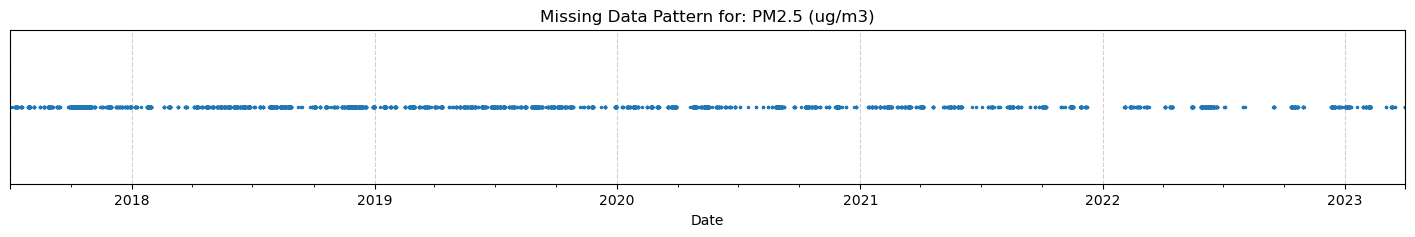

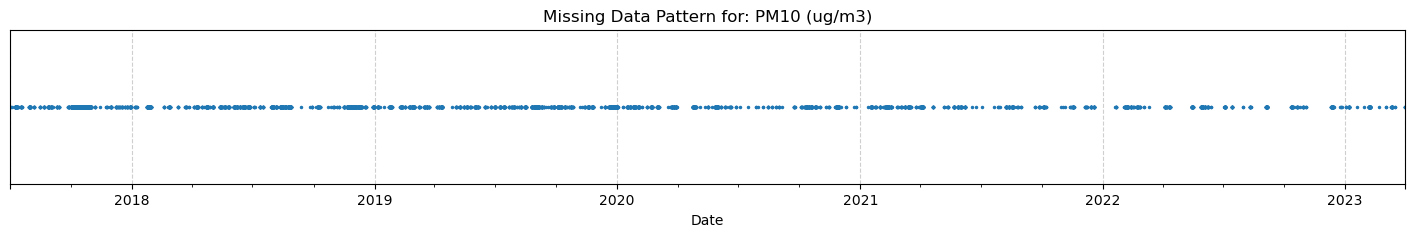

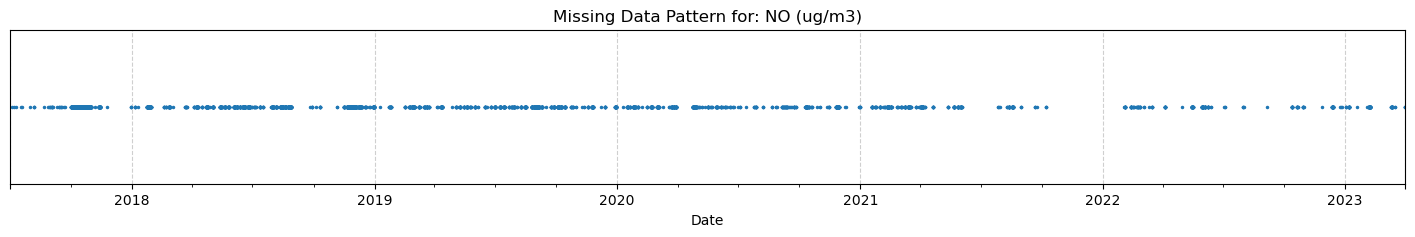

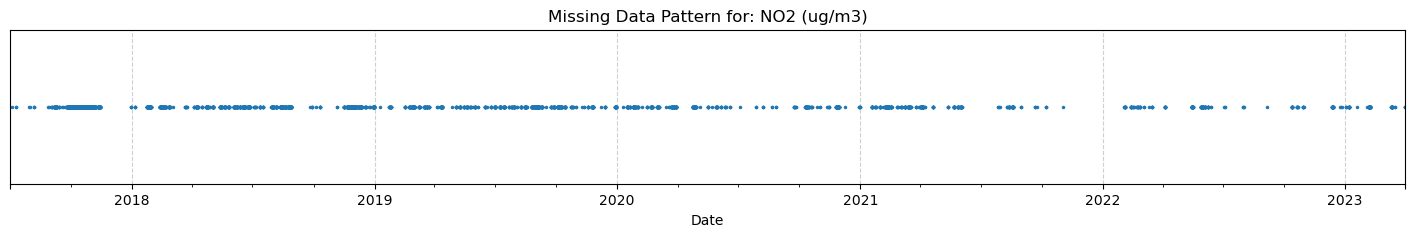

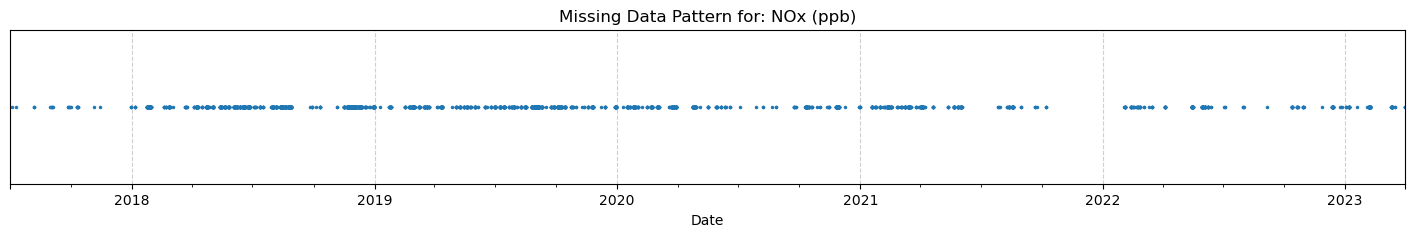

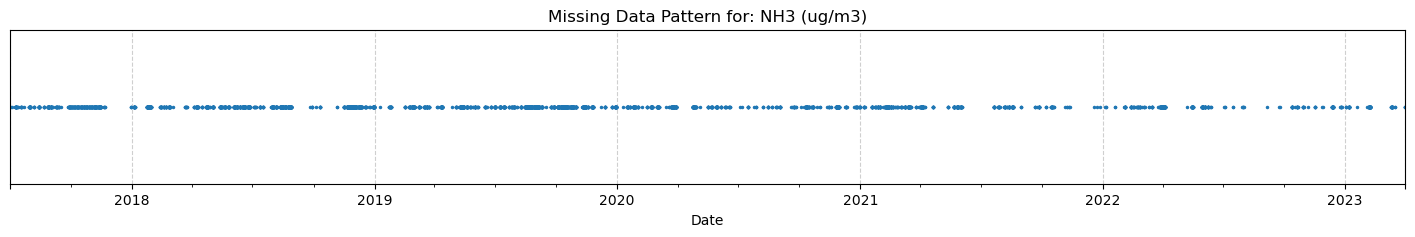

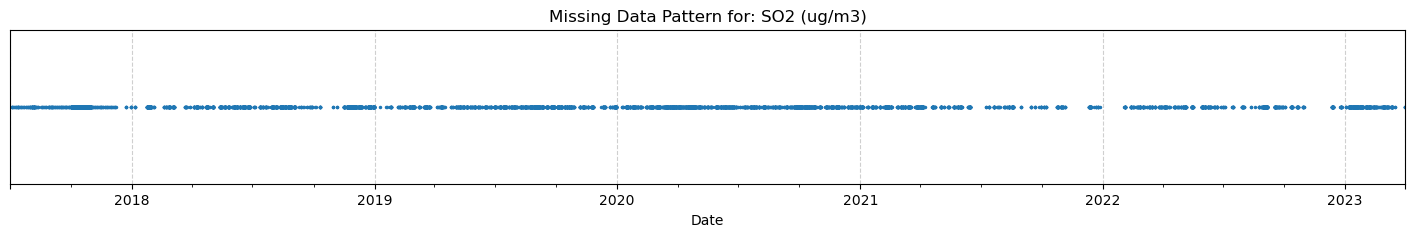

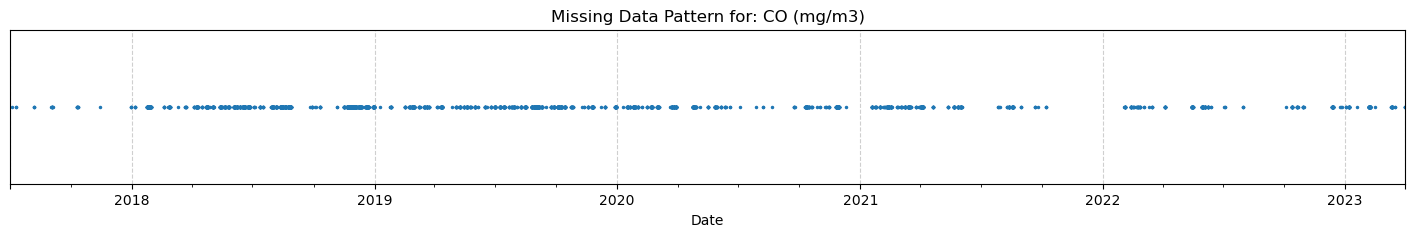

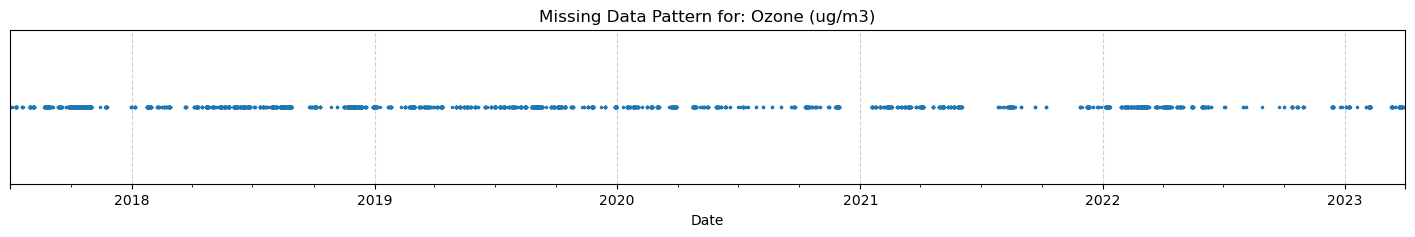

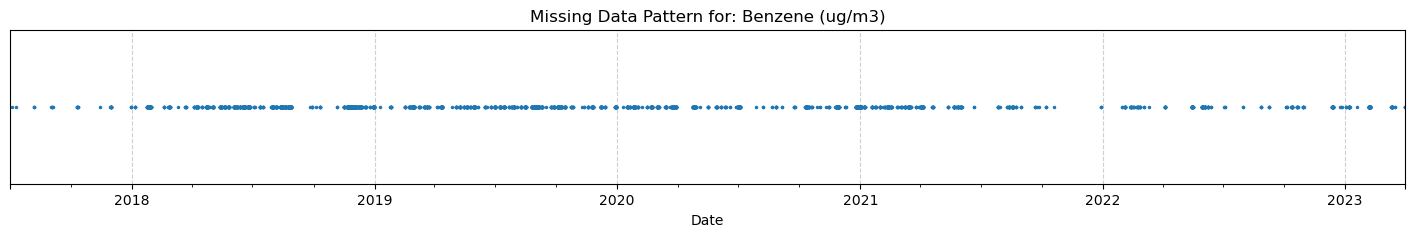

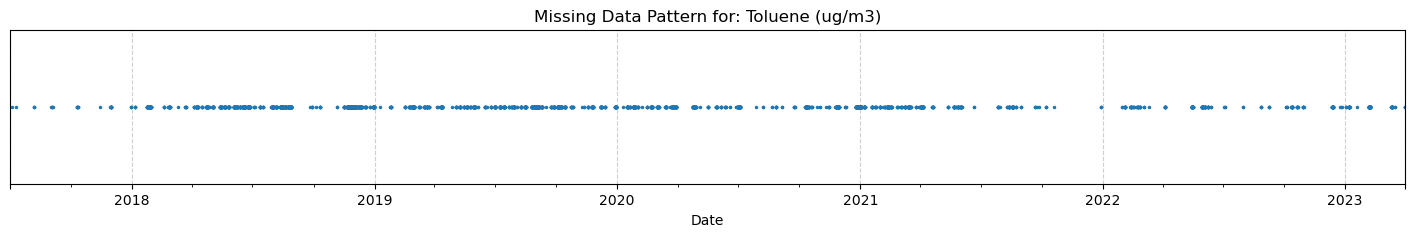

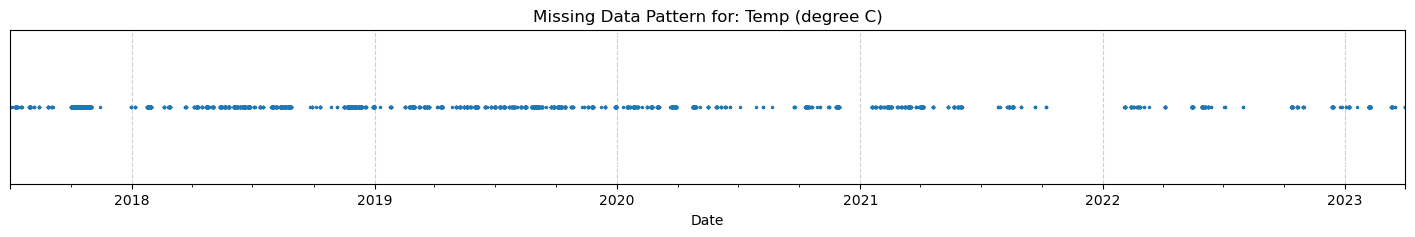

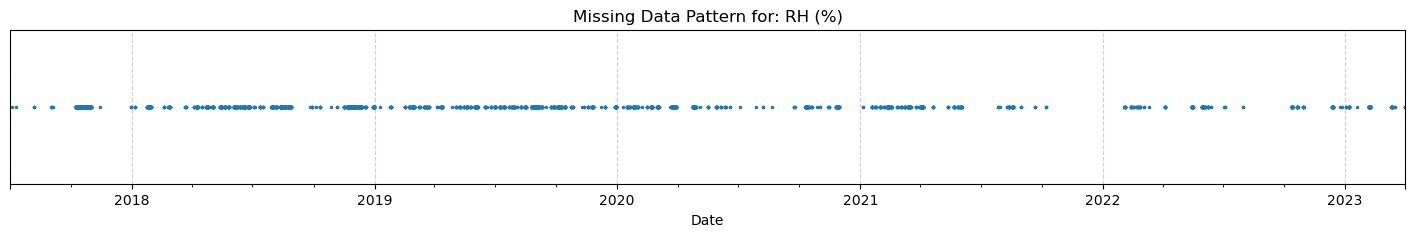

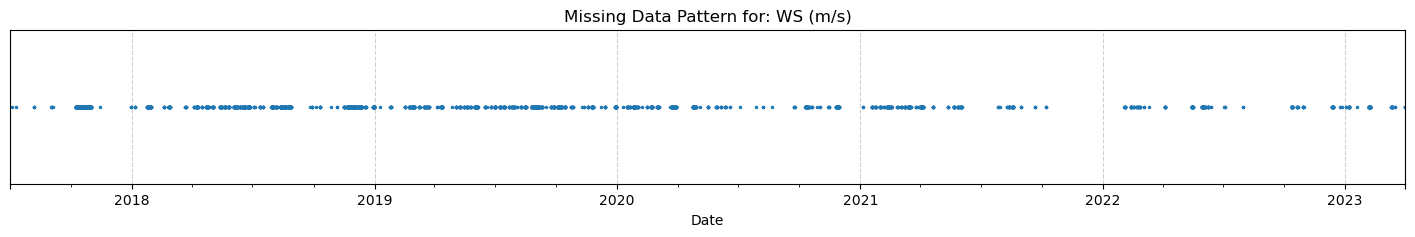

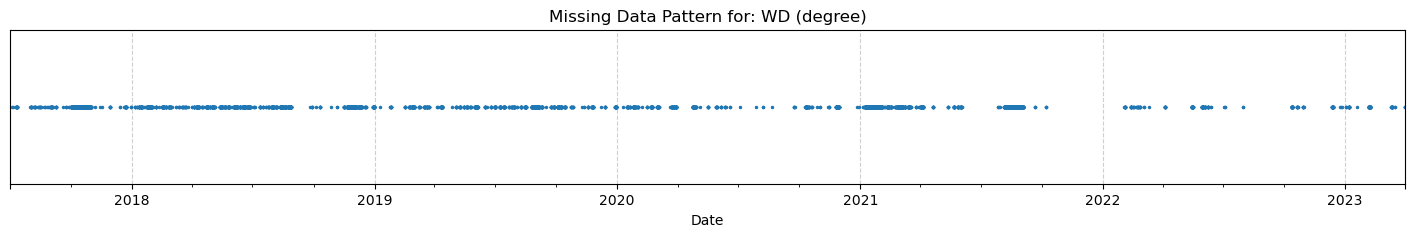

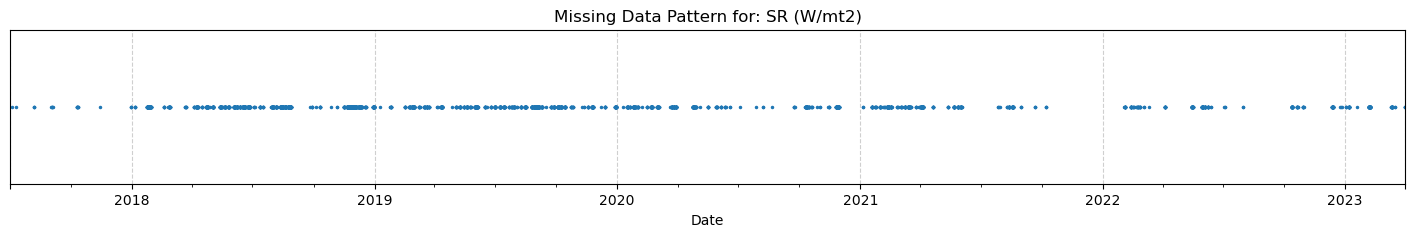

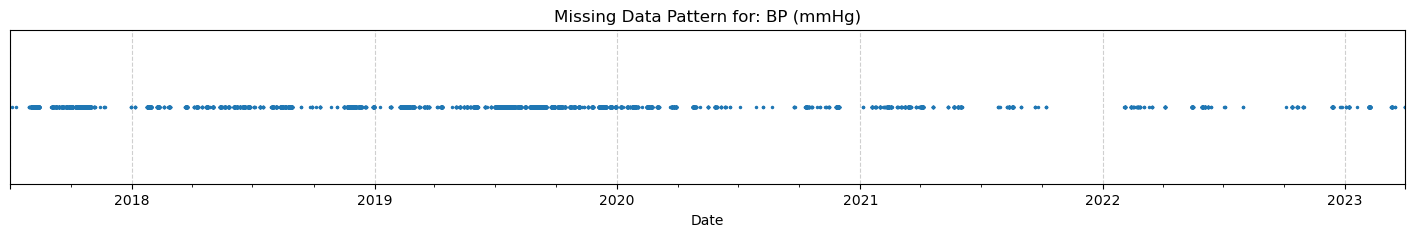

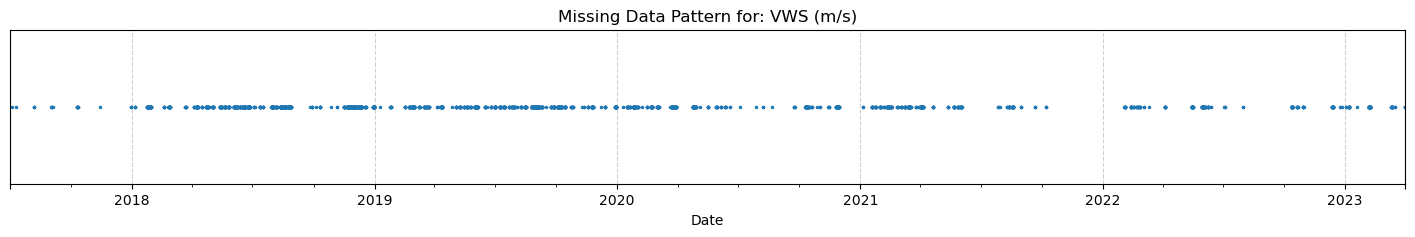

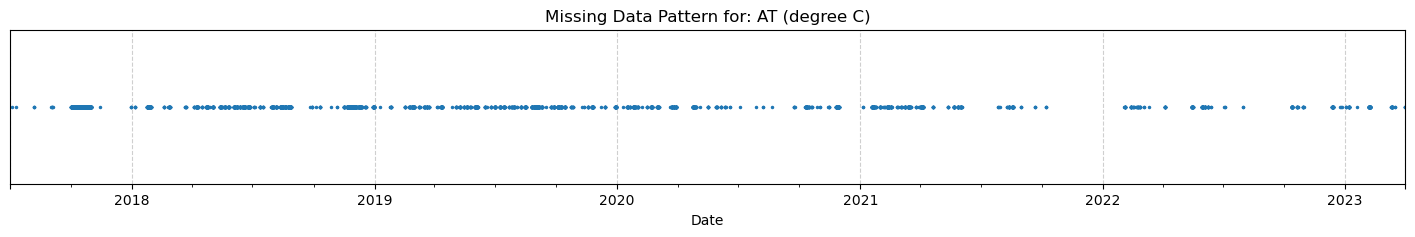

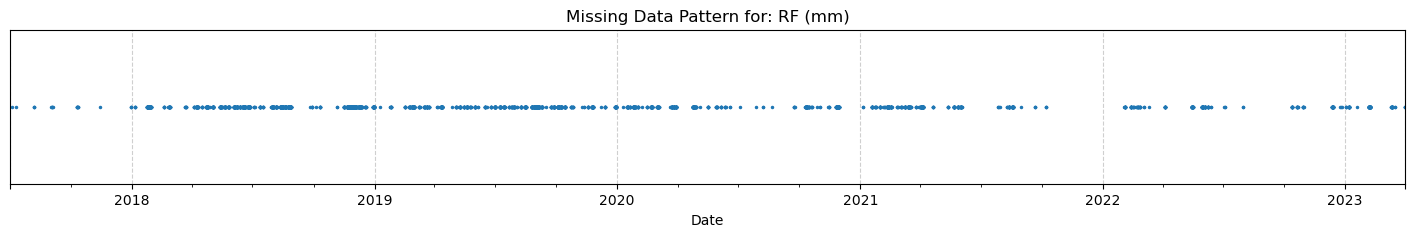

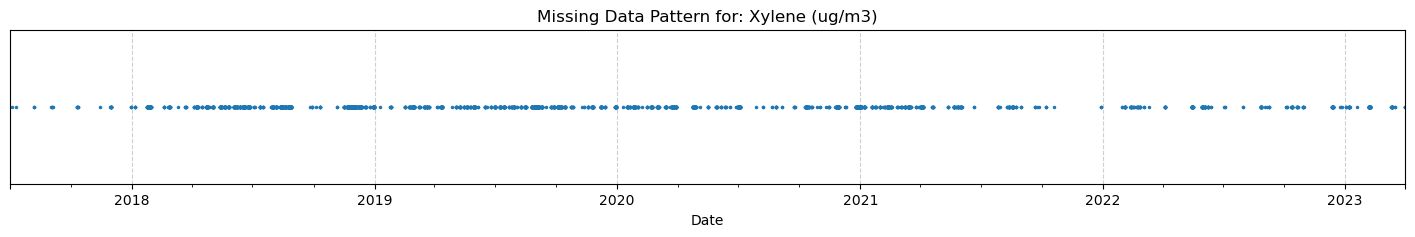


Finished plotting all missing value patterns.


In [ ]:
print("Loading the original file AP003.csv...")
df['From Date'] = pd.to_datetime(df['From Date'])

df.set_index('From Date', inplace=True)
df.sort_index(inplace=True) 

columns_with_missing_data = df.columns[df.isnull().any()]

print(f"Found {len(columns_with_missing_data)} columns with missing data. Plotting patterns...")
print("-" * 60)

for col in columns_with_missing_data:
    missing_series = pd.Series(1, index=df.index).where(df[col].isnull())

    fig, ax = plt.subplots(figsize=(18, 2))
    
    missing_series.plot(
        ax=ax,
        style='.', 
        markersize=3, 
        title=f"Missing Data Pattern for: {col}"
    )
    
    ax.set_xlabel("Date")
    ax.set_yticks([]) 
    ax.set_ylabel("")
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.show()

print("\nFinished plotting all missing value patterns.")


# Count Gaps

In [ ]:
def analyze_consecutive_missing(filepath='AP003.csv'):
    try:
        print(f"Loading raw data from {filepath}...")
        df = pd.read_csv(filepath)

        columns_with_missing = df.columns[df.isnull().any()].tolist()

        if not columns_with_missing:
            print("No columns with missing values found.")
            return

        print("\n--- Analyzing Consecutive Missing Value Blocks ---")

        for col in columns_with_missing:
            print(f"\n==============================================")
            print(f"      Analysis for Column: {col}")
            print(f"==============================================")

            # Create a boolean series: True if missing, False if not
            is_missing = df[col].isnull()

            # Create a grouper that assigns a unique ID to each consecutive block
            # of True's or False's
            block_grouper = (is_missing != is_missing.shift()).cumsum()

            # Group by the block ID and sum the 'is_missing' series.
            # This counts the number of True's (missing values) in each block.
            # Blocks of existing data will have a sum of 0.
            block_lengths = is_missing.groupby(block_grouper).sum()

            # Filter out the blocks of existing data (where sum was 0)
            missing_block_lengths = block_lengths[block_lengths > 0].astype(int)

            if missing_block_lengths.empty:
                print("No consecutive missing values found.")
                continue

            # Create a summary report
            # Count the occurrences of each gap length
            summary = missing_block_lengths.value_counts().reset_index()
            summary.columns = ['Consecutive Hours Missing', 'Number of Occurrences']
            summary = summary.sort_values(by='Consecutive Hours Missing', ascending=False)

            def hours_to_readable(h):
                if h < 24:
                    return f"{h} hours"
                elif h < 168: # less than 7 days
                    return f"{h / 24:.1f} days"
                else:
                    return f"{h / 168:.1f} weeks"
            
            summary['Readable Format'] = summary['Consecutive Hours Missing'].apply(hours_to_readable)

            print(f"Found {len(missing_block_lengths)} total gaps of missing data.")
            print("Summary of gap lengths:")
            print(summary.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

analyze_consecutive_missing('AP003.csv')

Loading raw data from AP003.csv...

--- Analyzing Consecutive Missing Value Blocks ---

      Analysis for Column: PM2.5 (ug/m3)
Found 658 total gaps of missing data.
Summary of gap lengths:
 Consecutive Hours Missing  Number of Occurrences Readable Format
                       239                      1       1.4 weeks
                       236                      1       1.4 weeks
                       183                      1       1.1 weeks
                       128                      1        5.3 days
                        92                      1        3.8 days
                        86                      2        3.6 days
                        85                      1        3.5 days
                        82                      1        3.4 days
                        73                      1        3.0 days
                        71                      1        3.0 days
                        66                      1        2.8 days
                 

# Missing Values Inputation

In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'])
df.set_index('From Date', inplace=True)
df.sort_index(inplace=True)

if 'To Date' in df.columns:
    df.drop('To Date', axis=1, inplace=True)

print(f"Original number of missing values in PM2.5: {df['PM2.5 (ug/m3)'].isnull().sum()}")

print("\nStage 1: Performing Time-Weighted Interpolation...")
df_imputed = df.interpolate(method='time')
print("Stage 2: Back-filling any remaining gaps at the beginning of the series...")
df_imputed.fillna(method='bfill', inplace=True)

print("\n--- Imputation Complete ---")

Original number of missing values in PM2.5: 5709

Stage 1: Performing Time-Weighted Interpolation...
Stage 2: Back-filling any remaining gaps at the beginning of the series...

--- Imputation Complete ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18888\4230515585.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed.fillna(method='bfill', inplace=True)


The primary stage performs a time-weighted linear interpolation, which intelligently fills the majority of missing gaps by considering the actual time difference between known data points. This approach has the significant advantage of accurately preserving the local trends and temporal dynamics within data. 

Since interpolation cannot fill missing values that exist at the very beginning of the series, the second stage acts as a targeted clean-up step, using a backward fill ('bfill') to populate these remaining gaps with the next valid observation. By combining these two methods, you create a complete dataset that has been thoughtfully imputed, ensuring its crucial time-series characteristics are maintained and making it well-suited for reliable analysis and forecasting.

In [15]:
df_imputed.isna().sum()

PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
AT (degree C)      0
RF (mm)            0
Xylene (ug/m3)     0
dtype: int64

# After Inputation

In [16]:
df_imputed.describe()

PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   50400.000000  50400.000000  50400.000000  50400.000000  50400.000000   
mean       46.076725    110.866940     14.446998     34.030798     29.576807   
std        34.596856     72.938433     21.833941     23.834368     26.649710   
min         0.250000      1.000000      0.030000      0.030000      0.000000   
25%        23.000000     62.750000      2.880000     17.750000     12.720000   
50%        38.000000     97.670000      6.400000     29.650000     22.670000   
75%        61.500000    136.750000     16.900000     43.250000     36.620000   
max       840.000000    904.000000    419.780000    420.200000    408.250000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Ozone (ug/m3)  \
count  50400.000000  50400.000000  50400.000000   50400.000000   
mean      13.889019     12.135878      0.673219      29.651395   
std       15.882217     10.567917      0.545399      29.947603   
min        0.020000      0.030000      0.000000       0.100000   
25%        6.800000      6.000000      0.340000      10.030000   
50%       11.516250     10.350000      0.600000      17.920000   
75%       16.722500     15.330000      0.900000      38.285000   
max      454.900000    194.250000     11.280000     199.300000   

       Benzene (ug/m3)  ...  Temp (degree C)        RH (%)      WS (m/s)  \
count     50400.000000  ...     50400.000000  50400.000000  50400.000000   
mean          3.393034  ...        29.346574     72.578782      1.917879   
std           3.013132  ...         3.907355      9.496132      1.190432   
min           0.000000  ...         6.700000     15.750000      0.100000   
25%           1.530000  ...        27.880000     67.332812      0.900000   
50%           2.750000  ...        28.880000     74.000000      1.830000   
75%           4.470000  ...        30.280000     79.500000      2.750000   
max          91.000000  ...        59.880000     92.000000      7.970000   

        WD (degree)    SR (W/mt2)     BP (mmHg)     VWS (m/s)  AT (degree C)  \
count  50400.000000  50400.000000  50400.000000  50400.000000   50400.000000   
mean     208.116428    132.212508    745.269442      0.017685      27.477300   
std       69.138167    174.908796     10.367224      0.071678       4.747822   
min        7.000000      0.000000    700.000000     -0.550000       5.180000   
25%      154.487500      6.513333    742.000000      0.000000      24.800000   
50%      218.330000     14.250000    747.000000      0.000000      27.650000   
75%      262.750000    239.000000    751.000000      0.050000      30.420000   
max      360.000000    730.000000    770.000000      1.680000      48.500000   

            RF (mm)  Xylene (ug/m3)  
count  50400.000000    50400.000000  
mean       0.023116        2.659987  
std        0.282006        8.554161  
min        0.000000        0.000000  
25%        0.000000        0.600000  
50%        0.000000        1.350000  
75%        0.000000        2.830000  
max       12.500000      410.850000  

[8 rows x 21 columns]

# PACF

--- Generating PACF Plots (up to 48 lags) for All Columns ---

-- Analyzing PACF for PM2.5 (ug/m3) --


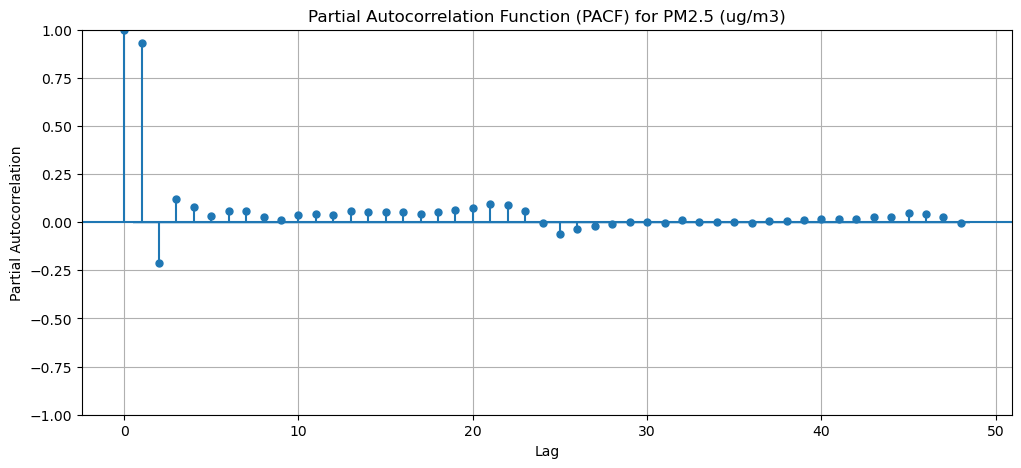


-- Analyzing PACF for PM10 (ug/m3) --


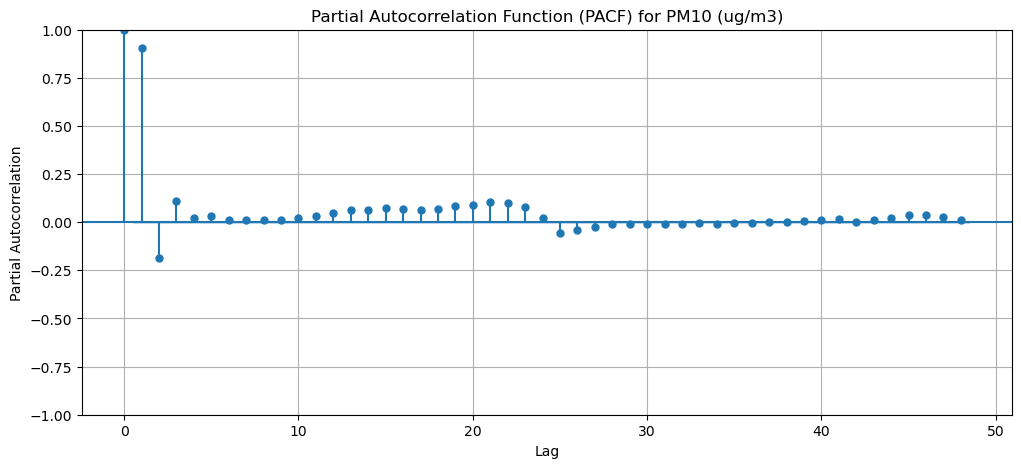


-- Analyzing PACF for NO (ug/m3) --


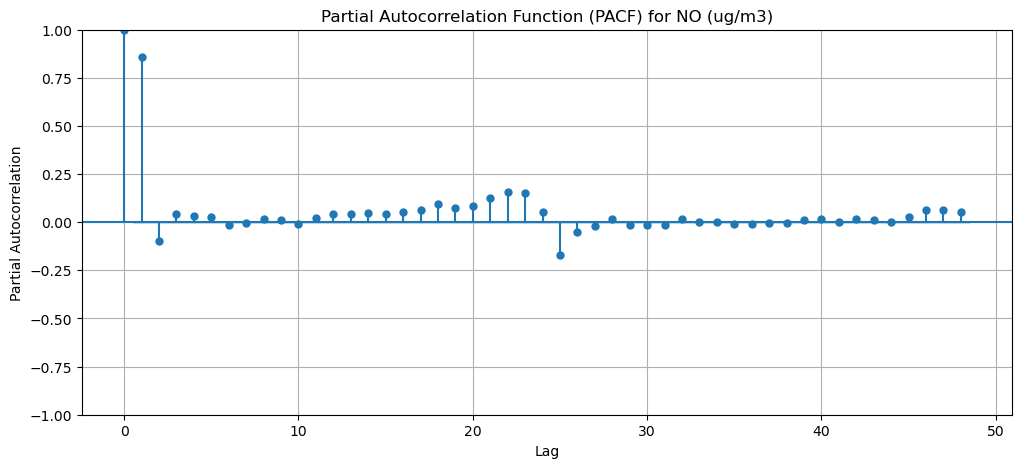


-- Analyzing PACF for NO2 (ug/m3) --


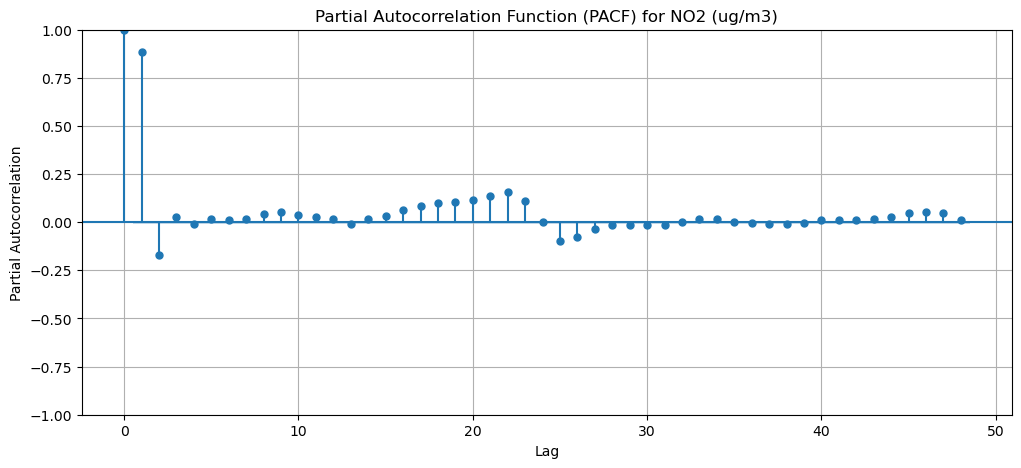


-- Analyzing PACF for NOx (ppb) --


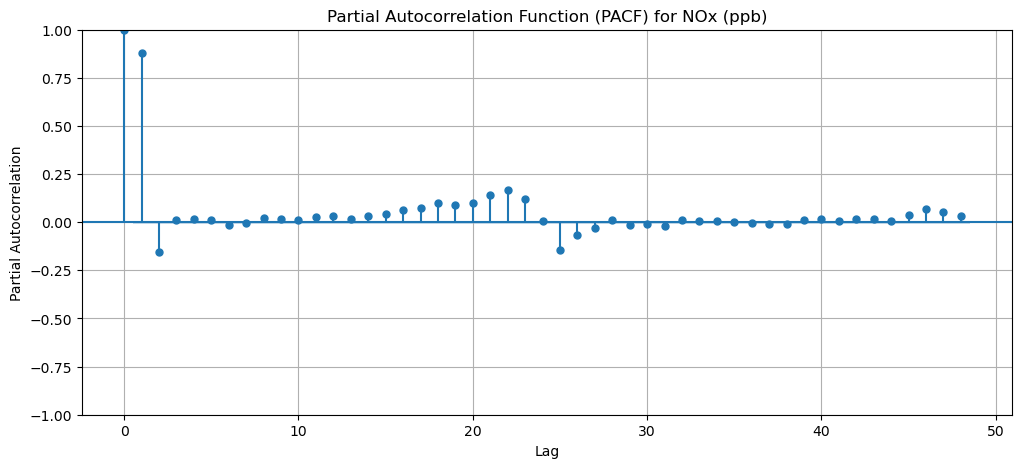


-- Analyzing PACF for NH3 (ug/m3) --


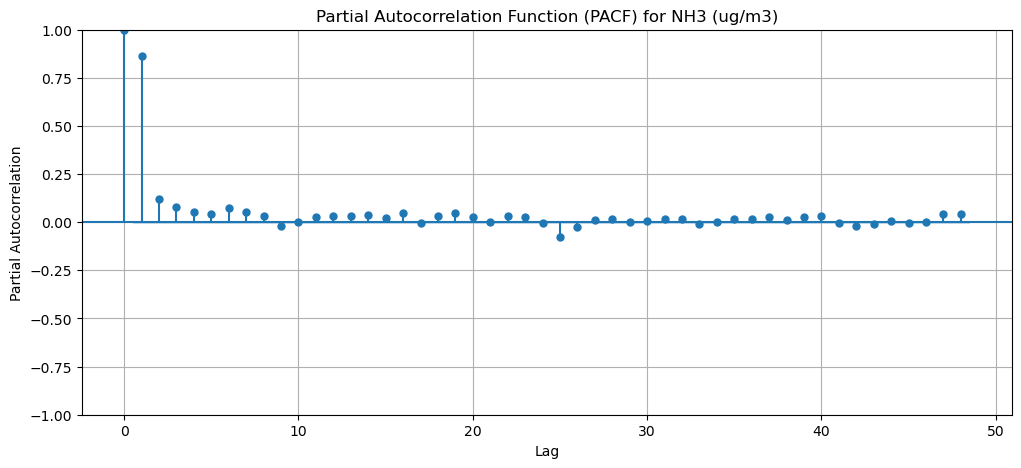


-- Analyzing PACF for SO2 (ug/m3) --


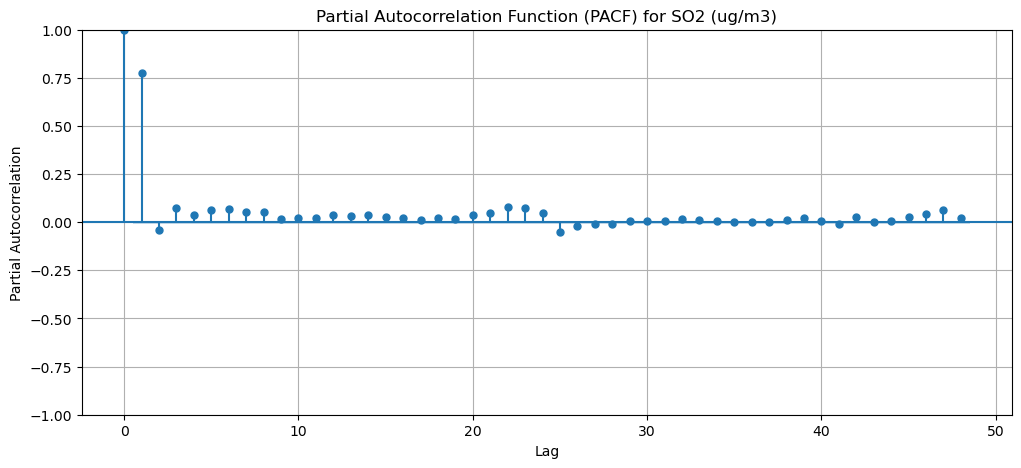


-- Analyzing PACF for CO (mg/m3) --


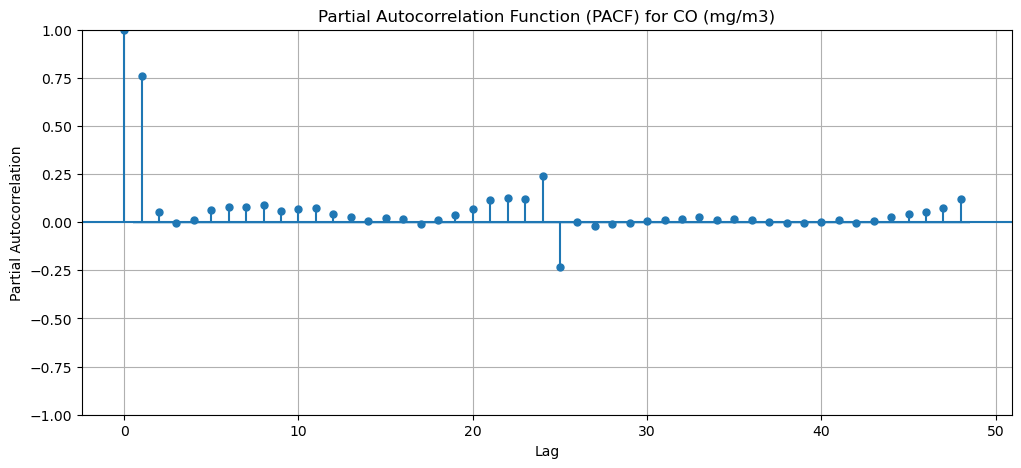


-- Analyzing PACF for Ozone (ug/m3) --


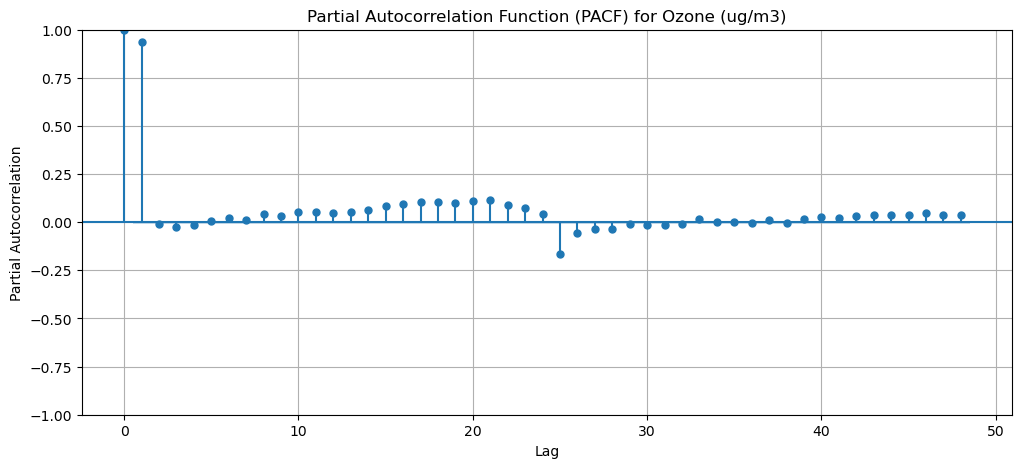


-- Analyzing PACF for Benzene (ug/m3) --


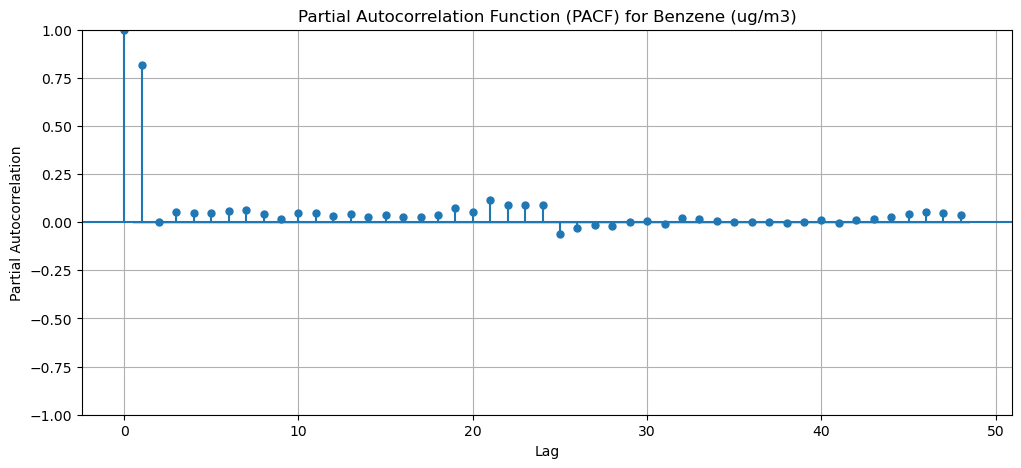


-- Analyzing PACF for Toluene (ug/m3) --


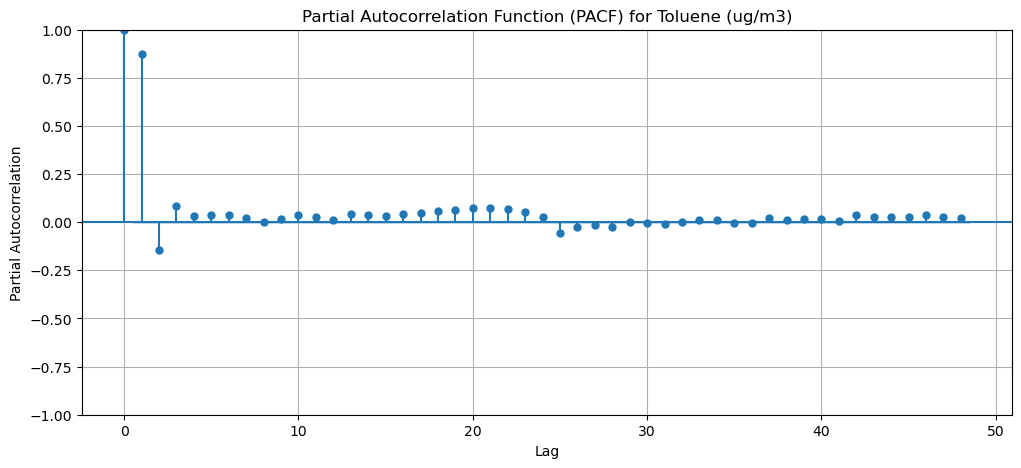


-- Analyzing PACF for Temp (degree C) --


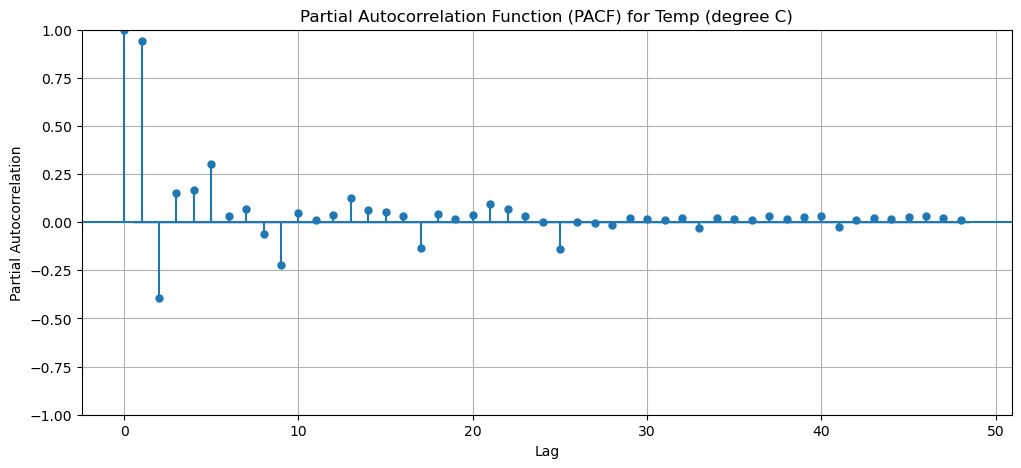


-- Analyzing PACF for RH (%) --


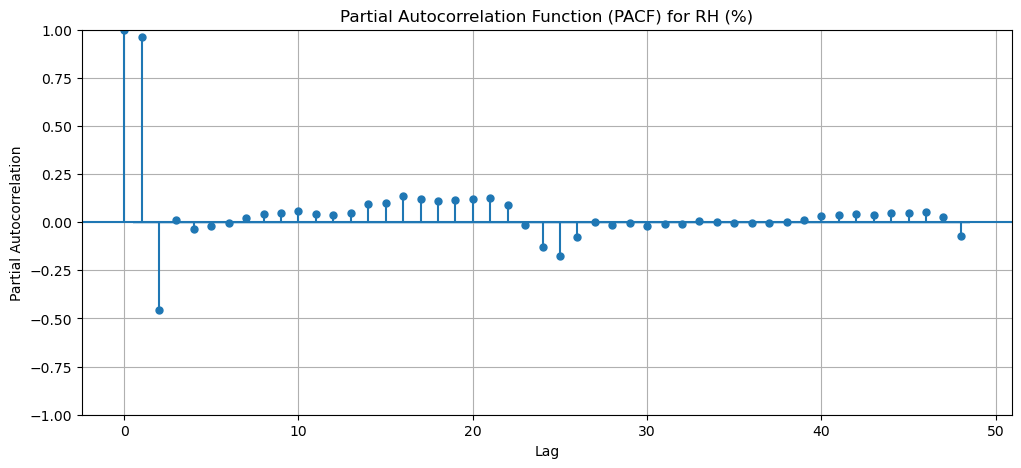


-- Analyzing PACF for WS (m/s) --


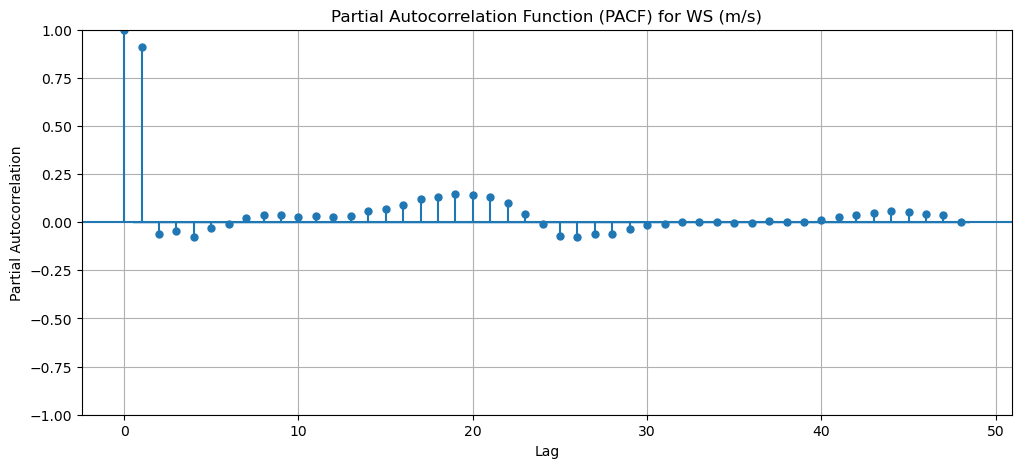


-- Analyzing PACF for WD (degree) --


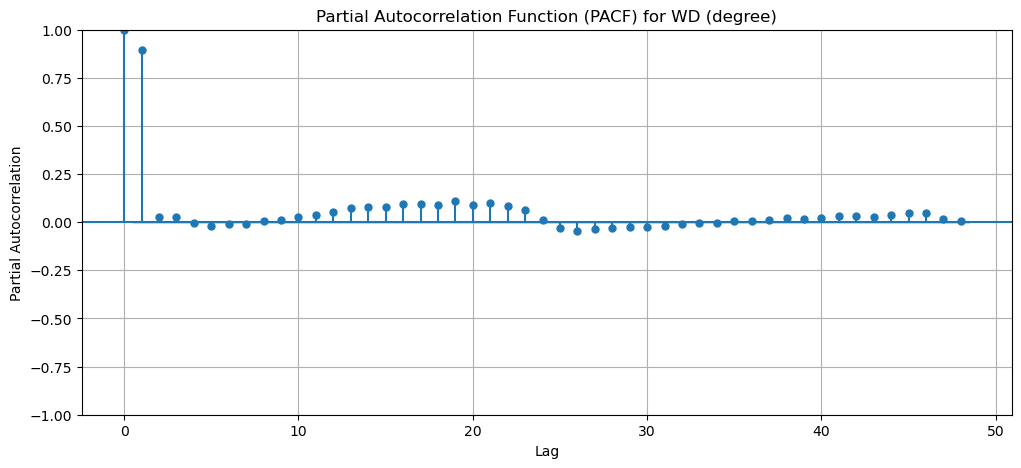


-- Analyzing PACF for SR (W/mt2) --


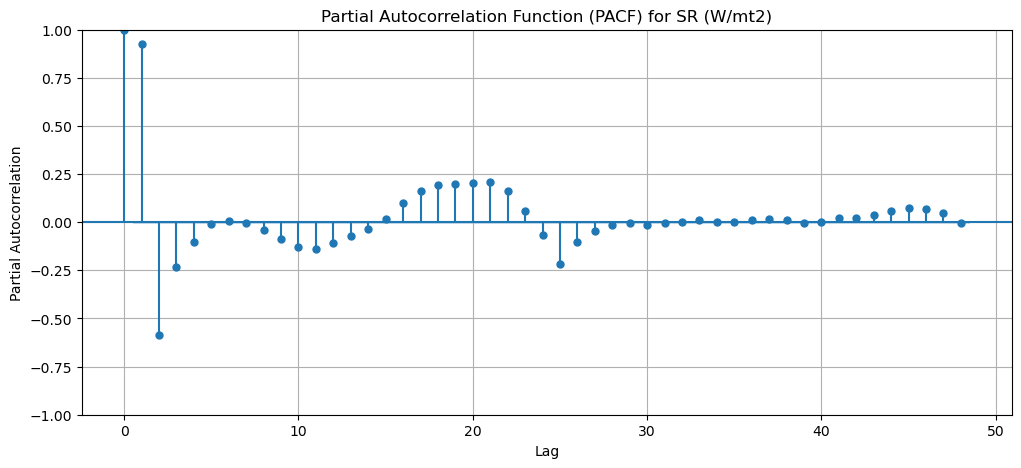


-- Analyzing PACF for BP (mmHg) --


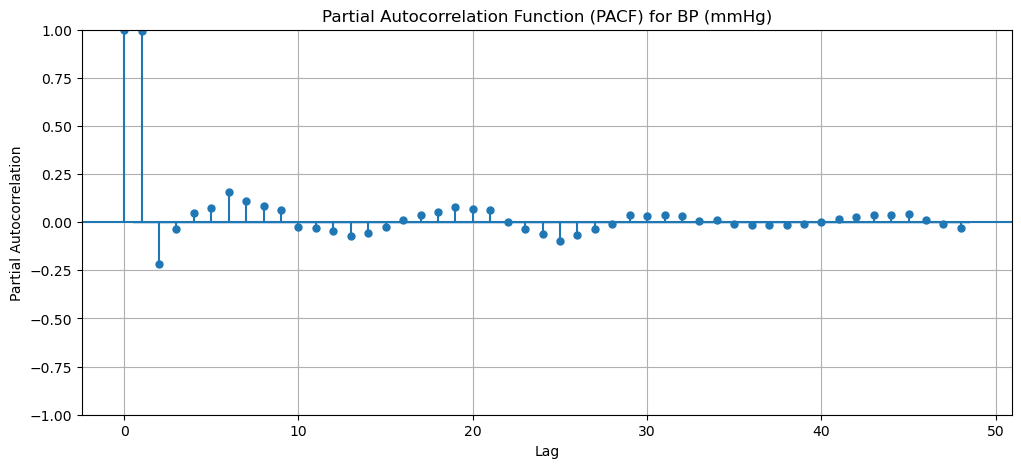


-- Analyzing PACF for VWS (m/s) --


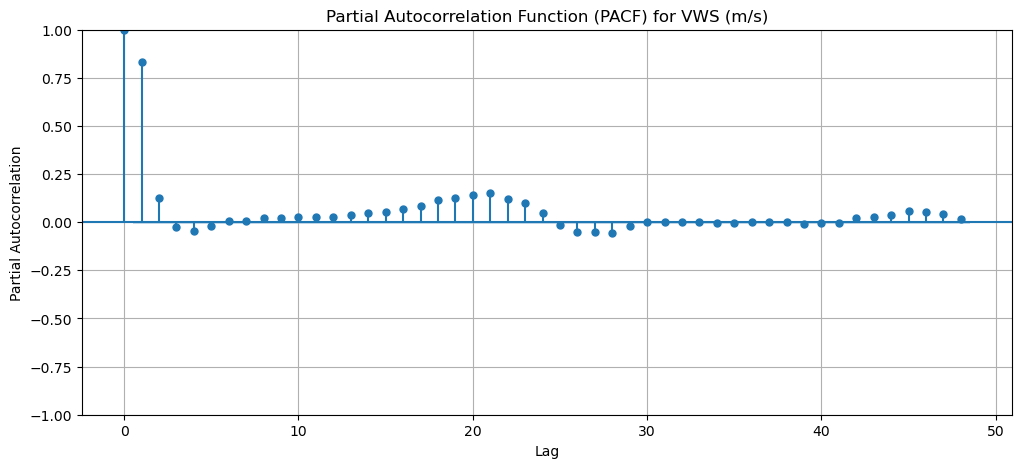


-- Analyzing PACF for AT (degree C) --


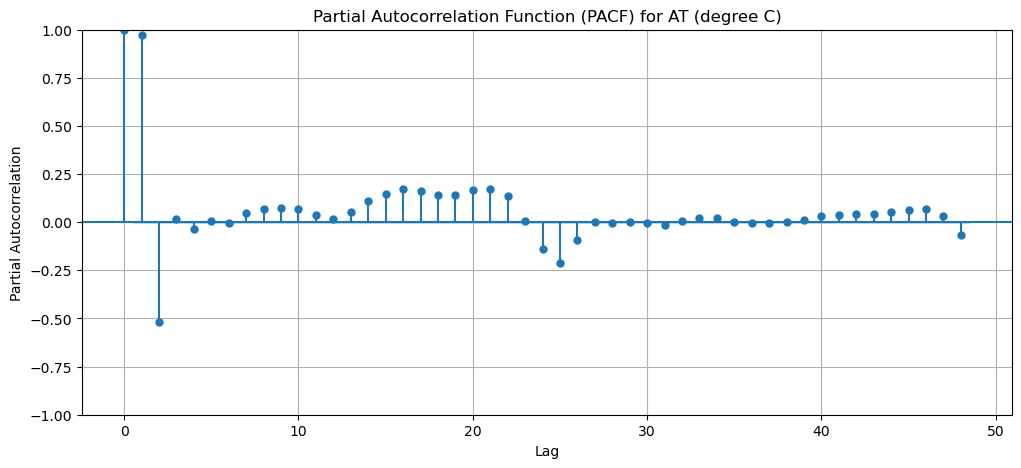


-- Analyzing PACF for RF (mm) --


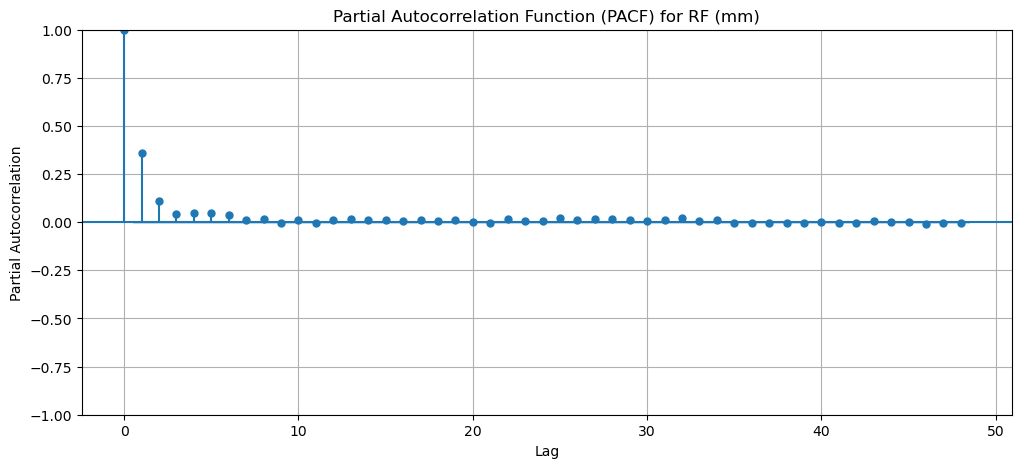


-- Analyzing PACF for Xylene (ug/m3) --


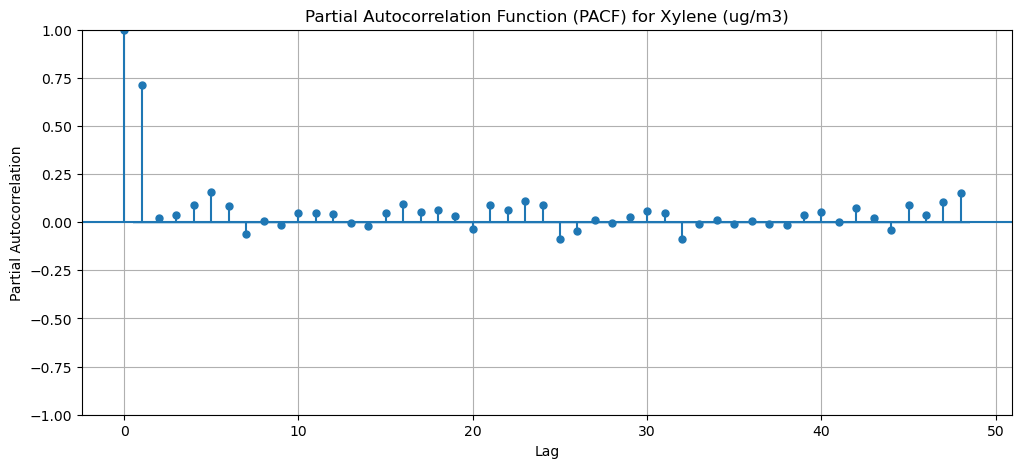

In [ ]:
def plot_pacf_for_all_columns(input_df, lags=48):
    print(f"--- Generating PACF Plots (up to {lags} lags) for All Columns ---")

    if not isinstance(input_df.index, pd.DatetimeIndex):
        print("Error: Input DataFrame must have a DatetimeIndex.")
        return
        
    numerical_columns = input_df.select_dtypes(include=np.number).columns

    for column_name in numerical_columns:
        print(f"\n-- Analyzing PACF for {column_name} --")
        ts_data = input_df[column_name]

        if ts_data.nunique() <= 1:
            print(f"Skipping {column_name}: Column is constant.")
            continue
        
        try:
            fig, ax = plt.subplots(figsize=(12, 5))
            
            # Lags outside the blue shaded area (confidence interval) are considered statistically significant.
            plot_pacf(ts_data, ax=ax, lags=lags, method='ywm')
            
            ax.set_title(f'Partial Autocorrelation Function (PACF) for {column_name}')
            ax.set_xlabel('Lag')
            ax.set_ylabel('Partial Autocorrelation')
            ax.grid(True)
            plt.show()

        except Exception as e:
            print(f"Could not plot PACF for {column_name}. Reason: {e}")

plot_pacf_for_all_columns(df_imputed, lags=48)

The results of the Analysis of Partial Autocorrelation Function (PACF) provide strong statistical evidence to focus our analysis on the daily cycle. In many PACF plots for various columns, we consistently observe a statistically significant surge in the 24th lag. 

In summary, the PACF analysis has successfully uncovered the dominant cyclical nature: a 24-hour daily pattern.

This recurring relationship every 24 hours is the definition of a daily seasonal pattern or a diurnal cycle. Therefore, choosing period = 24 for seasonal decomposition is the next most logical step and supported by data.

# Seasonal Strength

--- Calculating Seasonality Strength for period=24 ---
Analyzing: PM2.5 (ug/m3)
Analyzing: PM10 (ug/m3)
Analyzing: NO (ug/m3)
Analyzing: NO2 (ug/m3)
Analyzing: NOx (ppb)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: NH3 (ug/m3)
Analyzing: SO2 (ug/m3)
Analyzing: CO (mg/m3)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: Ozone (ug/m3)
Analyzing: Benzene (ug/m3)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: Toluene (ug/m3)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: Temp (degree C)
Analyzing: RH (%)
Analyzing: WS (m/s)
Analyzing: WD (degree)
Analyzing: SR (W/mt2)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: BP (mmHg)
Analyzing: VWS (m/s)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: AT (degree C)
Analyzing: RF (mm)
  -> Detected non-positive values. Switching to 'additive' model.
Analyzing: Xylene (ug/m3)

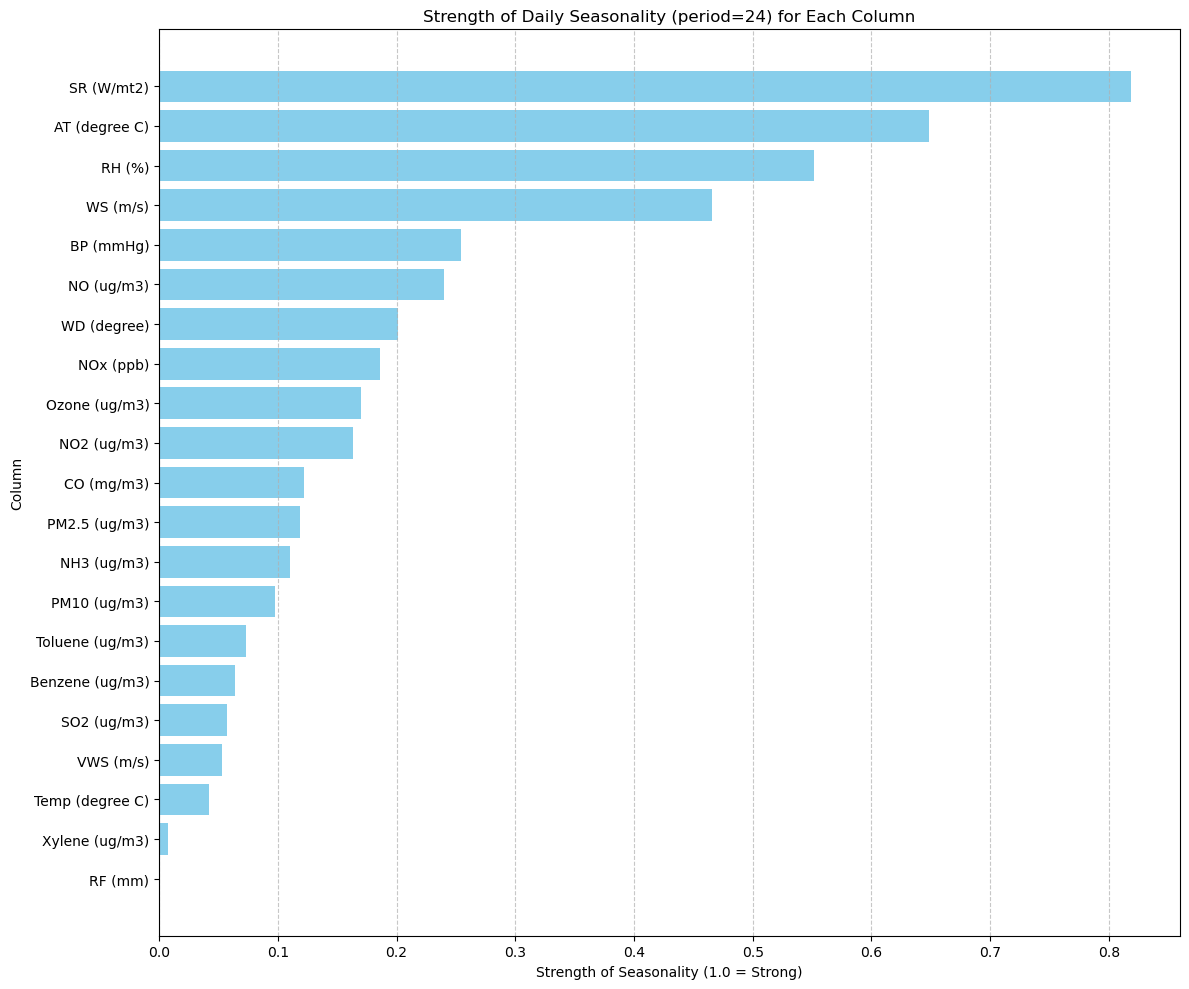

In [ ]:
def calculate_seasonality_strength(input_df, period=24):
    """
    Calculates and visualizes the strength of seasonality for each numerical column.
    It intelligently switches between multiplicative and additive models based on data values.
    """
    print(f"--- Calculating Seasonality Strength for period={period} ---")

    if not isinstance(input_df.index, pd.DatetimeIndex):
        print("Error: Input DataFrame must have a DatetimeIndex.")
        return

    numerical_columns = input_df.select_dtypes(include=np.number).columns
    strength_results = []

    for column_name in numerical_columns:
        print(f"Analyzing: {column_name}")
        ts_data = input_df[column_name]

        if ts_data.nunique() <= 1:
            print(f"  -> Skipping {column_name}: Column is constant.")
            continue
        
        # Check if there are any non-positive values in the series.
        if (ts_data <= 0).any():
            model_type = 'additive'
            print(f"  -> Detected non-positive values. Switching to 'additive' model.")
        else:
            model_type = 'multiplicative'

        try:
            # Perform decomposition with the selected model type
            result = seasonal_decompose(ts_data, model=model_type, period=period)

            # Adjust strength calculation based on the model
            if model_type == 'multiplicative':
                variance_seasonal_plus_residual = (result.seasonal * result.resid).var()
            else: # Additive model
                variance_seasonal_plus_residual = (result.seasonal + result.resid).var()
            
            variance_residual = result.resid.var()
            
            if variance_seasonal_plus_residual == 0:
                strength = 0
            else:
                strength = max(0, 1 - (variance_residual / variance_seasonal_plus_residual))
            
            strength_results.append({
                'Column': column_name,
                'Seasonality Strength': strength,
                'Model Used': model_type
            })

        except Exception as e:
            print(f"  -> Could not analyze {column_name}. Reason: {e}")

    if not strength_results:
        print("Could not calculate seasonality for any column.")
        return

    results_df = pd.DataFrame(strength_results).sort_values(by='Seasonality Strength', ascending=False)
    print("\n--- Strength of Daily (24-Hour) Seasonality ---")
    print(results_df.to_string(index=False))

    plt.figure(figsize=(12, 10))
    plt.barh(results_df['Column'], results_df['Seasonality Strength'], color='skyblue')
    plt.xlabel('Strength of Seasonality (1.0 = Strong)')
    plt.ylabel('Column')
    plt.title('Strength of Daily Seasonality (period=24) for Each Column')
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
calculate_seasonality_strength(df_imputed, period=24)

The highly seasonal groups are SR (Wmt2), AT(degree C), RH (%), WS (m/s). This group is at the top of the list, and it makes perfect physical sense. Solar Radiation (SR), Ambient Temperature (AT), and Relative Humidity (RH) are all directly driven by the 24-hour cycle of the sun. Wind Speed (WS) also often follows diurnal patterns. These variables are highly predictable. 

The moderate group are NO (ug/m3), NOx (ppb), Ozone (ug/m3), NO2 (ug/m3), CO (mg/m3), PM2.5 (ug/m3), PM10 (ug/m3). This group consists mainly of pollutants. Their seasonality scores (mostly between 0.10 and 0.25) show that they do have a discernible daily pattern, but it's much "noisier" and less dominant than for the meteorological drivers. This is expected, as pollutant levels are influenced by daily cycles like traffic rush hours and industrial activity, but also by many other less predictable factors like wind direction, specific emission events, and atmospheric chemistry.

Xylene, RF. These variables are at the very bottom with seasonality scores near zero. This is a very important finding. The model is tells that these variables do not have a meaningful 24-hour cycle. Rainfall (RF) is a perfect example of an "event-driven" phenomenon; it happens sporadically, not at the same time every day.


# Feature Selection

In [ ]:
def granger_causality_analysis(input_df, target_column, max_lags=24):
    """
    Performs Granger Causality tests for all features against a target column.
    The function makes the data stationary before running the tests.

    Args:
        input_df (pd.DataFrame): The fully imputed DataFrame.
        target_column (str): The name of the target variable.
        max_lags (int): The maximum number of lags to test.
    """
    print("--- Starting Granger Causality Analysis ---")
    numeric_df = input_df.select_dtypes(include=np.number)
    
    print("Making data stationary using first-order differencing...")
    df_diff = numeric_df.diff().dropna()

    features = [col for col in numeric_df.columns if col != target_column]
    results = []

    for feature in features:
        print(f"Testing causality: Does '{feature}' help predict '{target_column}'?")
        
        test_data = df_diff[[target_column, feature]]
        

        test_result = grangercausalitytests(test_data, maxlag=max_lags, verbose=False)
        

        min_p_value = 1.0
        for lag in range(1, max_lags + 1):
            p_value = test_result[lag][0]['ssr_ftest'][1]
            if p_value < min_p_value:
                min_p_value = p_value
        
        results.append({
            'Feature': feature,
            'Min P-Value': min_p_value,
            'Is Significant (p < 0.05)': 'Yes' if min_p_value < 0.05 else 'No'
        })

    results_df = pd.DataFrame(results).sort_values(by='Min P-Value', ascending=True)
    
    print("\n--- Granger Causality Test Results ---")
    print(f"Target Variable: {target_column}")
    print("A low P-Value (< 0.05) suggests the feature is useful for prediction.")
    print(results_df.to_string(index=False))
    

TARGET_COLUMN = 'AT (degree C)'
granger_causality_analysis(df_imputed, TARGET_COLUMN, max_lags=24)

--- Starting Granger Causality Analysis ---
Making data stationary using first-order differencing...
Testing causality: Does 'PM2.5 (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'PM10 (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'NO (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'NO2 (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'NOx (ppb)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'NH3 (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'SO2 (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'CO (mg/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'Ozone (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'Benzene (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'Toluene (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'Temp (degree C)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'RH (%)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'WS (m/s)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'WD (degree)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'SR (W/mt2)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'BP (mmHg)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'VWS (m/s)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'RF (mm)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Testing causality: Does 'Xylene (ug/m3)' help predict 'AT (degree C)'?


c:\Users\Lenovo\.conda\envs\tensorflow_FINAL\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



--- Granger Causality Test Results ---
Target Variable: AT (degree C)
A low P-Value (< 0.05) suggests the feature is useful for prediction.
        Feature   Min P-Value Is Significant (p < 0.05)
      BP (mmHg)  0.000000e+00                       Yes
     SR (W/mt2)  0.000000e+00                       Yes
       WS (m/s)  0.000000e+00                       Yes
     CO (mg/m3)  0.000000e+00                       Yes
    NO2 (ug/m3) 4.061162e-297                       Yes
      NOx (ppb) 1.877100e-293                       Yes
     NO (ug/m3) 6.363954e-219                       Yes
         RH (%) 3.323126e-163                       Yes
Benzene (ug/m3) 7.205614e-136                       Yes
  PM2.5 (ug/m3) 3.010927e-103                       Yes
  Ozone (ug/m3) 1.019893e-102                       Yes
   PM10 (ug/m3) 1.242030e-100                       Yes
        RF (mm)  5.730532e-81                       Yes
    WD (degree)  4.100956e-77                       Yes
      VWS (m/s)  3.

# Bonus Point

A p-value below 0.05 is the standard threshold to reject that hypothesis, whcih is "This feature does NOT help predict the target".

 It is crucial to understand that "Granger Causality" means predictive causality, not necessarily true physical cause-and-effect. For example, the test doesn't prove that changes in BP physically cause a change in AT. It proves that the patterns in the BP time series are statistically useful for predicting the patterns in the AT time series, likely because they are both driven by larger weather phenomena.

 This analysis strongly validates the decision to build a multivariate forecasting model (one that uses multiple input features) rather than a simple univariate model (that would only use past values of AT). Because we have a strong statistical evidence to include all of these variables as potential features in your model

# Data Preprocessing

## Data Scaled

In [ ]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), 
                         columns=df_imputed.columns, 
                         index=df_imputed.index)

df_scaled.head()

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
From Date                                                                   
2017-07-01 00:00:00       0.059244      0.100498    0.007862     0.065854   
2017-07-01 01:00:00       0.036320      0.064507    0.002787     0.049385   
2017-07-01 02:00:00       0.022775      0.060293    0.002716     0.009615   
2017-07-01 03:00:00       0.009229      0.056079    0.006075     0.015113   
2017-07-01 04:00:00       0.039297      0.051864    0.012555     0.049980   

                     NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
From Date                                                              
2017-07-01 00:00:00   0.042817     0.000022     0.125219    0.117908   
2017-07-01 01:00:00   0.027924     0.000022     0.042220    0.156915   
2017-07-01 02:00:00   0.006687     0.000176     0.055298    0.106383   
2017-07-01 03:00:00   0.012982     0.000231     0.101689    0.140071   
2017-07-01 04:00:00   0.037893     0.000286     0.115179    0.199468   

                     Ozone (ug/m3)  Benzene (ug/m3)  ...  Temp (degree C)  \
From Date                                            ...                    
2017-07-01 00:00:00       0.724498         0.006374  ...         0.912373   
2017-07-01 01:00:00       0.724498         0.004945  ...         0.954870   
2017-07-01 02:00:00       0.724498         0.005824  ...         0.977247   
2017-07-01 03:00:00       0.724498         0.008242  ...         0.982136   
2017-07-01 04:00:00       0.213604         0.008571  ...         1.000000   

                       RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
From Date                                                                     
2017-07-01 00:00:00  0.885246  0.199492     0.788952    0.009247   0.528571   
2017-07-01 01:00:00  0.901639  0.304956     0.828612    0.009247   0.514286   
2017-07-01 02:00:00  0.921311  0.085133     0.789433    0.009137   0.514286   
2017-07-01 03:00:00  0.921311  0.184244     0.837110    0.008219   0.500000   
2017-07-01 04:00:00  0.921311  0.279543     0.822238    0.008219   0.500000   

                     VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
From Date                                                               
2017-07-01 00:00:00   0.260090       0.487535   0.0000        0.001582  
2017-07-01 01:00:00   0.269058       0.457525   0.1200        0.001217  
2017-07-01 02:00:00   0.260090       0.438366   0.0264        0.001047  
2017-07-01 03:00:00   0.282511       0.436750   0.0000        0.001533  
2017-07-01 04:00:00   0.282511       0.455217   0.0000        0.001631  

[5 rows x 21 columns]

## Data Sequence

In [ ]:
def create_sequences(data, n_past, n_future, target_column):
    X, y = [], []
    target_col_index = data.columns.get_loc(target_column)
    
    for i in range(n_past, len(data) - n_future + 1):
        X.append(data.iloc[i - n_past:i].values)
        y.append(data.iloc[i:i + n_future, target_col_index].values)
        
    return np.array(X), np.array(y)


N_PAST = 5        
N_FUTURE = 1      
TARGET_COLUMN = 'AT (degree C)'
X, y = create_sequences(df_scaled, N_PAST, N_FUTURE, TARGET_COLUMN)
print(f"Bentuk array X (fitur): {X.shape}")
print(f"Bentuk array y (target): {y.shape}")

train_split = 0.8
val_split = 0.1
test_split = 0.1 

train_idx = int(len(X) * train_split)
val_idx = int(len(X) * (train_split + val_split))

X_train, y_train = X[:train_idx], y[:train_idx]
X_val, y_val = X[train_idx:val_idx], y[train_idx:val_idx]
X_test, y_test = X[val_idx:], y[val_idx:]

print(f"Ukuran data training: {len(X_train)} sampel")
print(f"Ukuran data validasi: {len(X_val)} sampel")
print(f"Ukuran data testing: {len(X_test)} sampel")

Bentuk array X (fitur): (50395, 5, 21)
Bentuk array y (target): (50395, 1)
Ukuran data training: 40316 sampel
Ukuran data validasi: 5039 sampel
Ukuran data testing: 5040 sampel


From a technical standpoint, creating sequences is a crucial data preprocessing step that reframes the time-series forecasting challenge into a supervised learning problem that is compatible with advanced models like LSTM. This function transforms the dataset into distinct input features (X) and a target (y), where the features for any single prediction consist of a sequence of past observations over a defined look-back window (N_PAST). 

This provides the model with essential temporal context, allowing it to learn dynamic patterns such as trends, momentum, and seasonality that would be invisible in a static, single row of data. Critically, this process reshapes the data into the specific 3D input format of (samples, timesteps, features) which Recurrent Neural Networks are architecturally designed to accept, serving as the fundamental bridge between a standard 2D time-series table and a powerful, sequence-aware forecasting model.

# Modelling

## Baseline

In [ ]:
def smape(y_true, y_pred):
    numerator = K.abs(y_pred - y_true)
    denominator = (K.abs(y_true) + K.abs(y_pred)) / 2
    ratio = numerator / (denominator + K.epsilon())
    return K.mean(ratio) * 100.0

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

model = Sequential()
model.add(LSTM(units=10, input_shape=(n_timesteps, n_features))) 
model.add(Dense(units=N_FUTURE, activation='linear')) 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape', smape, r_squared])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1280      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras', 
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=1000, 
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/1000
1257/1260 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0307 - mape: 3250.9939 - smape: 6.7209 - r_squared: 0.8117
Epoch 1: val_loss improved from inf to 0.00107, saving model to best_lstm_model.keras
1260/1260 [==============================] - 19s 8ms/step - loss: 0.0020 - mae: 0.0306 - mape: 3243.5842 - smape: 6.7143 - r_squared: 0.8120 - val_loss: 0.0011 - val_mae: 0.0222 - val_mape: 3.8227 - val_smape: 3.8893 - val_r_squared: 0.7641
Epoch 2/1000
1256/1260 [============================>.] - ETA: 0s - loss: 7.4719e-04 - mae: 0.0190 - mape: 1185.9727 - smape: 4.2012 - r_squared: 0.9311
Epoch 2: val_loss improved from 0.00107 to 0.00075, saving model to best_lstm_model.keras
1260/1260 [==============================] - 9s 7ms/step - loss: 7.4641e-04 - mae: 0.0190 - mape: 1182.3359 - smape: 4.1993 - r_squared: 0.9312 - val_loss: 7.5436e-04 - val_mae: 0.0195 - val_mape: 3.4146 - val_smape: 3.4046 - val_r_squared: 0.8257
Epoch 3/1000
1257/1260 [=========

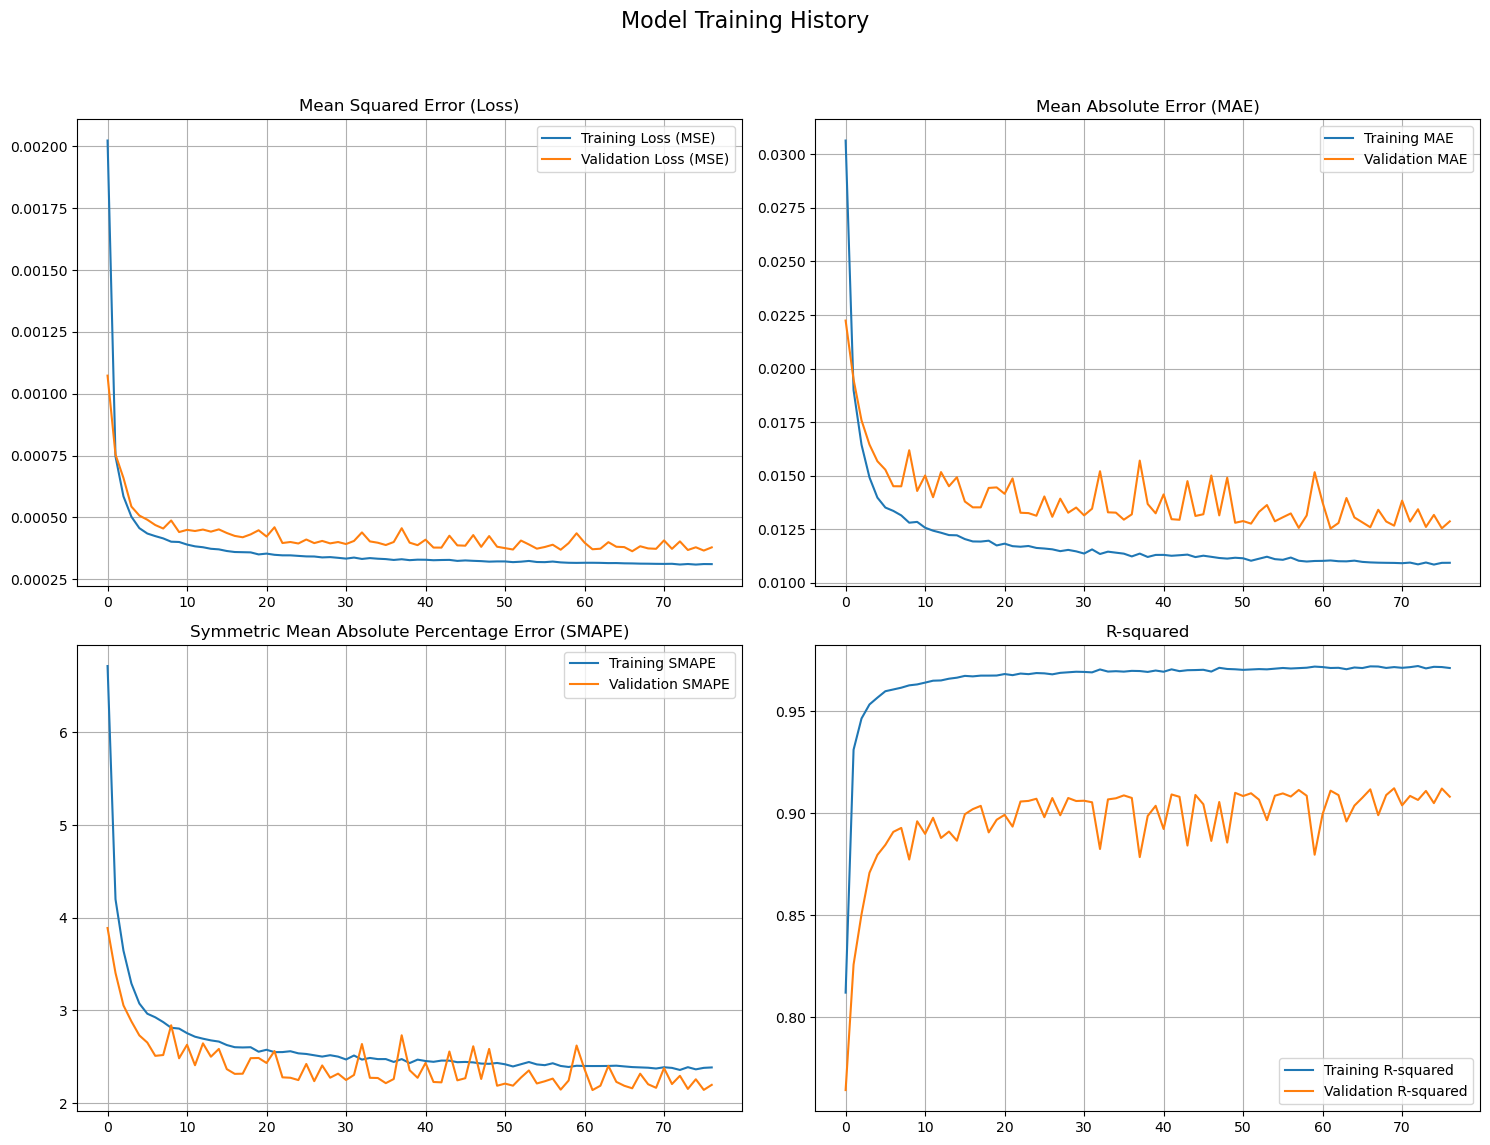

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Training History', fontsize=16)
axs[0, 0].plot(history.history['loss'], label='Training Loss (MSE)')
axs[0, 0].plot(history.history['val_loss'], label='Validation Loss (MSE)')
axs[0, 0].set_title('Mean Squared Error (Loss)')
axs[0, 0].legend(); axs[0, 0].grid(True)
axs[0, 1].plot(history.history['mae'], label='Training MAE')
axs[0, 1].plot(history.history['val_mae'], label='Validation MAE')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].legend(); axs[0, 1].grid(True)
axs[1, 0].plot(history.history['smape'], label='Training SMAPE')
axs[1, 0].plot(history.history['val_smape'], label='Validation SMAPE')
axs[1, 0].set_title('Symmetric Mean Absolute Percentage Error (SMAPE)')
axs[1, 0].legend(); axs[1, 0].grid(True)
axs[1, 1].plot(history.history['r_squared'], label='Training R-squared')
axs[1, 1].plot(history.history['val_r_squared'], label='Validation R-squared')
axs[1, 1].set_title('R-squared')
axs[1, 1].legend(); axs[1, 1].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Modified Model

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',  # Filepath to save the model
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)

In [ ]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

modified_model = Sequential()
modified_model.add(LSTM(units=64, return_sequences=True, input_shape=(n_timesteps, n_features)))
modified_model.add(Dropout(0.2)) 


modified_model.add(LSTM(units=32, return_sequences=False)) 
modified_model.add(Dropout(0.2))


modified_model.add(Dense(units=20, activation='relu'))


modified_model.add(Dense(units=N_FUTURE, activation='linear'))


modified_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape', smape, r_squared])


modified_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 64)             22016     
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                660       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 35,113
Trainable params: 35,113
Non-trai

Increased Depth: from a single LSTM layer to a stacked LSTM architecture (two LSTM layers).

Increased Width: increased the number of units (neurons) in the layers.

Added Regularization: introduced Dropout layers to combat overfitting.

Added a "Processing" Layer: included an extra Dense layer before the final output

In [ ]:
history_2 = modified_model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping] 
)

Epoch 1/1000
1260/1260 [==============================] - 18s 12ms/step - loss: 0.0065 - mae: 0.0525 - mape: 4003.7800 - smape: 11.8455 - r_squared: 0.3898 - val_loss: 0.0014 - val_mae: 0.0267 - val_mape: 4.7257 - val_smape: 4.7430 - val_r_squared: 0.6855
Epoch 2/1000
1260/1260 [==============================] - 16s 13ms/step - loss: 0.0013 - mae: 0.0268 - mape: 420.5020 - smape: 5.9151 - r_squared: 0.8779 - val_loss: 0.0012 - val_mae: 0.0257 - val_mape: 4.2724 - val_smape: 4.3960 - val_r_squared: 0.7089
Epoch 3/1000
1260/1260 [==============================] - 14s 11ms/step - loss: 8.7733e-04 - mae: 0.0213 - mape: 1730.0508 - smape: 4.7847 - r_squared: 0.9197 - val_loss: 7.4279e-04 - val_mae: 0.0194 - val_mape: 3.2612 - val_smape: 3.3119 - val_r_squared: 0.8184
Epoch 4/1000
1260/1260 [==============================] - 17s 14ms/step - loss: 7.3065e-04 - mae: 0.0191 - mape: 1921.4845 - smape: 4.3344 - r_squared: 0.9336 - val_loss: 0.0017 - val_mae: 0.0352 - val_mape: 5.8476 - val_smape:

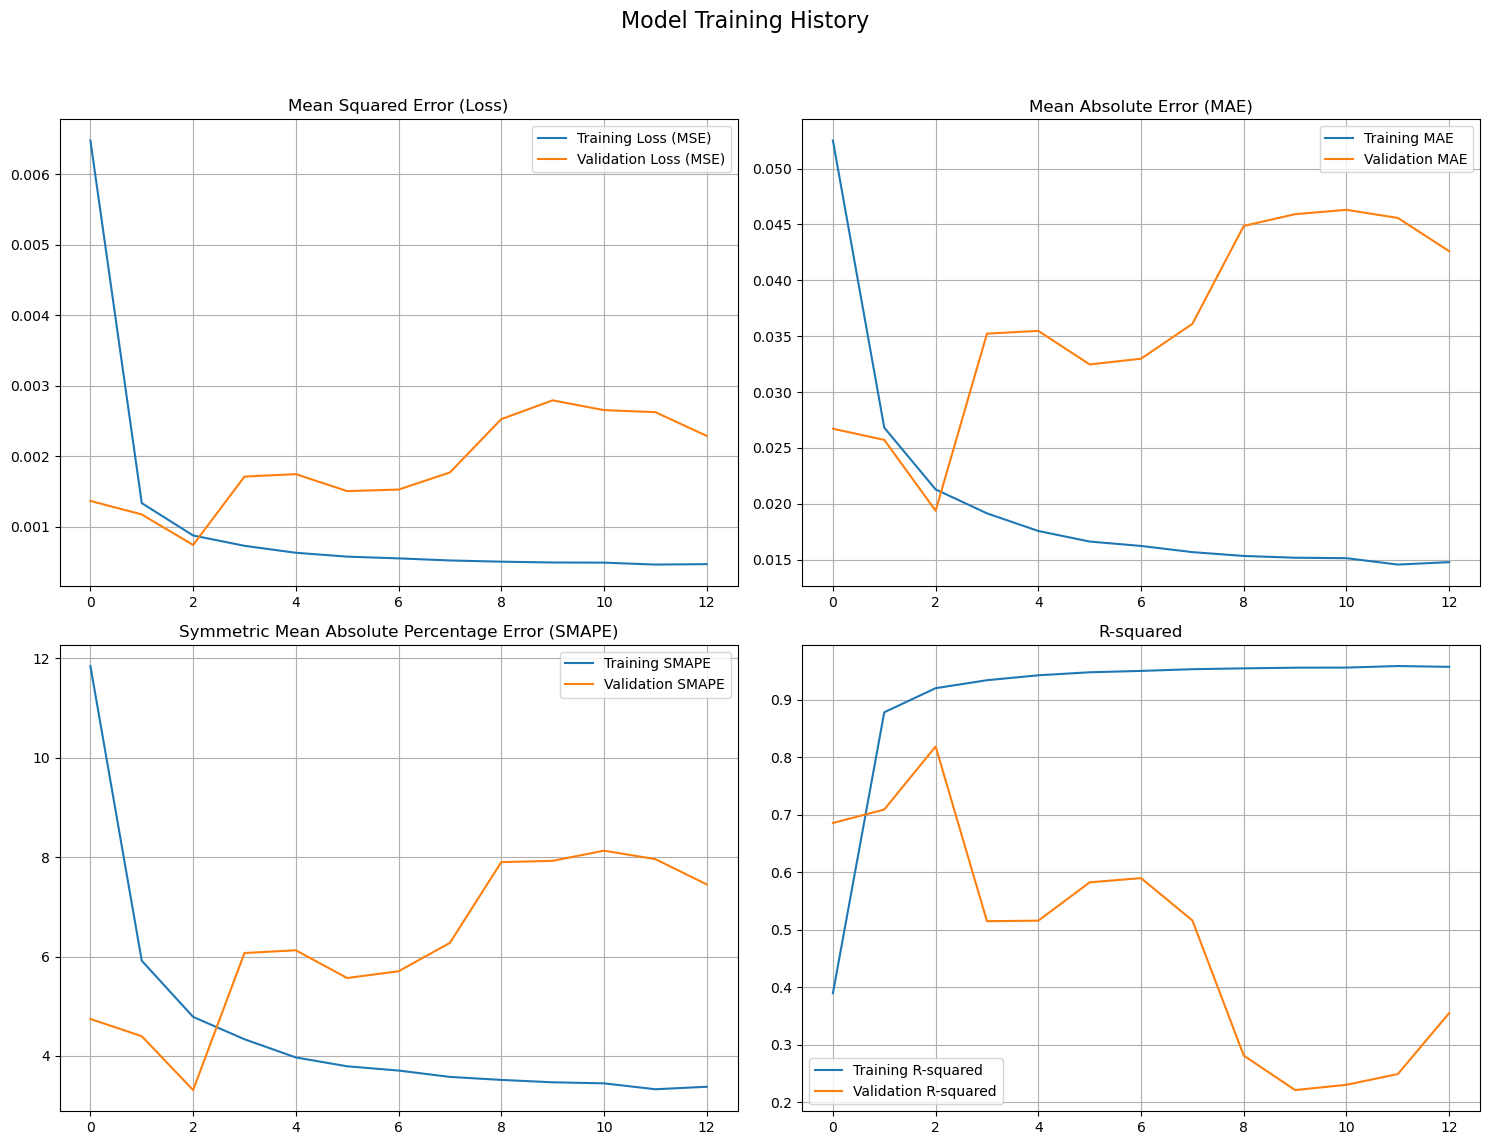

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Training History', fontsize=16)
axs[0, 0].plot(history_2.history['loss'], label='Training Loss (MSE)')
axs[0, 0].plot(history_2.history['val_loss'], label='Validation Loss (MSE)')
axs[0, 0].set_title('Mean Squared Error (Loss)')
axs[0, 0].legend(); axs[0, 0].grid(True)
axs[0, 1].plot(history_2.history['mae'], label='Training MAE')
axs[0, 1].plot(history_2.history['val_mae'], label='Validation MAE')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].legend(); axs[0, 1].grid(True)
axs[1, 0].plot(history_2.history['smape'], label='Training SMAPE')
axs[1, 0].plot(history_2.history['val_smape'], label='Validation SMAPE')
axs[1, 0].set_title('Symmetric Mean Absolute Percentage Error (SMAPE)')
axs[1, 0].legend(); axs[1, 0].grid(True)
axs[1, 1].plot(history_2.history['r_squared'], label='Training R-squared')
axs[1, 1].plot(history_2.history['val_r_squared'], label='Validation R-squared')
axs[1, 1].set_title('R-squared')
axs[1, 1].legend(); axs[1, 1].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Hyper Parameter Tuning Model

## First Model

This model is moderately deep and uses dropout for regularization. It's a solid, general-purpose architecture.

In [ ]:
print("--- Defining Model Combination 1: Stacked LSTM ---")
model_combo_1 = Sequential(name="Stacked_LSTM")


model_combo_1.add(LSTM(units=50, return_sequences=True, input_shape=(n_timesteps, n_features)))
model_combo_1.add(Dropout(0.2))


model_combo_1.add(LSTM(units=25, return_sequences=False))
model_combo_1.add(Dropout(0.2))


model_combo_1.add(Dense(units=20, activation='relu'))


model_combo_1.add(Dense(units=N_FUTURE, activation='linear'))


model_combo_1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae', 'mape', smape, r_squared]
)


model_combo_1.summary()

--- Defining Model Combination 1: Stacked LSTM ---
Model: "Stacked_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 50)             14400     
                                                                 
 dropout_10 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_12 (LSTM)              (None, 25)                7600      
                                                                 
 dropout_11 (Dropout)        (None, 25)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                520       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Tot

The LSTM layers now have 50 and 25 units.

The intermediate Dense layer now explicitly uses the relu activation function.

## Second Model

This model uses a different architectural approach. A Bidirectional layer can be more effective as it has context from both past and future timesteps within the input sequence.

In [ ]:
print("\n--- Defining Model Combination 2: Bidirectional LSTM ---")
model_combo_2 = Sequential(name="Bidirectional_LSTM")


model_combo_2.add(Bidirectional(LSTM(units=64), input_shape=(n_timesteps, n_features)))
model_combo_2.add(Dropout(0.3)) 


model_combo_2.add(Dense(units=32, activation='relu'))


model_combo_2.add(Dense(units=N_FUTURE, activation='linear'))


model_combo_2.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='mean_squared_error',
    metrics=['mae', 'mape', smape, r_squared]
)


model_combo_2.summary()


--- Defining Model Combination 2: Bidirectional LSTM ---
Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 128)              44032     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 48,193
Trainable params: 48,193
Non-trainable params: 0
_________________________________________________________________


Bidirectional_LSTM (New Model): This model uses two separate LSTMs internally:

- A forward LSTM that reads the sequence from past to future (hour 1 -> hour 5).
- A backward LSTM that reads the same sequence from future to past (hour 5 -> hour 1).

The outputs from these two LSTMs are then combined (by default, concatenated). This means for any point in the sequence, the model has learned patterns from what came before it and what came after it within that input window. This model is "shallower" in its recurrent structure, using only a single Bidirectional layer. However, that single layer is more complex internally. The dense part of the network is slightly larger (32 units vs. 20 in the previous model).

## Training

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',  
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)

In [49]:
history_3 = model_combo_1.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint] 
)

Epoch 1/1000
1255/1260 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0496 - mape: 4117.6895 - smape: 10.9121 - r_squared: 0.5355
Epoch 1: val_loss improved from inf to 0.00306, saving model to best_lstm_model.keras
1260/1260 [==============================] - 20s 14ms/step - loss: 0.0051 - mae: 0.0495 - mape: 4101.7861 - smape: 10.8986 - r_squared: 0.5366 - val_loss: 0.0031 - val_mae: 0.0432 - val_mape: 7.1392 - val_smape: 7.4752 - val_r_squared: 0.2397
Epoch 2/1000
1256/1260 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0276 - mape: 770.2271 - smape: 6.0462 - r_squared: 0.8705
Epoch 2: val_loss improved from 0.00306 to 0.00160, saving model to best_lstm_model.keras
1260/1260 [==============================] - 18s 14ms/step - loss: 0.0014 - mae: 0.0276 - mape: 767.8741 - smape: 6.0435 - r_squared: 0.8706 - val_loss: 0.0016 - val_mae: 0.0306 - val_mape: 5.0365 - val_smape: 5.2114 - val_r_squared: 0.5988
Epoch 3/1000
1258/1260 [==================

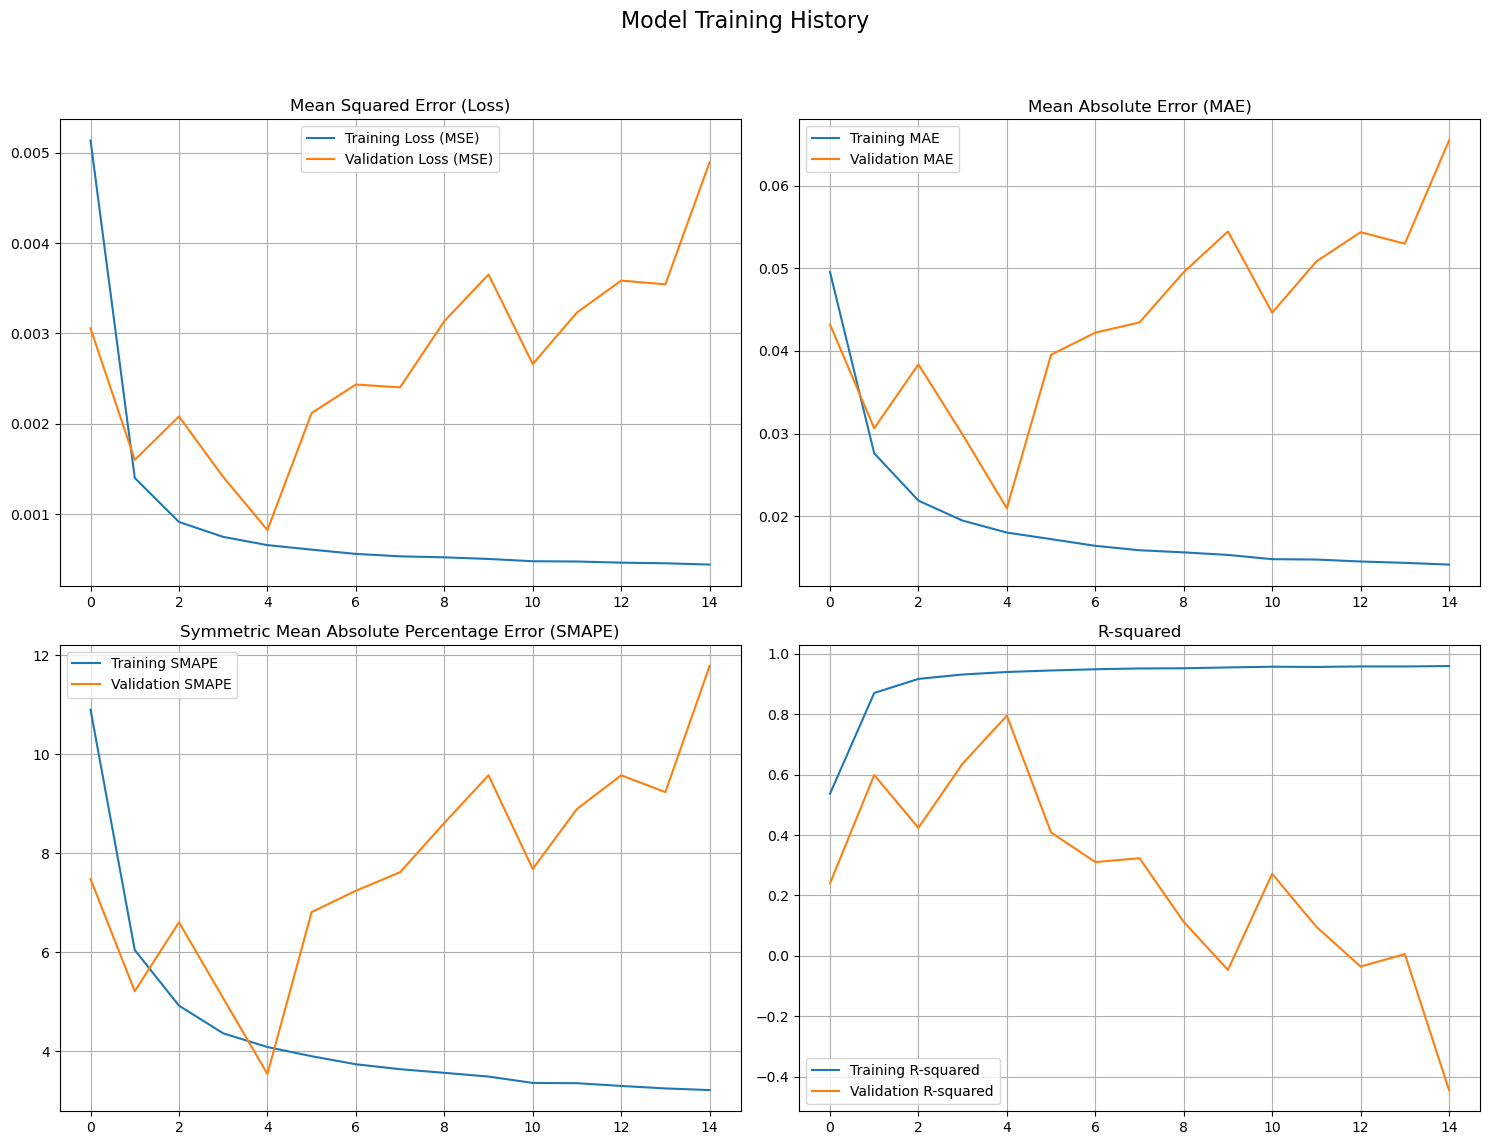

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Training History', fontsize=16)
axs[0, 0].plot(history_3.history['loss'], label='Training Loss (MSE)')
axs[0, 0].plot(history_3.history['val_loss'], label='Validation Loss (MSE)')
axs[0, 0].set_title('Mean Squared Error (Loss)')
axs[0, 0].legend(); axs[0, 0].grid(True)
axs[0, 1].plot(history_3.history['mae'], label='Training MAE')
axs[0, 1].plot(history_3.history['val_mae'], label='Validation MAE')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].legend(); axs[0, 1].grid(True)
axs[1, 0].plot(history_3.history['smape'], label='Training SMAPE')
axs[1, 0].plot(history_3.history['val_smape'], label='Validation SMAPE')
axs[1, 0].set_title('Symmetric Mean Absolute Percentage Error (SMAPE)')
axs[1, 0].legend(); axs[1, 0].grid(True)
axs[1, 1].plot(history_3.history['r_squared'], label='Training R-squared')
axs[1, 1].plot(history_3.history['val_r_squared'], label='Validation R-squared')
axs[1, 1].set_title('R-squared')
axs[1, 1].legend(); axs[1, 1].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',  
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)

In [43]:
history_4 = model_combo_2.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint] 
)

Epoch 1/1000
1260/1260 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0437 - mape: 5175.7837 - smape: 9.5571 - r_squared: 0.6199
Epoch 1: val_loss improved from inf to 0.00094, saving model to best_lstm_model.keras
1260/1260 [==============================] - 20s 13ms/step - loss: 0.0044 - mae: 0.0437 - mape: 5175.7837 - smape: 9.5571 - r_squared: 0.6199 - val_loss: 9.3609e-04 - val_mae: 0.0206 - val_mape: 3.5552 - val_smape: 3.5907 - val_r_squared: 0.7958
Epoch 2/1000
1260/1260 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0254 - mape: 80.8488 - smape: 5.6201 - r_squared: 0.8915
Epoch 2: val_loss improved from 0.00094 to 0.00073, saving model to best_lstm_model.keras
1260/1260 [==============================] - 15s 12ms/step - loss: 0.0012 - mae: 0.0254 - mape: 80.8488 - smape: 5.6201 - r_squared: 0.8915 - val_loss: 7.3296e-04 - val_mae: 0.0191 - val_mape: 3.3333 - val_smape: 3.3381 - val_r_squared: 0.8257
Epoch 3/1000
1258/1260 [==============

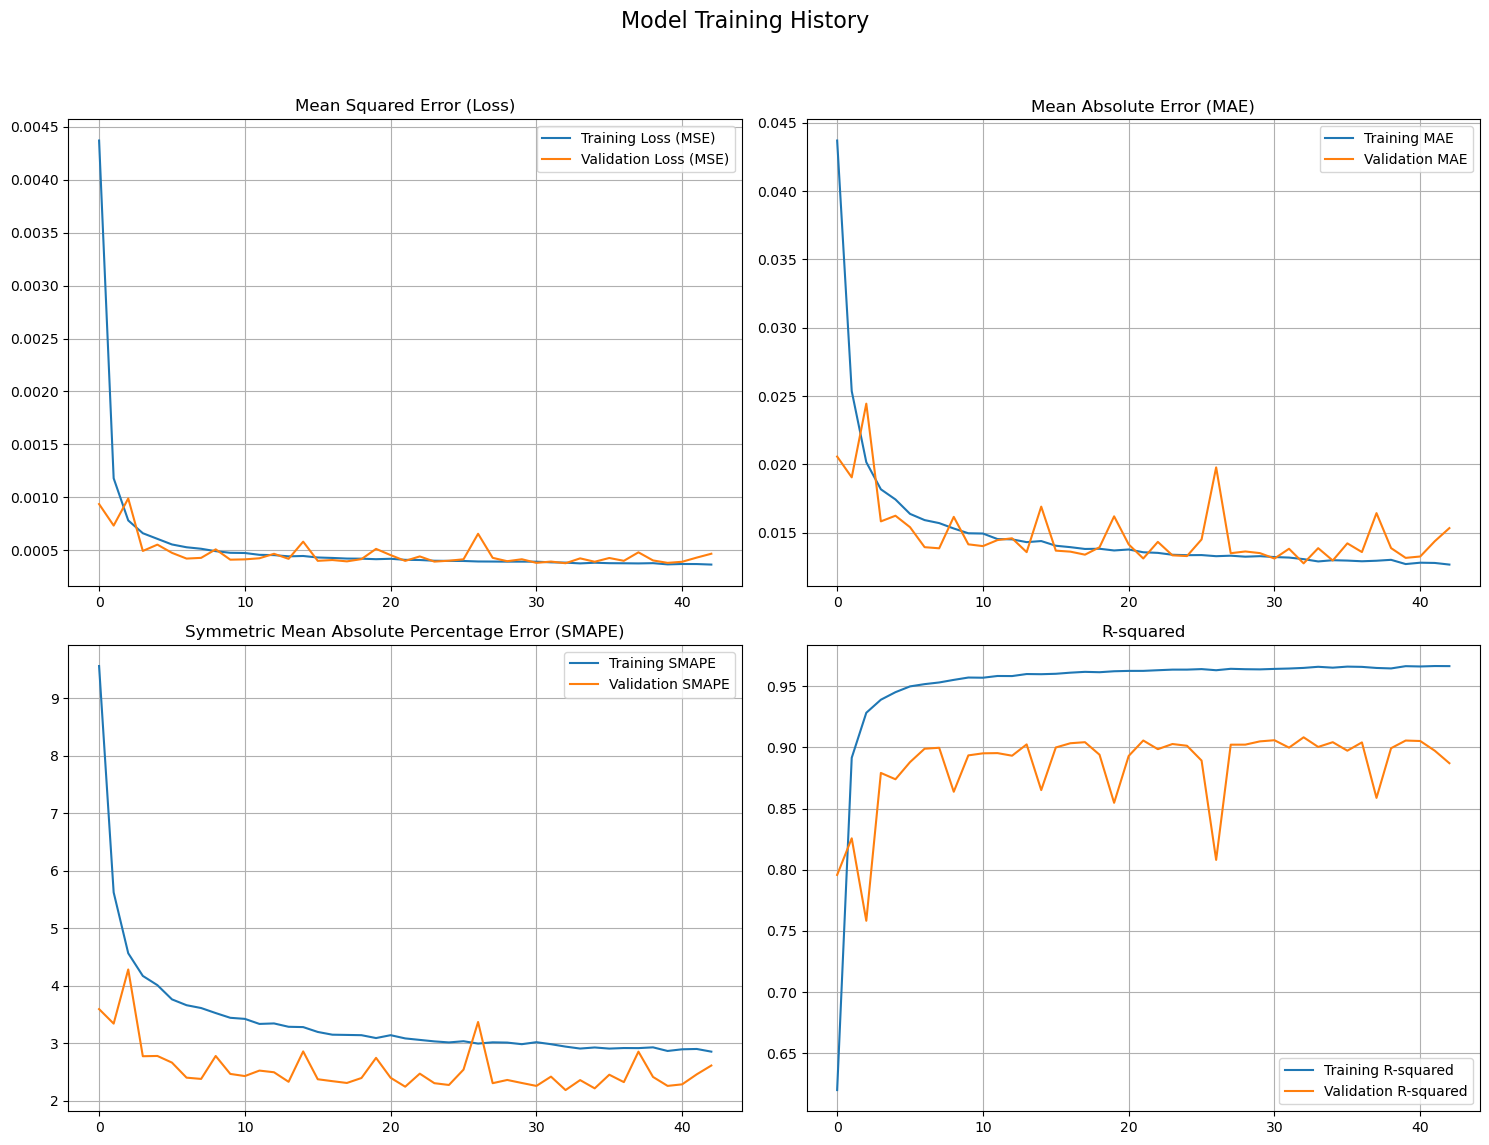

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Training History', fontsize=16)
axs[0, 0].plot(history_4.history['loss'], label='Training Loss (MSE)')
axs[0, 0].plot(history_4.history['val_loss'], label='Validation Loss (MSE)')
axs[0, 0].set_title('Mean Squared Error (Loss)')
axs[0, 0].legend(); axs[0, 0].grid(True)
axs[0, 1].plot(history_4.history['mae'], label='Training MAE')
axs[0, 1].plot(history_4.history['val_mae'], label='Validation MAE')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].legend(); axs[0, 1].grid(True)
axs[1, 0].plot(history_4.history['smape'], label='Training SMAPE')
axs[1, 0].plot(history_4.history['val_smape'], label='Validation SMAPE')
axs[1, 0].set_title('Symmetric Mean Absolute Percentage Error (SMAPE)')
axs[1, 0].legend(); axs[1, 0].grid(True)
axs[1, 1].plot(history_4.history['r_squared'], label='Training R-squared')
axs[1, 1].plot(history_4.history['val_r_squared'], label='Validation R-squared')
axs[1, 1].set_title('R-squared')
axs[1, 1].legend(); axs[1, 1].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



--- Memplot perbandingan hasil pelatihan ---


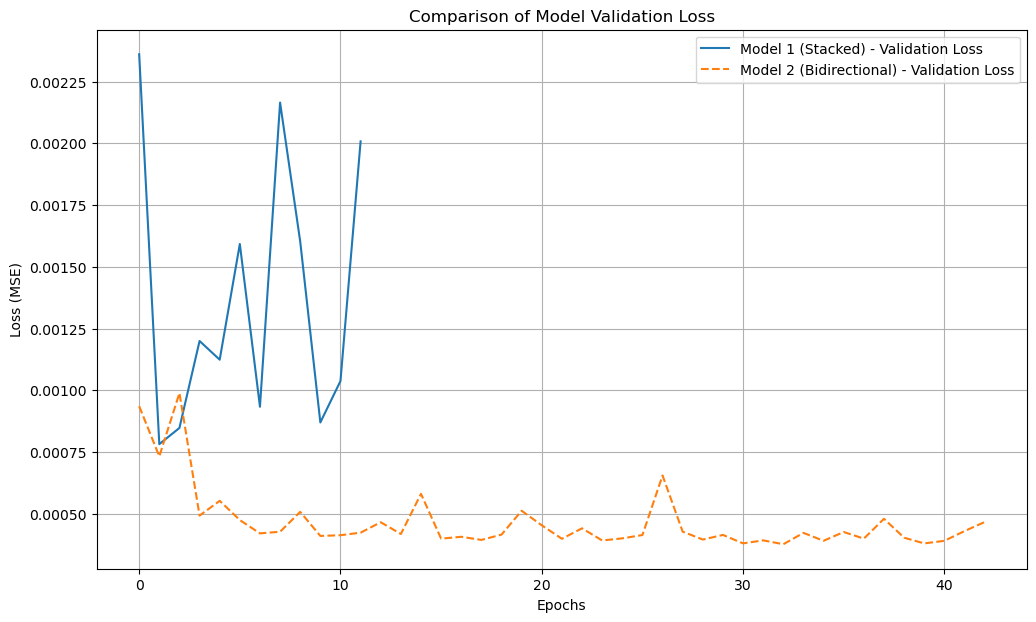

In [ ]:
print("\n--- Memplot perbandingan hasil pelatihan ---")
plt.figure(figsize=(12, 7))
plt.plot(history_3.history['val_loss'], label='Model 1 (Stacked) - Validation Loss')
plt.plot(history_4.history['val_loss'], label='Model 2 (Bidirectional) - Validation Loss', linestyle='--')
plt.title('Comparison of Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation

In [ ]:
model_1 = model_combo_1  
model_2 = model_combo_2  
model_3 = modified_model     
model_4 = model          

models = [model_1, model_2, model_3, model_4]
model_names = [
    'Stacked LSTM', 
    'Bidirectional LSTM', 
    'Modified Model', 
    'Simple LSTM'
]



print("--- Evaluating models on the test set... ---")

results_list = []


for model, name in zip(models, model_names):
    
    test_results = model.evaluate(X_test, y_test, verbose=0)
    
    
    result_dict = {
        'Model Name': name,
        'Test Loss (MSE)': test_results[0],
        'Test MAE': test_results[1],
        'Test MAPE': test_results[2],
        'Test SMAPE': test_results[3],
        'Test R-Squared': test_results[4]
    }
    results_list.append(result_dict)


df_results = pd.DataFrame(results_list)
df_results = df_results.set_index('Model Name')

print("\n--- Final Model Performance on Test Set ---")
df_results


--- Evaluating models on the test set... ---

--- Final Model Performance on Test Set ---


Test Loss (MSE)  Test MAE   Test MAPE  Test SMAPE  \
Model Name                                                              
Stacked LSTM               0.000554  0.017317    3.573871    3.552162   
Bidirectional LSTM         0.367032  0.596477  118.951881  199.999985   
Modified Model             0.000582  0.017671    3.644400    3.634049   
Simple LSTM                0.000338  0.012626    2.589406    2.567839   

                    Test R-Squared  
Model Name                          
Stacked LSTM              0.866537  
Bidirectional LSTM     -129.318451  
Modified Model            0.859813  
Simple LSTM               0.916983

The Simple LSTM model is, surprisingly, the undisputed top performer. It achieved the highest score on every positive metric and the lowest score on every error metric. Its R-Squared value of approximately 0.92 indicates that it successfully explains about 92% of the variance in the unseen test data. Furthermore, it has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), signifying the highest predictive accuracy.

The Stacked LSTM and Modified Model represent the second tier of performance. Both are very strong models, achieving high R-Squared values of around 86-87% and demonstrating low error rates. Their performance is nearly identical to each other, but consistently and marginally worse than the Simple LSTM. This is a crucial insight: for this specific problem, the added complexity of stacking more LSTM layers did not lead to better performance on the test set and may have slightly hindered its ability to generalize.

Finally, the Bidirectional LSTM model completely failed in this evaluation. Its R-Squared is a large negative number, which means its predictions were substantially worse than a naive baseline model that simply predicts the average value every time. Its error metrics (MSE, MAE, SMAPE) are orders of magnitude higher than the other models, confirming a catastrophic failure to learn the underlying patterns or make sensible predictions.

Based on this comprehensive set of evaluation metrics, the Simple LSTM is definitively the best model.It not only provides the most accurate predictions (lowest MAE and MSE) but also the highest R-Squared, demonstrating a superior ability to generalize to new, unseen data compared to the more complex architectures. This highlights a key principle in machine learning: greater complexity does not always guarantee better results. In this case, the simpler architecture was the most effective.


--- Generating prediction plots for each model... ---
158/158 [==============================] - 1s 4ms/step


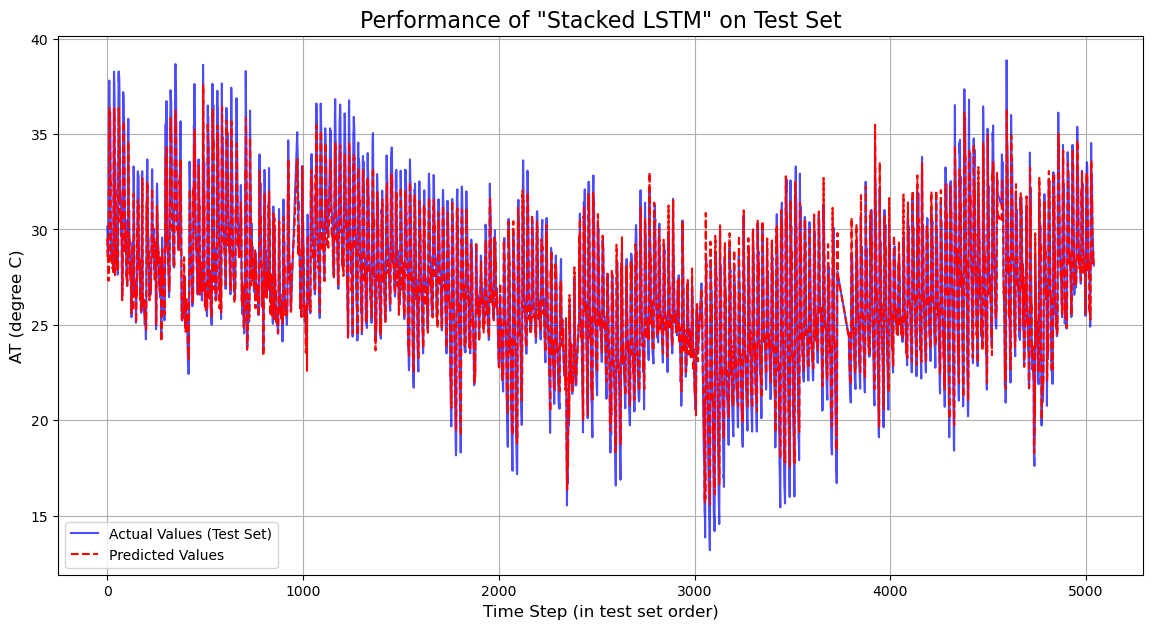

158/158 [==============================] - 1s 3ms/step


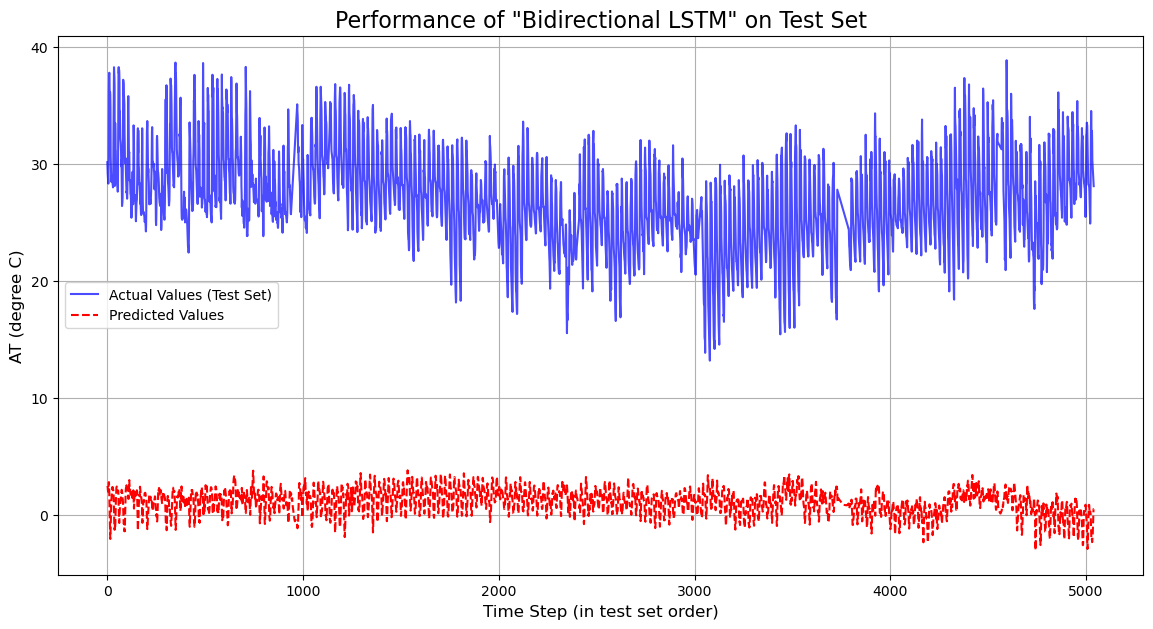

158/158 [==============================] - 1s 5ms/step


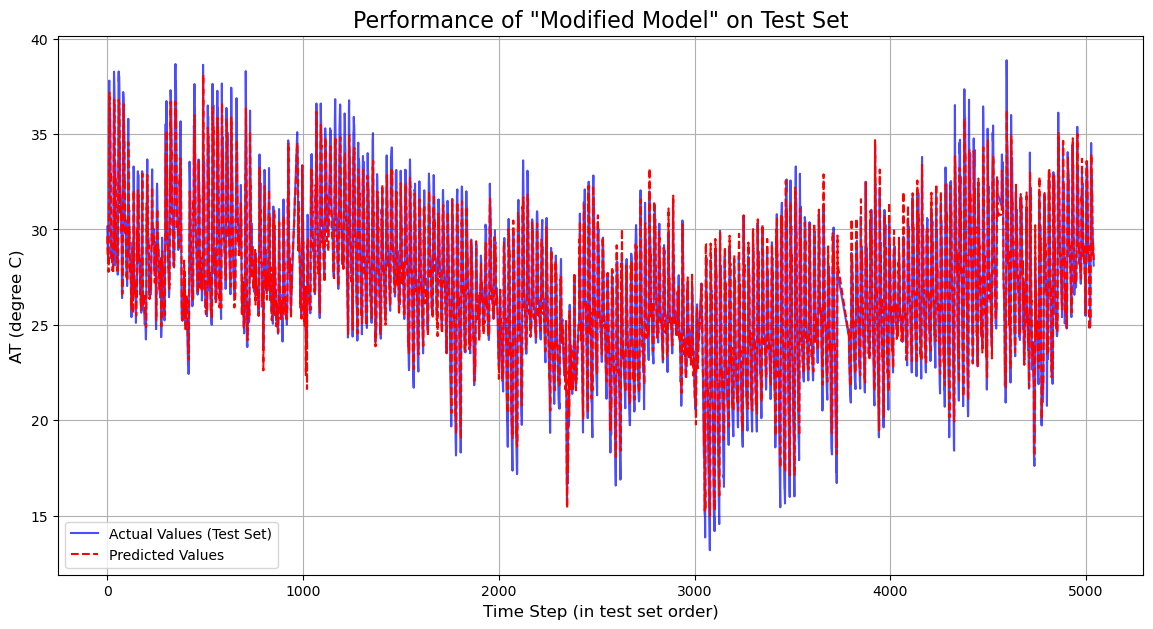

158/158 [==============================] - 1s 4ms/step


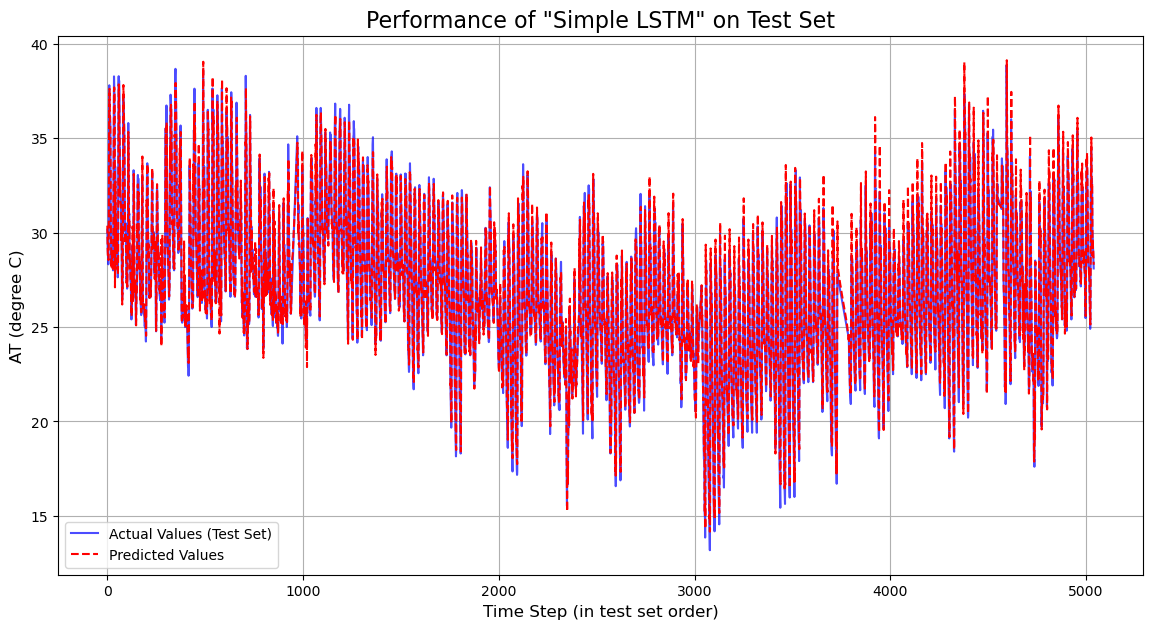

In [ ]:
print("\n--- Generating prediction plots for each model... ---")
target_col_index = df_imputed.columns.get_loc(TARGET_COLUMN)
num_features = len(df_imputed.columns)

for model, name in zip(models, model_names):
    predictions_scaled = model.predict(X_test)
    
    dummy_array_pred = np.zeros((len(predictions_scaled), num_features))
    dummy_array_pred[:, target_col_index] = predictions_scaled.ravel()
    predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, target_col_index]

    dummy_array_true = np.zeros((len(y_test), num_features))
    dummy_array_true[:, target_col_index] = y_test.ravel()
    y_test_actual = scaler.inverse_transform(dummy_array_true)[:, target_col_index]
    
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_actual, label='Actual Values (Test Set)', color='blue', alpha=0.7)
    plt.plot(predictions_actual, label='Predicted Values', color='red', linestyle='--')
    
    plt.title(f'Performance of "{name}" on Test Set', fontsize=16)
    plt.xlabel('Time Step (in test set order)', fontsize=12)
    plt.ylabel(f'{TARGET_COLUMN}', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

As you can see the bidirectional model is very bad in terms of the plot. 

As a summary, the Simple LSTM model predict it more fully then the rest of the model, greater at evaluation then the rest of the model.